# Data Preprocessing and Exploration



### Machine Learning II Project

   - Bruno Moreira            | 20211574@novaims.unl.pt
   - Carolina Braziel Shaul   | 20211557@novaims.unl.pt
   - Madalena Dias Frango     | 20211522@novaims.unl.pt

<br>

---
<br>

## Table of Contents

[1. Importing Data & Libraries](#1-bullet)<br>
<br>
[2. Customers Dataset Analysis](#2-bullet)<br> 
<br>
[2.1. Preprocessing: Data Cleaning, Feature Extraction and Feature Selection](#2.1.-bullet)<br>
<br>
[2.2. Univariate Analysis and Features' Distributions](#2.2.-bullet) <br>
<br>
[2.2.1. Individuals](#2.1.1.-bullet)<br>
<br>
[2.2.2. Supermarkets](#2.1.2.-bullet)<br>
<br>
[2.3. Multivariate Analysis (Individuals)](#2.3.-bullet)<br>
<br>
[2.4. Data Adjustments](#2.4.-bullet)<br>

<br>

---
<br>

<a class="anchor" id="1-bullet">     
    

## 1. Importing Data & Libraries 

</a>


In [4]:
pip install mlxtend


  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Basic Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 
import squarify

#To find addresses
import reverse_geocoder as rg
from geopy.geocoders import Nominatim

#Plot Maps
import folium
from folium.plugins import HeatMap, MarkerCluster 

#Functions
import Functions

%load_ext autoreload
%autoreload 2

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
customers = pd.read_csv('Customer Info Dataset.csv')
transactions = pd.read_csv('Customer Basket Dataset.csv')
prod_mapping = pd.read_excel('Product Mapping Excel File.xlsx')

<br>

---
<br>

<a class="anchor" id="2-bullet">     
    

## 2. Customers Dataset Analysis

</a>

<a class="anchor" id="2.1.-bullet">     
    

### 2.1. Preprocessing: Data Cleaning, Feature Extraction and Feature Selection

</a>

#### Verifying duplicates

In [7]:
customers[customers['customer_id'].duplicated() == True]

Empty DataFrame
Columns: [customer_id, customer_name, customer_gender, customer_birthdate, kids_home, teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, year_first_transaction, loyalty_card_number, latitude, longitude]
Index: []

[0 rows x 24 columns]

In [8]:
customers.set_index('customer_id', inplace=True)

In [9]:
customers[customers.duplicated() == True]

Empty DataFrame
Columns: [customer_name, customer_gender, customer_birthdate, kids_home, teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, year_first_transaction, loyalty_card_number, latitude, longitude]
Index: []

[0 rows x 23 columns]

 #### Summary Statistics

In [10]:
customers.describe().T

count          mean           std   
kids_home                                30000.0  1.146700e+00      1.234111  \
teens_home                               30000.0  5.129333e-01      0.912502   
number_complaints                        30000.0  7.643667e-01      0.836341   
distinct_stores_visited                  30000.0  6.120767e+00      6.511410   
lifetime_spend_groceries                 30000.0  3.978634e+03   5280.641466   
lifetime_spend_electronics               30000.0  9.652388e+02   1755.323397   
typical_hour                             30000.0          -inf           NaN   
lifetime_spend_vegetables                30000.0  5.642078e+02    481.819086   
lifetime_spend_nonalcohol_drinks         30000.0  6.287501e+02    496.346400   
lifetime_spend_alcohol_drinks            30000.0  3.793445e+02    236.206400   
lifetime_spend_meat                      30000.0  5.138784e+02    575.448347   
lifetime_spend_fish                      30000.0  7.771518e+02   3036.405862   
lifetime_spend_hygiene                   30000.0  1.628245e+02    168.547217   
lifetime_spend_videogames                30000.0          -inf           NaN   
lifetime_total_distinct_products         30000.0  1.123887e+03   1423.956421   
percentage_of_products_bought_promotion  30000.0  1.909811e-01      0.145402   
year_first_transaction                   30000.0  2.008684e+03      4.992296   
loyalty_card_number                       5825.0  9.499115e+05  28920.116430   
latitude                                 30000.0  3.874822e+01      0.024788   
longitude                                30000.0 -9.157740e+00      0.025749   

                                                  min            25%   
kids_home                                0.000000e+00       0.000000  \
teens_home                               0.000000e+00       0.000000   
number_complaints                        0.000000e+00       0.000000   
distinct_stores_visited                  0.000000e+00       2.000000   
lifetime_spend_groceries                 0.000000e+00     220.000000   
lifetime_spend_electronics               1.058527e+00      45.000000   
typical_hour                                     -inf       9.000000   
lifetime_spend_vegetables                1.000000e+00     247.000000   
lifetime_spend_nonalcohol_drinks         0.000000e+00     244.000000   
lifetime_spend_alcohol_drinks            0.000000e+00     193.000000   
lifetime_spend_meat                      0.000000e+00      46.000000   
lifetime_spend_fish                      0.000000e+00      48.000000   
lifetime_spend_hygiene                   0.000000e+00      50.000000   
lifetime_spend_videogames                        -inf      46.000000   
lifetime_total_distinct_products         0.000000e+00     116.000000   
percentage_of_products_bought_promotion  2.192022e-02       0.099313   
year_first_transaction                   1.989000e+03    2006.000000   
loyalty_card_number                      9.000390e+05  924547.000000   
latitude                                 3.865335e+01      38.731150   
longitude                               -9.215240e+00      -9.177770   

                                                   50%            75%   
kids_home                                     1.000000       1.000000  \
teens_home                                    0.000000       1.000000   
number_complaints                             1.000000       1.000000   
distinct_stores_visited                       3.000000       8.000000   
lifetime_spend_groceries                    950.000000    5253.000000   
lifetime_spend_electronics                  194.000000     721.000000   
typical_hour                                 14.000000      20.000000   
lifetime_spend_vegetables                   425.000000     785.000000   
lifetime_spend_nonalcohol_drinks            425.000000     949.000000   
lifetime_spend_alcohol_drinks               419.000000     537.000000   
lifetime_spend_meat                         16

> Some weird patterns can be detected above: both variables *typical_hour* and *lifetime_spend_videogames* possess infinite values, which given their context, conditions their interpretation. Below, a more in-depth analysis of these features is done.

In [11]:
customers[customers['lifetime_spend_videogames'] == -np.inf]

customer_name customer_gender   customer_birthdate   
customer_id                                                               
1441          Fausto`s Supermarket            male  01/23/1989 11:26 AM  \
3399           Sandy`s Supermarket          female  07/11/1970 12:57 PM   
8086          Eugene`s Supermarket            male  02/29/1956 08:26 PM   
9706         Michele`s Supermarket          female  12/06/1962 02:12 AM   
17805         Robert`s Supermarket            male  09/22/1982 03:36 AM   
...                            ...             ...                  ...   
4689          Justin`s Supermarket            male  03/20/1959 03:59 PM   
16270        Melissa`s Supermarket          female  05/11/1996 05:49 AM   
10262        Francis`s Supermarket            male  11/05/1970 01:58 AM   
25570          Tracy`s Supermarket          female  06/11/1976 02:22 PM   
25779         Robert`s Supermarket            male  01/07/1965 03:32 AM   

             kids_home  teens_home  number_complaints   
customer_id                                             
1441               0.0         0.0                0.0  \
3399               0.0         0.0                0.0   
8086               0.0         0.0                0.0   
9706               0.0         0.0                0.0   
17805              0.0         0.0                0.0   
...                ...         ...                ...   
4689               0.0         0.0                0.0   
16270              0.0         0.0                0.0   
10262              0.0         0.0                0.0   
25570              0.0         0.0                0.0   
25779              0.0         0.0                0.0   

             distinct_stores_visited  lifetime_spend_groceries   
customer_id                                                      
1441                             1.0                  2.678482  \
3399                             1.0                  2.797932   
8086                             1.0                  2.802438   
9706                             1.0                  2.844843   
17805                            1.0                  2.751432   
...                              ...                       ...   
4689                             1.0                  2.741558   
16270                            1.0                  2.768803   
10262                            1.0                  2.788190   
25570                            1.0                  2.741804   
25779                            1.0                  2.650834   

             lifetime_spend_electronics  typical_hour  ...   
customer_id                                            ...   
1441                           1.095507      0.575646  ...  \
3399                           1.141087      0.447940  ...   
8086                           1.146242      0.173287  ...   
9706                           1.184050      0.708303  ...   
17805                          1.127715      0.599474  ...   
...                                 ...           ...  ...   
4689                           1.113587      0.621227  ...   
16270                          1.175120      0.519860  ...   
10262                          1.130447      0.693147  ...   
25570                          1.163490      0.677013  ...   
25779                          1.133150      0.783874  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene   
customer_id                                                                     
1441                    2.613335              34425.0                1.556140  \
3399                    2.623429              36152.0                1.555148   
8086                    2.612483              34777.0                1.530623   
9706                    2.615854              35000.0                1.555148   
17805                   2.619223              35809.0                1.553152   
...                          ...                  ...                 

In [12]:
customers[customers['typical_hour'] == -np.inf]

customer_name customer_gender   customer_birthdate   
customer_id                                                               
8592         Charles`s Supermarket            male  01/18/1988 04:13 AM  \
101            Annie`s Supermarket          female  11/23/1947 10:33 AM   

             kids_home  teens_home  number_complaints   
customer_id                                             
8592               0.0         0.0                0.0  \
101                0.0         0.0                0.0   

             distinct_stores_visited  lifetime_spend_groceries   
customer_id                                                      
8592                             1.0                   2.64414  \
101                              1.0                   2.65918   

             lifetime_spend_electronics  typical_hour  ...   
customer_id                                            ...   
8592                           1.130447          -inf  ...  \
101                            1.133150          -inf  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene   
customer_id                                                                     
8592                    2.615969              35005.0                1.540302  \
101                     2.608573              34702.0                1.553652   

             lifetime_spend_videogames  lifetime_total_distinct_products   
customer_id                                                                
8592                              -inf                           0.95716  \
101                               -inf                           0.91589   

             percentage_of_products_bought_promotion  year_first_transaction   
customer_id                                                                    
8592                                        0.196409                  2013.0  \
101                                         0.194451                  2009.0   

             loyalty_card_number   latitude  longitude  
customer_id                                             
8592                         NaN  38.866685  -9.111366  
101                     910065.0  38.866048  -9.111718  

[2 rows x 23 columns]

> It seems that this particularity solely applies to customers who have present in their name "Supermarket". For this reason, we will perform a separate analysis to this group.

In [13]:
(customers[customers['customer_name'].str.contains('Supermarket')]).describe().T

count          mean           std   
kids_home                                226.0  0.000000e+00      0.000000  \
teens_home                               226.0  0.000000e+00      0.000000   
number_complaints                        226.0  0.000000e+00      0.000000   
distinct_stores_visited                  226.0  1.000000e+00      0.000000   
lifetime_spend_groceries                 226.0  2.701444e+00      0.057132   
lifetime_spend_electronics               226.0  1.149498e+00      0.026245   
typical_hour                             226.0          -inf           NaN   
lifetime_spend_vegetables                226.0  2.124160e+00      0.026242   
lifetime_spend_nonalcohol_drinks         226.0  2.302082e+00      0.012521   
lifetime_spend_alcohol_drinks            226.0  2.704784e+00      0.002484   
lifetime_spend_meat                      226.0  2.615967e+00      0.003245   
lifetime_spend_fish                      226.0  3.499775e+04    495.891236   
lifetime_spend_hygiene                   226.0  1.553669e+00      0.010453   
lifetime_spend_videogames                226.0          -inf           NaN   
lifetime_total_distinct_products         226.0  9.779300e-01      0.025608   
percentage_of_products_bought_promotion  226.0  2.001512e-01      0.004945   
year_first_transaction                   226.0  2.010031e+03      2.908060   
loyalty_card_number                       23.0  9.486508e+05  31064.547631   
latitude                                 226.0  3.886628e+01      0.000290   
longitude                                226.0 -9.111225e+00      0.000294   

                                                  min            25%   
kids_home                                0.000000e+00       0.000000  \
teens_home                               0.000000e+00       0.000000   
number_complaints                        0.000000e+00       0.000000   
distinct_stores_visited                  1.000000e+00       1.000000   
lifetime_spend_groceries                 2.423006e+00       2.669260   
lifetime_spend_electronics               1.058527e+00       1.130447   
typical_hour                                     -inf       0.575646   
lifetime_spend_vegetables                2.042546e+00       2.105281   
lifetime_spend_nonalcohol_drinks         2.266444e+00       2.293678   
lifetime_spend_alcohol_drinks            2.697901e+00       2.703110   
lifetime_spend_meat                      2.608028e+00       2.613883   
lifetime_spend_fish                      3.347900e+04   34664.750000   
lifetime_spend_hygiene                   1.527867e+00       1.546552   
lifetime_spend_videogames                        -inf            NaN   
lifetime_total_distinct_products         8.888370e-01       0.962537   
percentage_of_products_bought_promotion  1.888230e-01       0.196581   
year_first_transaction                   2.001000e+03    2008.000000   
loyalty_card_number                      9.064600e+05  922863.500000   
latitude                                 3.886578e+01      38.866025   
longitude                               -9.111733e+00      -9.111487   

                                                   50%            75%   
kids_home                                     0.000000       0.000000  \
teens_home                                    0.000000       0.000000   
number_complaints                             0.000000       0.000000   
distinct_stores_visited                       1.000000       1.000000   
lifetime_spend_groceries                      2.707140       2.741420   
lifetime_spend_electronics                    1.151293       1.165860   
typical_hour                                  0.693147       0.722593   
lifetime_spend_vegetables                     2.126912       2.143535   
lifetime_spend_nonalcohol_drinks              2.303334       2.309999   
lifetime_spend_alcohol_drinks                 2.704669       2.706443   
lifetime_spend_meat                           2.615969       2.618102   
lifetime_spen

> As it is possible to perceive, the Supermarket Group has a very distinct behaviour: the standard deviation for many variables either is or tends to 0, meaning that this is quite a homogeneous selection of observations.

 #### Correcting Missing Values and Features dtypes

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 4239 to 2570
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            30000 non-null  object 
 1   customer_gender                          30000 non-null  object 
 2   customer_birthdate                       30000 non-null  object 
 3   kids_home                                30000 non-null  float64
 4   teens_home                               30000 non-null  float64
 5   number_complaints                        30000 non-null  float64
 6   distinct_stores_visited                  30000 non-null  float64
 7   lifetime_spend_groceries                 30000 non-null  float64
 8   lifetime_spend_electronics               30000 non-null  float64
 9   typical_hour                             30000 non-null  float64
 10  lifetime_spend_vegetables                30000 no

> There exist missing values solely in the feature *loyalty_card_number*, which can translate as "non-applicable" (the individual has no loyalty card associated to them). In these cases, imputation should not be considered - and due to the percentage of observations within this condition and the meaning of this feature, it does not present great value. For this reason, it will be further used to create a binary variable indicating whether the customer has a loyalty card or not. 

In [15]:
customers['customer_birthdate'] = pd.to_datetime(customers['customer_birthdate'])
Functions.integer_convert(customers, ['number_complaints', 'kids_home', 'teens_home', 'distinct_stores_visited', 'lifetime_total_distinct_products', 'year_first_transaction'])

customer_name customer_gender  customer_birthdate   
customer_id                                                              
4239                Sara Moscowitz          female 1999-09-10 15:11:00  \
19330             Donald Robertson            male 1981-06-26 22:58:00   
2272         Phd. Felicia Bradshaw          female 1987-01-31 09:08:00   
25288                Emma Williams          female 1942-06-17 00:02:00   
12829                 Hilda Huerta          female 2000-01-31 11:43:00   
...                            ...             ...                 ...   
625               Phd. Karen Watts          female 1974-11-01 05:26:00   
26447              Curtis Thompson            male 1986-02-21 11:27:00   
182                 Richard Carter            male 2001-01-14 05:49:00   
13768                  Jerry Yoder            male 1958-08-21 12:12:00   
2570             Phd. James Cooper            male 1944-01-16 09:35:00   

             kids_home  teens_home  number_complaints   
customer_id                                             
4239                 0           0                  0  \
19330                1           0                  0   
2272                 1           1                  0   
25288                3           4                  1   
12829                0           0                  0   
...                ...         ...                ...   
625                  0           0                  1   
26447                0           0                  0   
182                  0           0                  0   
13768                1           0                  1   
2570                 1           1                  0   

             distinct_stores_visited  lifetime_spend_groceries   
customer_id                                                      
4239                               2                      91.0  \
19330                              2                     197.0   
2272                              20                     397.0   
25288                              2                    5282.0   
12829                              2                      82.0   
...                              ...                       ...   
625                                2                     209.0   
26447                              3                     185.0   
182                                2                      83.0   
13768                             20                     391.0   
2570                               2                     834.0   

             lifetime_spend_electronics  typical_hour  ...   
customer_id                                            ...   
4239                               20.0          22.0  ...  \
19330                            5958.0          21.0  ...   
2272                               20.0           9.0  ...   
25288                             237.0          12.0  ...   
12829                              22.0          21.0  ...   
...                                 ...           ...  ...   
625                              5474.0          20.0  ...   
26447                            1066.0          15.0  ...   
182                                23.0          23.0  ...   
13768                              20.0          10.0  ...   
2570                              596.0          18.0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene   
customer_id                                                                     
4239                        53.0                 48.0                    47.0  \
19330                       86.0                 80.0                    45.0   
2272                       204.0                170.0                    46.0   
25288                     1081.0               1068.0                   617.0   
12829                       39.0                 39.0                    48.0   
...                          ...                  ...                     ...   
62

#### Feature Extraction

Several features will be created. Some solely for the individual customers (non-supermarket), while others for all observations. Their descriptions follow:

_For individual clients_:

- **minors_household**: Number of minors present in the household.
- **education**: Individual's education level.
- **birthday**: Individual's day of birth.
- **birthmonth**: Individual's month of birth.
- **age**: Individual's age.
- **total_lifetime_spend**: Total lifetime amount spent.

_For supermarkets_:

_For all customers_:
- **loyalty_card**: Whether the customer has a loyalty card or not.
- **latitude_encoded**: Latitude of the municipality of residence of the customer.
- **longitude_encoded**: Longitude of the municipality of residence of the customer.

#### Creating the features _for all customers_

In [16]:
#Loyalty Card
Functions.binary_encoding(customers, col = 'loyalty_card', 
                          condition = (np.isnan(customers['loyalty_card_number']) == True))



#customers['address'] = customers.apply(lambda row: Functions.get_address(row), axis=1)

customer_name customer_gender  customer_birthdate   
customer_id                                                              
4239                Sara Moscowitz          female 1999-09-10 15:11:00  \
19330             Donald Robertson            male 1981-06-26 22:58:00   
2272         Phd. Felicia Bradshaw          female 1987-01-31 09:08:00   
25288                Emma Williams          female 1942-06-17 00:02:00   
12829                 Hilda Huerta          female 2000-01-31 11:43:00   
...                            ...             ...                 ...   
625               Phd. Karen Watts          female 1974-11-01 05:26:00   
26447              Curtis Thompson            male 1986-02-21 11:27:00   
182                 Richard Carter            male 2001-01-14 05:49:00   
13768                  Jerry Yoder            male 1958-08-21 12:12:00   
2570             Phd. James Cooper            male 1944-01-16 09:35:00   

             kids_home  teens_home  number_complaints   
customer_id                                             
4239                 0           0                  0  \
19330                1           0                  0   
2272                 1           1                  0   
25288                3           4                  1   
12829                0           0                  0   
...                ...         ...                ...   
625                  0           0                  1   
26447                0           0                  0   
182                  0           0                  0   
13768                1           0                  1   
2570                 1           1                  0   

             distinct_stores_visited  lifetime_spend_groceries   
customer_id                                                      
4239                               2                      91.0  \
19330                              2                     197.0   
2272                              20                     397.0   
25288                              2                    5282.0   
12829                              2                      82.0   
...                              ...                       ...   
625                                2                     209.0   
26447                              3                     185.0   
182                                2                      83.0   
13768                             20                     391.0   
2570                               2                     834.0   

             lifetime_spend_electronics  typical_hour  ...   
customer_id                                            ...   
4239                               20.0          22.0  ...  \
19330                            5958.0          21.0  ...   
2272                               20.0           9.0  ...   
25288                             237.0          12.0  ...   
12829                              22.0          21.0  ...   
...                                 ...           ...  ...   
625                              5474.0          20.0  ...   
26447                            1066.0          15.0  ...   
182                                23.0          23.0  ...   
13768                              20.0          10.0  ...   
2570                              596.0          18.0  ...   

             lifetime_spend_fish  lifetime_spend_hygiene   
customer_id                                                
4239                        48.0                    47.0  \
19330                       80.0                    45.0   
2272                       170.0                    46.0   
25288                     1068.0                   617.0   
12829                       39.0                    48.0   
...                          ...                     ...   
625                         11.0                    57.0   
26447                       41.0                    50.0   
182                         52.0                  

In [17]:
# customers.to_csv('customers_location.csv', index=True)

In [18]:
customers2 = pd.read_csv('customers_location.csv')

In [19]:
customers2.set_index('customer_id', inplace=True)

In [20]:
customers = pd.concat([customers, customers2['address']], axis=1)

In [21]:
customers.head(1)

customer_name customer_gender  customer_birthdate  kids_home   
customer_id                                                                  
4239         Sara Moscowitz          female 1999-09-10 15:11:00          0  \

             teens_home  number_complaints  distinct_stores_visited   
customer_id                                                           
4239                  0                  0                        2  \

             lifetime_spend_groceries  lifetime_spend_electronics   
customer_id                                                         
4239                             91.0                        20.0  \

             typical_hour  ...  lifetime_spend_hygiene   
customer_id                ...                           
4239                 22.0  ...                    47.0  \

             lifetime_spend_videogames  lifetime_total_distinct_products   
customer_id                                                                
4239                             105.0                                85  \

             percentage_of_products_bought_promotion  year_first_transaction   
customer_id                                                                    
4239                                        0.192154                    2017  \

             loyalty_card_number   latitude  longitude  loyalty_card   
customer_id                                                            
4239                         NaN  38.754263  -9.163397             0  \

                                                       address  
customer_id                                                     
4239         Estádio Universitário de Lisboa, Azinhaga das ...  

[1 rows x 25 columns]

In [22]:
customers['region'] = customers['address'].apply(lambda row: Functions.clean_address(row))
Functions.encode_address(customers, 'latitude', 'longitude', 'region')

customer_name customer_gender  customer_birthdate   
customer_id                                                              
4239                Sara Moscowitz          female 1999-09-10 15:11:00  \
19330             Donald Robertson            male 1981-06-26 22:58:00   
2272         Phd. Felicia Bradshaw          female 1987-01-31 09:08:00   
25288                Emma Williams          female 1942-06-17 00:02:00   
12829                 Hilda Huerta          female 2000-01-31 11:43:00   
...                            ...             ...                 ...   
625               Phd. Karen Watts          female 1974-11-01 05:26:00   
26447              Curtis Thompson            male 1986-02-21 11:27:00   
182                 Richard Carter            male 2001-01-14 05:49:00   
13768                  Jerry Yoder            male 1958-08-21 12:12:00   
2570             Phd. James Cooper            male 1944-01-16 09:35:00   

             kids_home  teens_home  number_complaints   
customer_id                                             
4239                 0           0                  0  \
19330                1           0                  0   
2272                 1           1                  0   
25288                3           4                  1   
12829                0           0                  0   
...                ...         ...                ...   
625                  0           0                  1   
26447                0           0                  0   
182                  0           0                  0   
13768                1           0                  1   
2570                 1           1                  0   

             distinct_stores_visited  lifetime_spend_groceries   
customer_id                                                      
4239                               2                      91.0  \
19330                              2                     197.0   
2272                              20                     397.0   
25288                              2                    5282.0   
12829                              2                      82.0   
...                              ...                       ...   
625                                2                     209.0   
26447                              3                     185.0   
182                                2                      83.0   
13768                             20                     391.0   
2570                               2                     834.0   

             lifetime_spend_electronics  typical_hour  ...   
customer_id                                            ...   
4239                               20.0          22.0  ...  \
19330                            5958.0          21.0  ...   
2272                               20.0           9.0  ...   
25288                             237.0          12.0  ...   
12829                              22.0          21.0  ...   
...                                 ...           ...  ...   
625                              5474.0          20.0  ...   
26447                            1066.0          15.0  ...   
182                                23.0          23.0  ...   
13768                              20.0          10.0  ...   
2570                              596.0          18.0  ...   

             percentage_of_products_bought_promotion  year_first_transaction   
customer_id                                                                    
4239                                        0.192154                    2017  \
19330                                       0.098647                    2015   
2272                                        0.497251                    2008   
25288                                       0.206713                    2010   
12829                                       0.200625                    2015   
...                                              ...                     ...   
625       

> To create the features for individuals only, we will separate the original dataset into two separate dataframes, one for each group.

In [23]:
supermarkets = customers[customers['customer_name'].str.contains('Supermarket')]

In [24]:
individuals = customers[~customers.isin(supermarkets)].dropna(how='all')

#### Creating the features _for individual customers_ and encoding data

In [25]:
#total_lifetime_spend
individuals['total_lifetime_spend'] = individuals[['lifetime_spend_groceries',
       'lifetime_spend_electronics','lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames']].sum(axis=1)


#Minors In Household
individuals['minors_in_household'] = (individuals[['kids_home', 'teens_home']]).sum(axis=1)

#Birthday, Birthmonth and Birthyear
Functions.process_birthdate(individuals, 'customer_birthdate')

#Education Level
individuals['education'] = individuals['customer_name'].apply(lambda row: Functions.extract_education(row))

#Encoding Gender Feature
Functions.binary_encoding(individuals, 'customer_gender', condition=(individuals['customer_gender'] == 'male'))

#Cleansing the customer's name
individuals['customer_name'] = individuals['customer_name'].apply(lambda row: Functions.clean_names(row))

#### Initial Feature Selection

In [26]:
individuals.drop(['customer_birthdate', 'loyalty_card_number', 'latitude', 'longitude', 'address'], axis=1, inplace=True)
supermarkets = supermarkets[['customer_name','percentage_of_products_bought_promotion', 
                   'year_first_transaction', 'loyalty_card', 'region', 
                   'latitude_encoded', 'longitude_encoded']]

#### Final Conversion of dtypes

In [27]:
Functions.integer_convert(individuals, ['number_complaints', 'kids_home', 'teens_home', 'distinct_stores_visited', 'lifetime_total_distinct_products', 'year_first_transaction', 'typical_hour', 'loyalty_card', 'minors_in_household' ])

customer_name  customer_gender  kids_home  teens_home   
customer_id                                                             
4239           Sara Moscowitz                1          0           0  \
19330        Donald Robertson                0          1           0   
2272         Felicia Bradshaw                1          1           1   
25288           Emma Williams                1          3           4   
12829            Hilda Huerta                1          0           0   
...                       ...              ...        ...         ...   
625               Karen Watts                1          0           0   
26447         Curtis Thompson                0          0           0   
182            Richard Carter                0          0           0   
13768             Jerry Yoder                0          1           0   
2570             James Cooper                0          1           1   

             number_complaints  distinct_stores_visited   
customer_id                                               
4239                         0                        2  \
19330                        0                        2   
2272                         0                       20   
25288                        1                        2   
12829                        0                        2   
...                        ...                      ...   
625                          1                        2   
26447                        0                        3   
182                          0                        2   
13768                        1                       20   
2570                         0                        2   

             lifetime_spend_groceries  lifetime_spend_electronics   
customer_id                                                         
4239                             91.0                        20.0  \
19330                           197.0                      5958.0   
2272                            397.0                        20.0   
25288                          5282.0                       237.0   
12829                            82.0                        22.0   
...                               ...                         ...   
625                             209.0                      5474.0   
26447                           185.0                      1066.0   
182                              83.0                        23.0   
13768                           391.0                        20.0   
2570                            834.0                       596.0   

             typical_hour  lifetime_spend_vegetables  ...  loyalty_card   
customer_id                                           ...                 
4239                   22                       22.0  ...             0  \
19330                  21                       20.0  ...             0   
2272                    9                      310.0  ...             0   
25288                  12                      499.0  ...             0   
12829                  21                        9.0  ...             0   
...                   ...                        ...  ...           ...   
625                    20                       18.0  ...             1   
26447                  15                      267.0  ...             0   
182                    23                       23.0  ...             1   
13768                  10                      295.0  ...             0   
2570                   18                      339.0  ...             0   

                              region  latitude_encoded  longitude_encoded   
customer_id                                                                 
4239                        Alvalade         38.753506          -9.150181  \
19330                         Lumiar         38.768765          -9.163855   
2272                          Loures         38.821100          -9.115927   
25288                 Avenidas Novas   

In [28]:
individuals.to_csv('clientes_preprocessed.csv', index=True)
supermarkets.to_csv('supermarkets preprocessed.csv', index=True)

<br>

---
<br>

<a class="anchor" id="2.2.-bullet">     
    

### 2.2. Univariate Analysis and Features' Distributions

</a>

<a class="anchor" id="2.2.1.-bullet">     
    

#### 2.2.1. Individuals

</a>

In [177]:
individuals.dtypes

customer_name                               object
customer_gender                              int64
kids_home                                    int64
teens_home                                   int64
number_complaints                            int64
distinct_stores_visited                      int64
lifetime_spend_groceries                   float64
lifetime_spend_electronics                 float64
typical_hour                                 int64
lifetime_spend_vegetables                  float64
lifetime_spend_nonalcohol_drinks           float64
lifetime_spend_alcohol_drinks              float64
lifetime_spend_meat                        float64
lifetime_spend_fish                        float64
lifetime_spend_hygiene                     float64
lifetime_spend_videogames                  float64
lifetime_total_distinct_products             int64
percentage_of_products_bought_promotion    float64
year_first_transaction                       int64
loyalty_card                   

Skipping column 'age' - not a numeric datatype


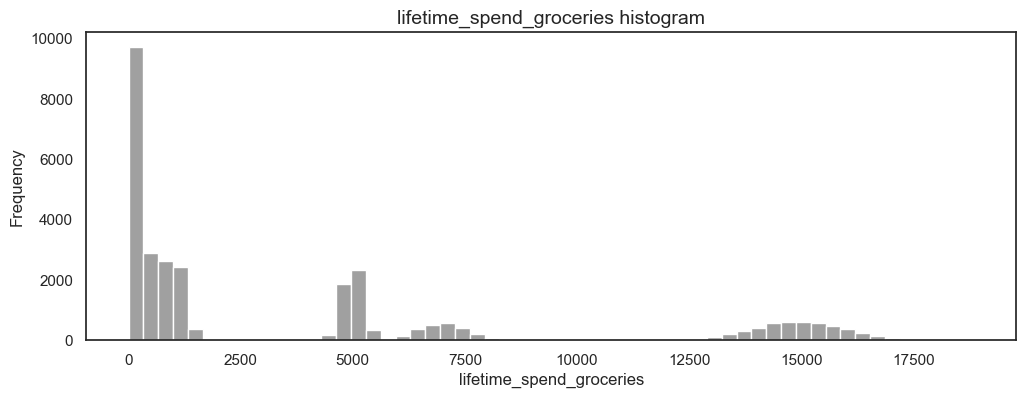

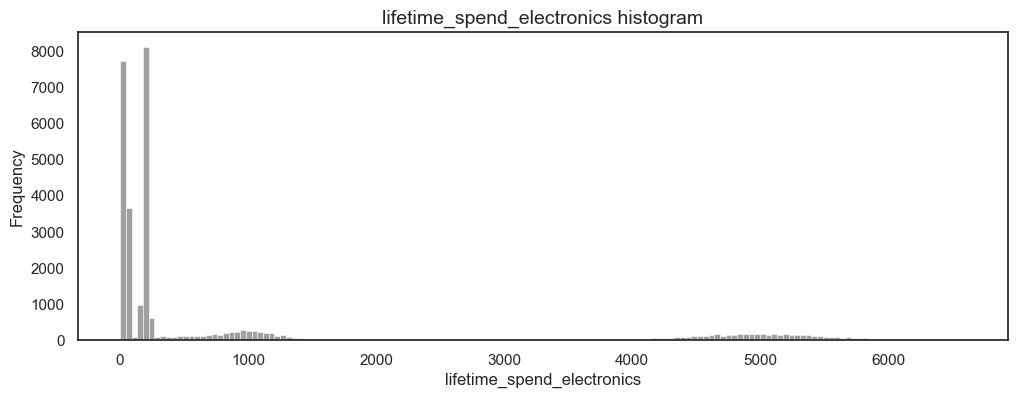

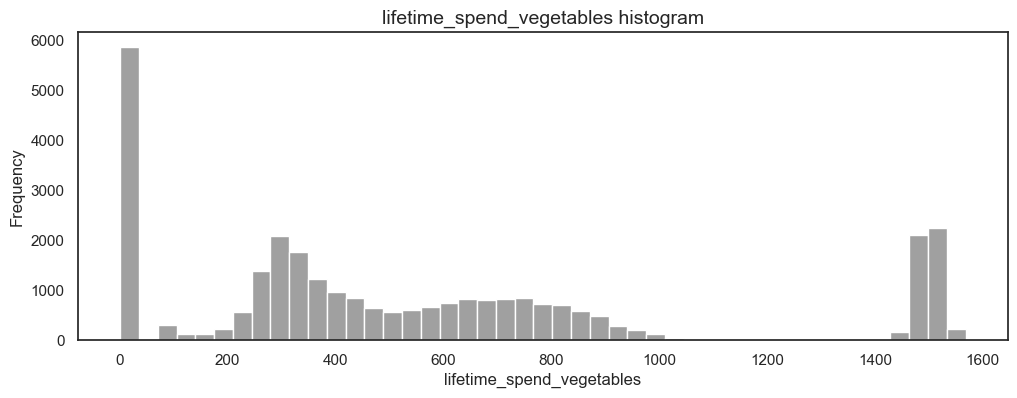

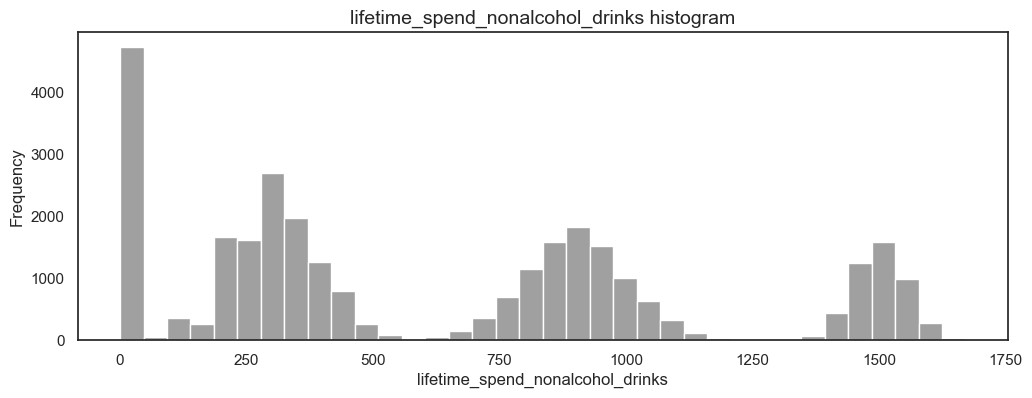

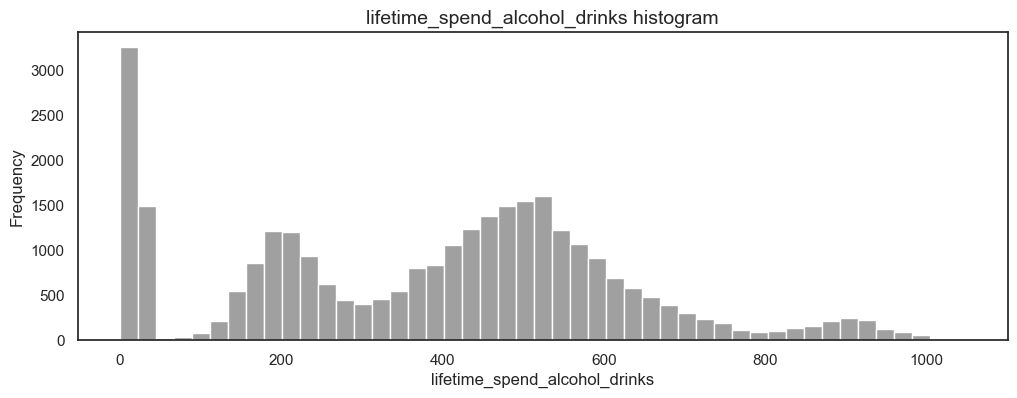

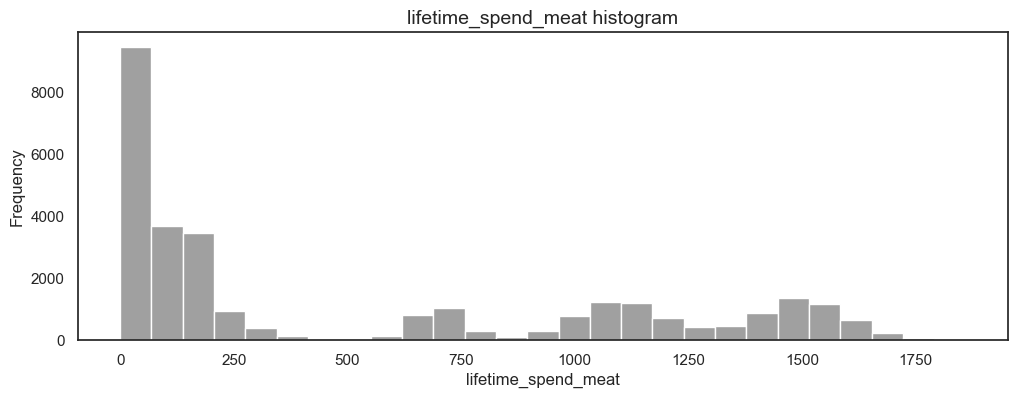

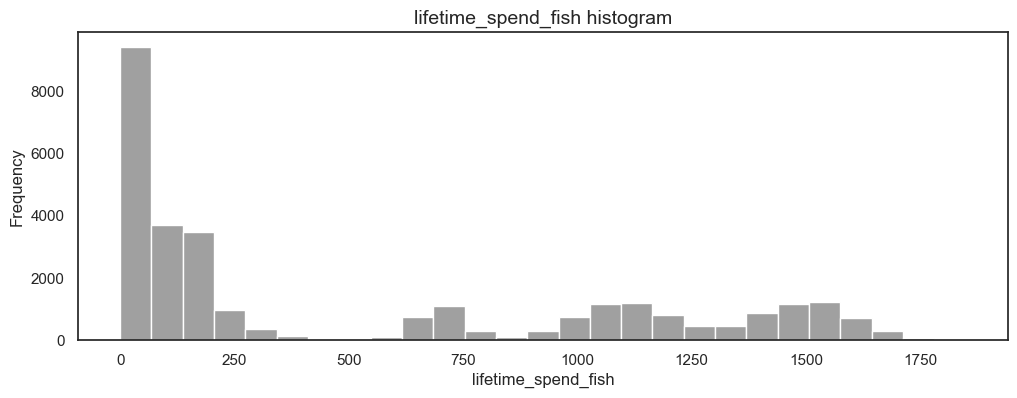

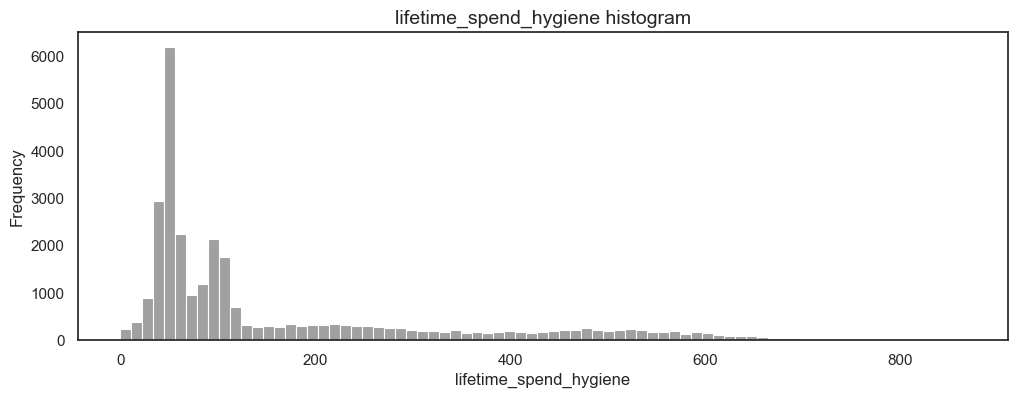

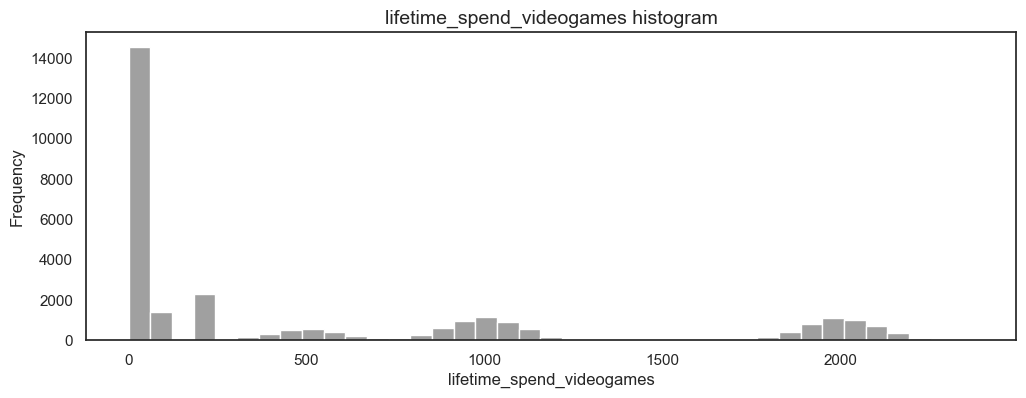

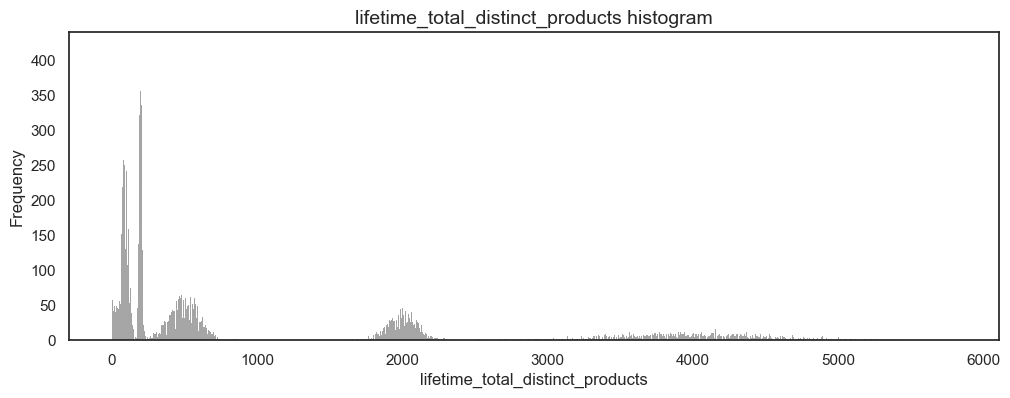

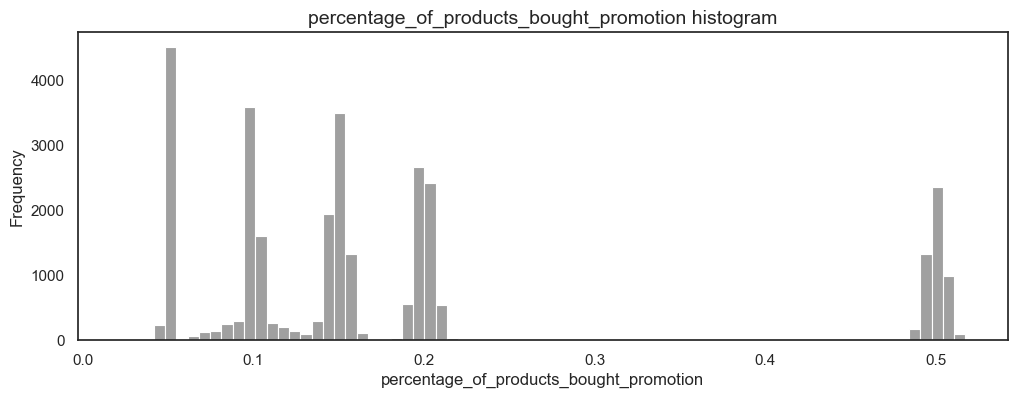

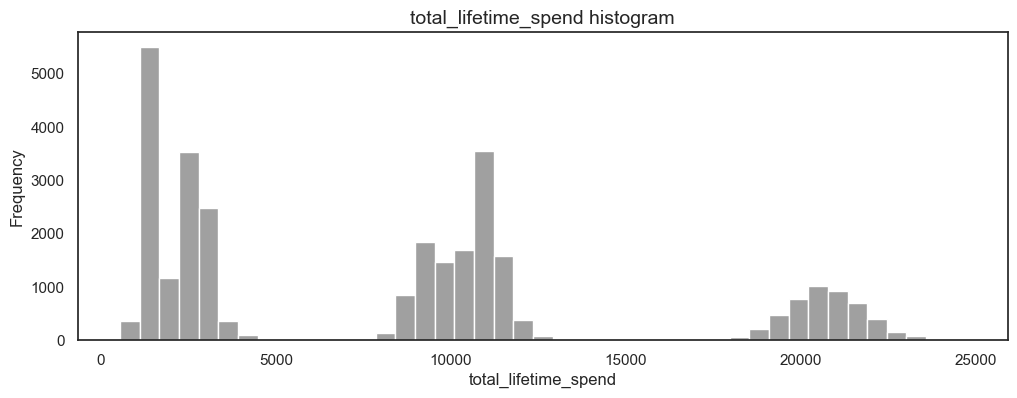

In [178]:
Functions.plot_histograms(individuals, ['age','lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables',
                              'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat', 'lifetime_spend_fish',
                              'lifetime_spend_hygiene', 'lifetime_spend_videogames', 'lifetime_total_distinct_products',
                              'percentage_of_products_bought_promotion', 'total_lifetime_spend'])

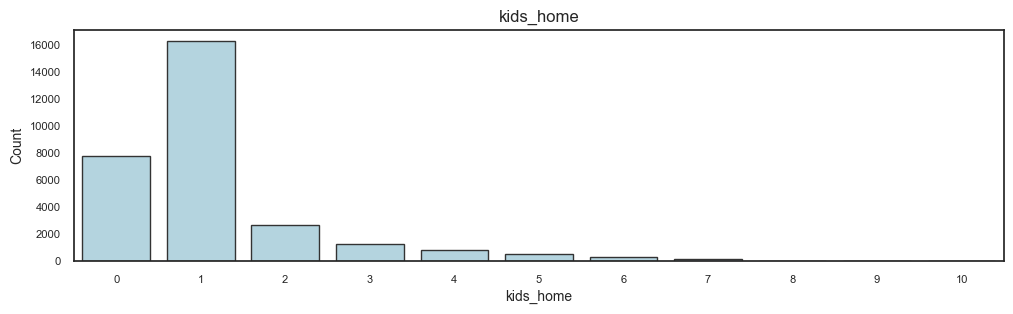

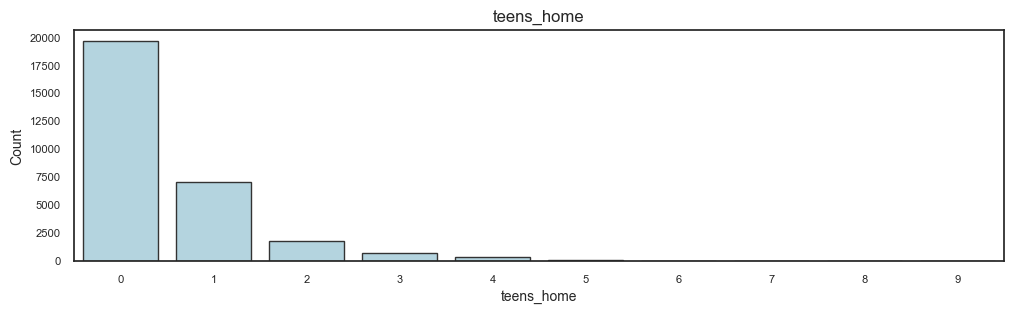

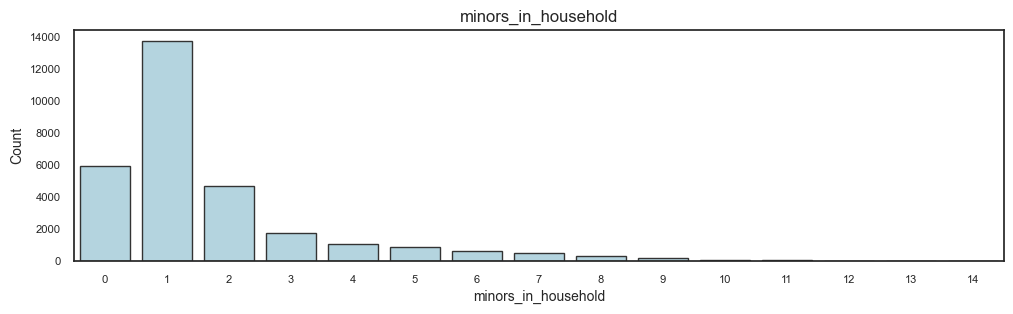

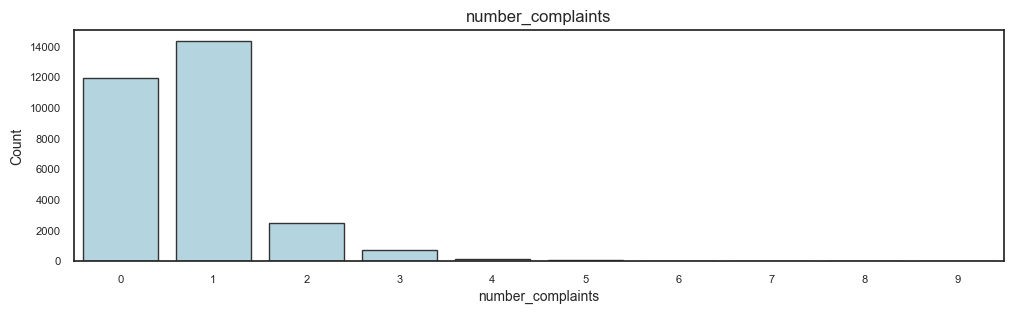

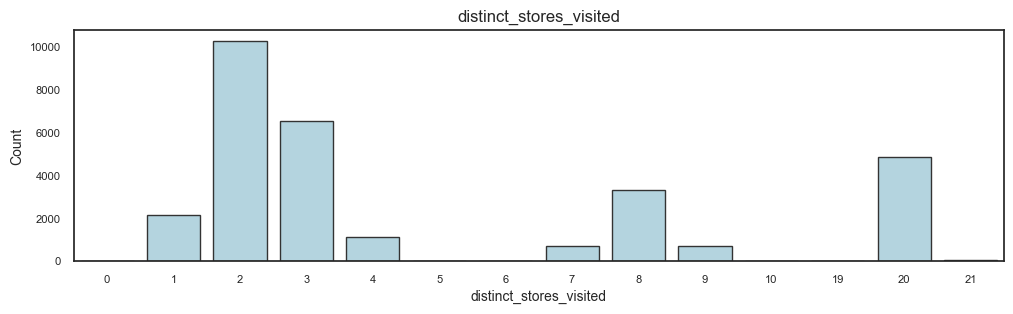

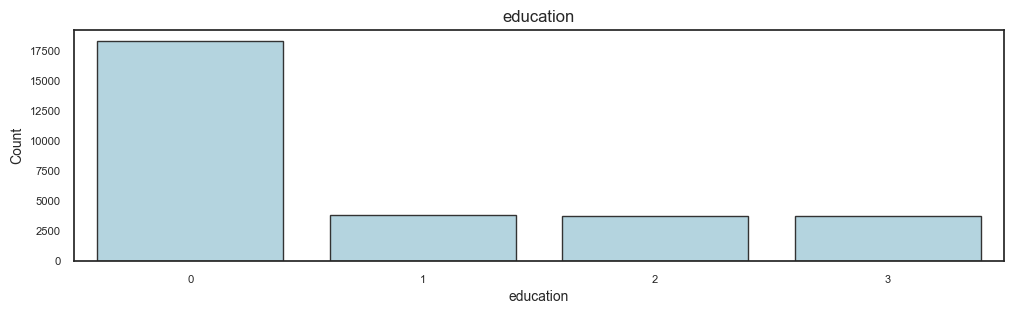

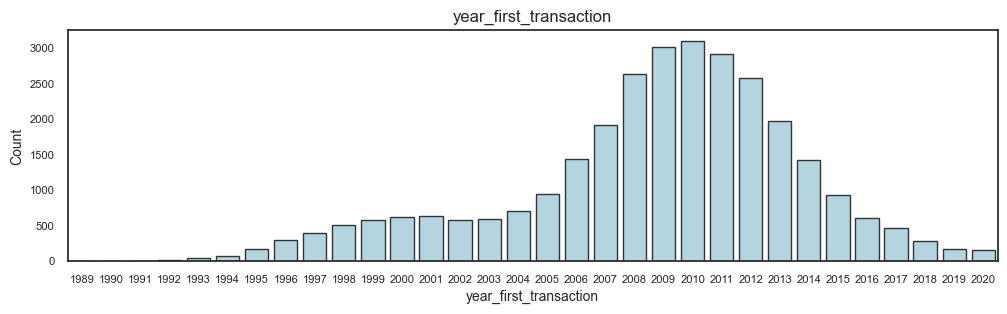

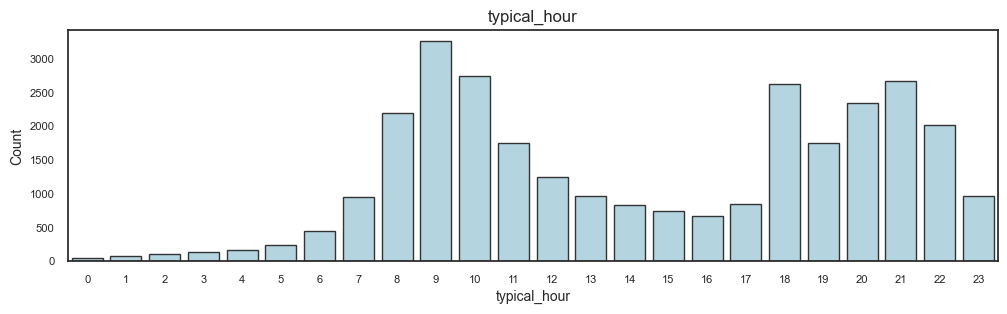

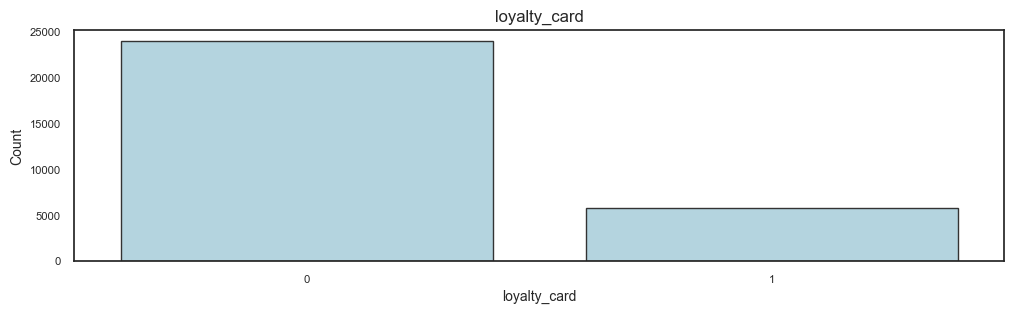

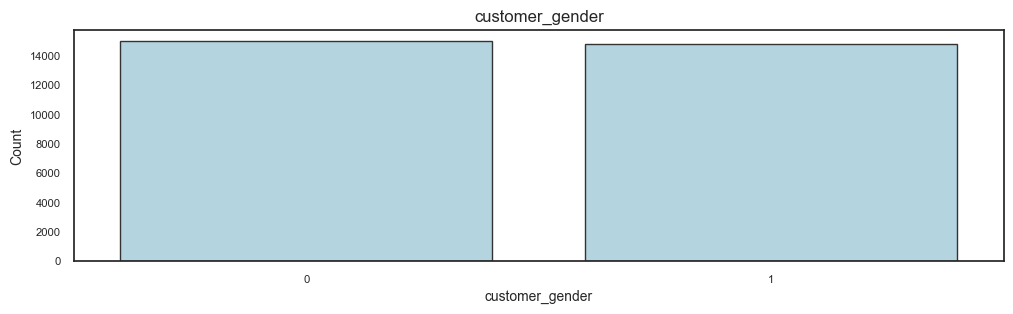

In [171]:
Functions.plot_bar_charts(individuals, ['kids_home', 'teens_home', 'minors_in_household', 
                              'number_complaints', 'distinct_stores_visited', 
                              'education', 'year_first_transaction','typical_hour', 
                              'loyalty_card', 'customer_gender'])

In [179]:
region_data = Functions.group_by_region(individuals, 'region', ['latitude_encoded', 'longitude_encoded', 
                                               'total_lifetime_spend', 'lifetime_total_distinct_products',
                                               'percentage_of_products_bought_promotion', 'distinct_stores_visited' ])

In [156]:
def regional_treemap_2(df):
    sns.set_style(style="whitegrid") 
    sizes = df["count"].values 
    labels = [f"{r}\n({c})" for r, c in zip(df["region"], df["count"])]
    colors = ['#91DCEA', '#64CDCC', '#5FBB68', '#F9D23C', '#F9A729', '#FD6F30']
    
    squarify.plot(sizes=sizes, label=labels, alpha=0.6, text_kwargs={'fontsize': 12}).set(title='Observations by Region')
    plt.axis('off')
    sns.set(rc={'figure.figsize':(18,18)})
    plt.show()

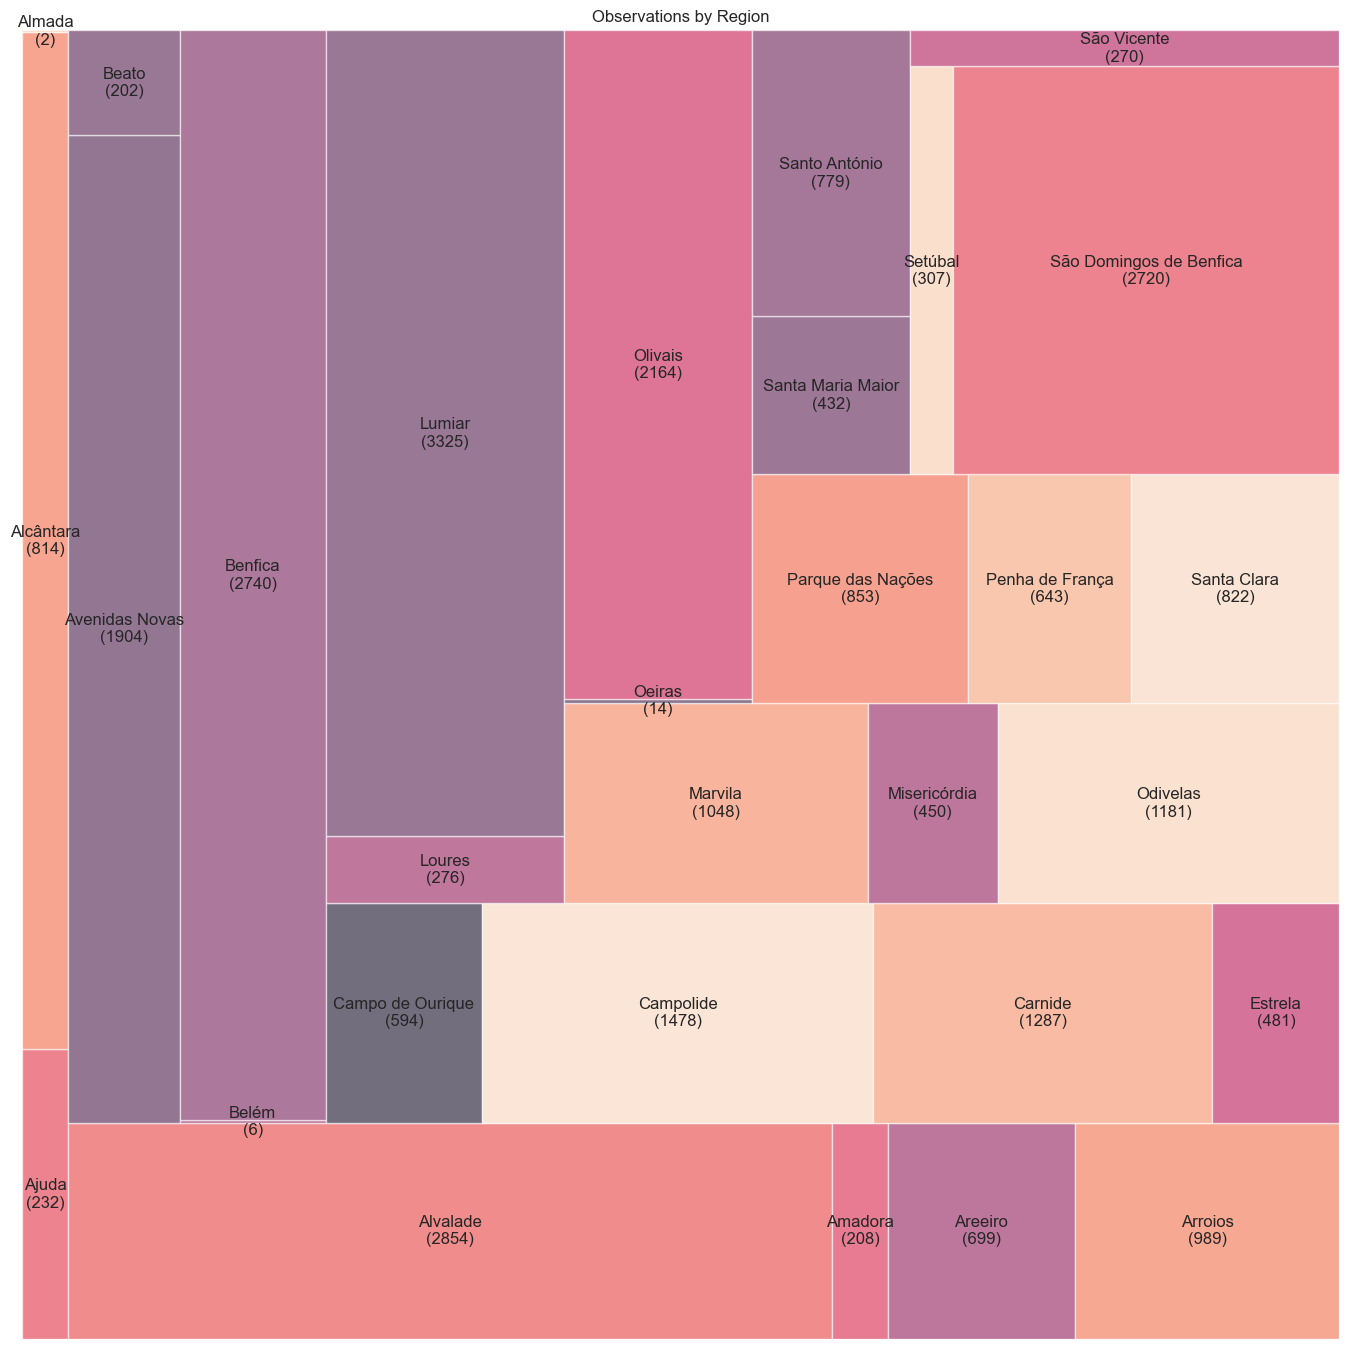

In [157]:
regional_treemap_2(region_data)

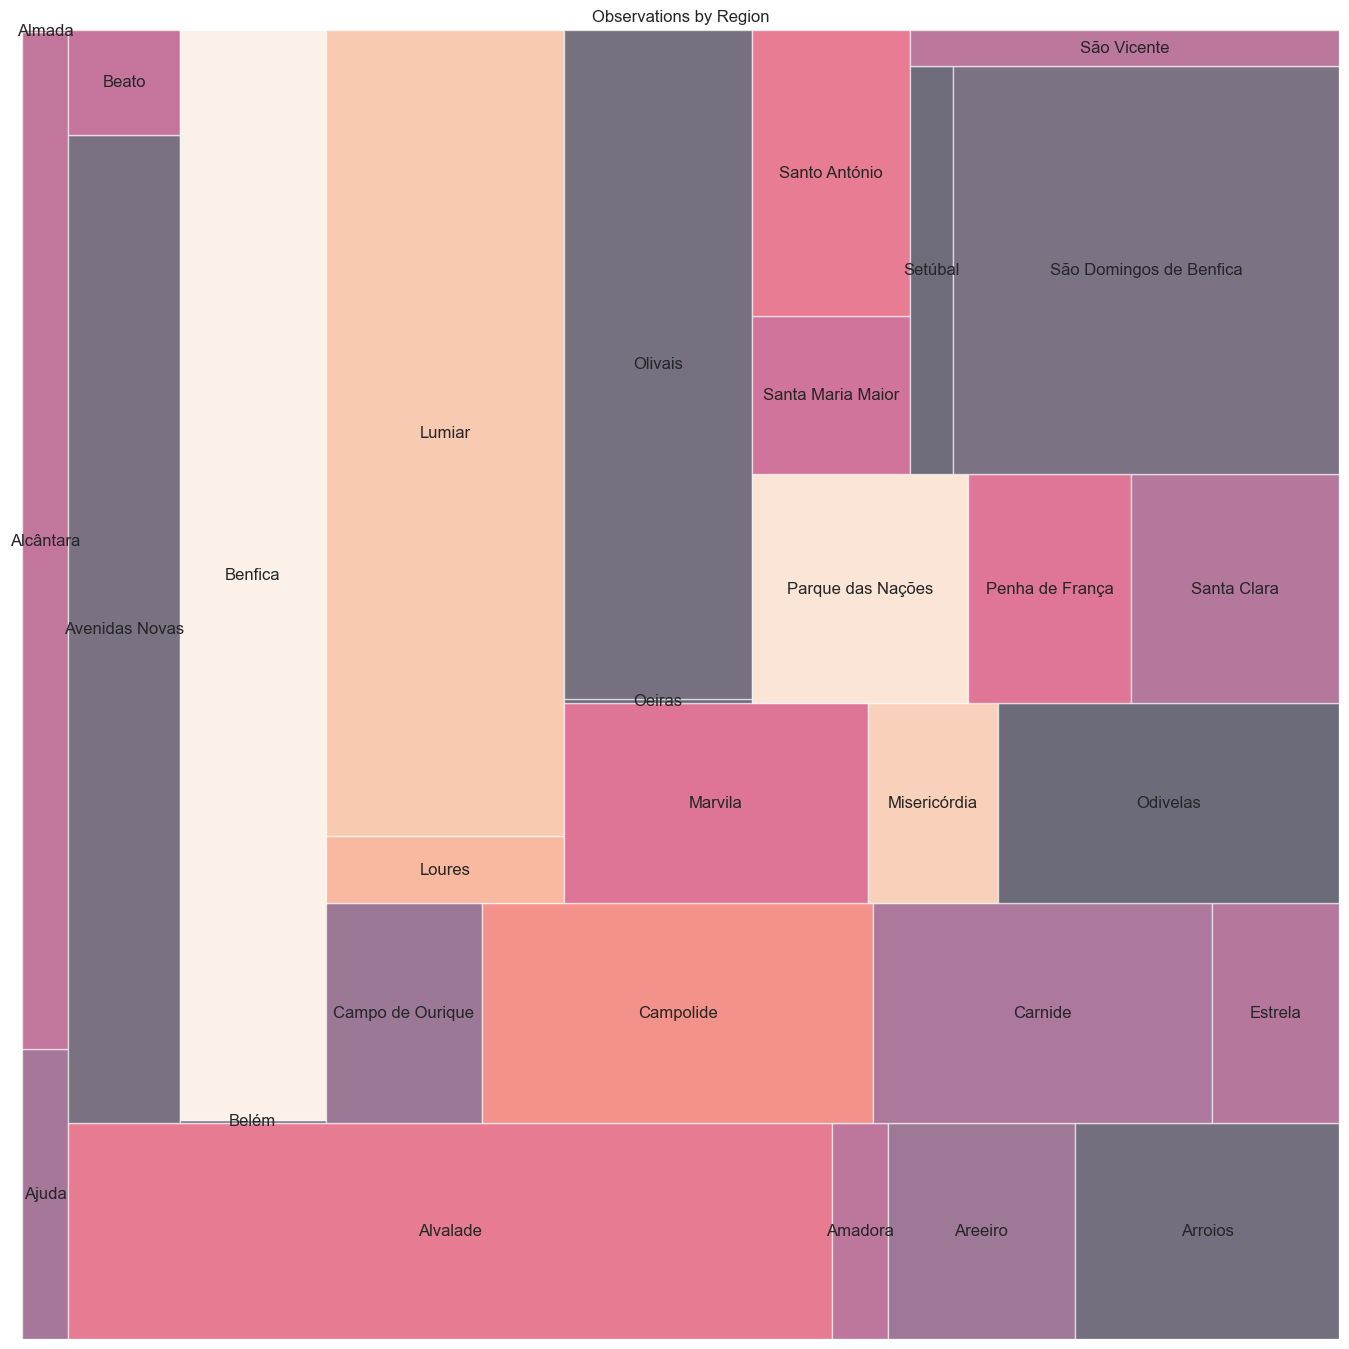

In [160]:
Functions.regional_treemap(region_data)

<a class="anchor" id="2.2.2.-bullet">     
    

#### 2.2.2. Supermarkets

</a>

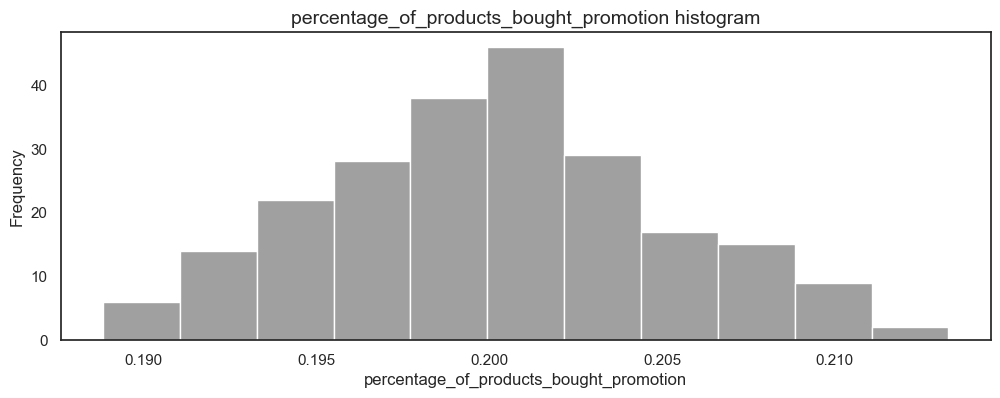

In [180]:
Functions.plot_histograms(supermarkets, ['percentage_of_products_bought_promotion'])

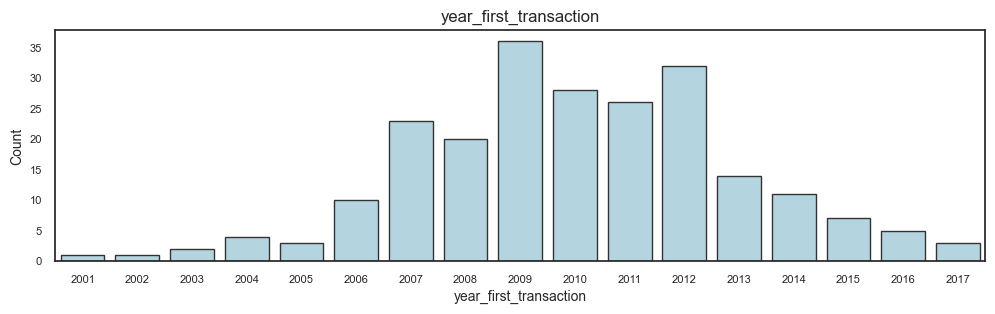

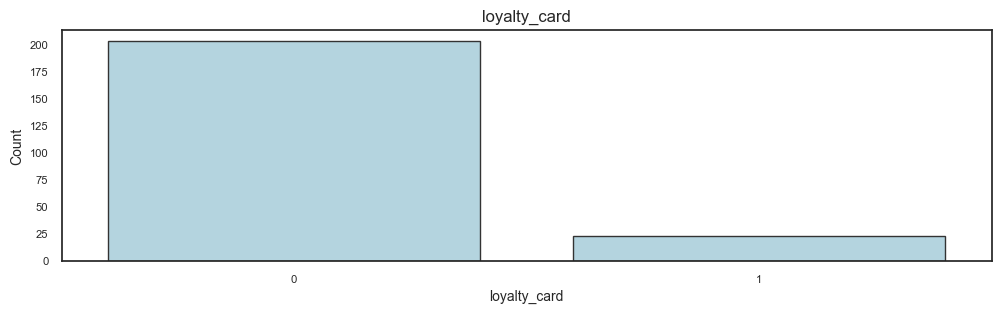

In [181]:
Functions.plot_bar_charts(supermarkets, ['year_first_transaction', 'loyalty_card'])

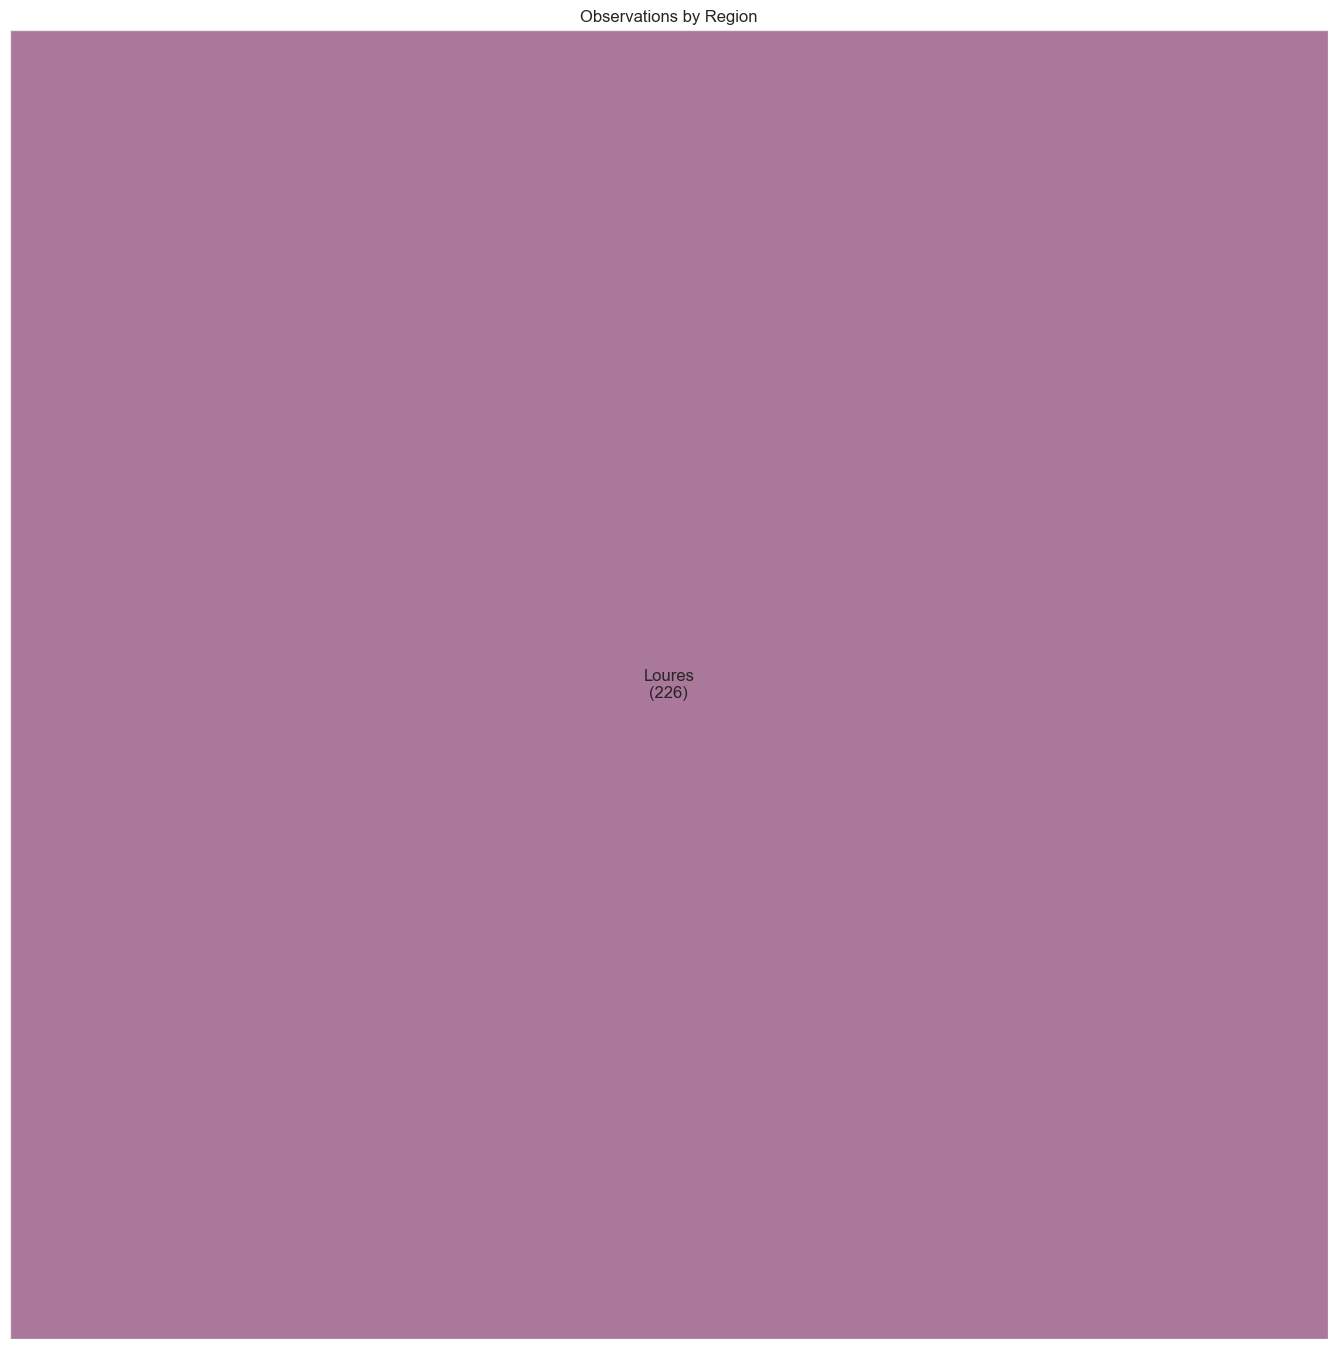

In [182]:
region_data_supermarket = Functions.group_by_region(supermarkets, 'region', ['loyalty_card', 'percentage_of_products_bought_promotion'])
regional_treemap_2(region_data_supermarket)

<a class="anchor" id="2.3.-bullet">     
    

### 2.3. Multivariate Analysis (for Individuals)

</a>

#### Assessing Correlation

> Let's measure correlation visually first

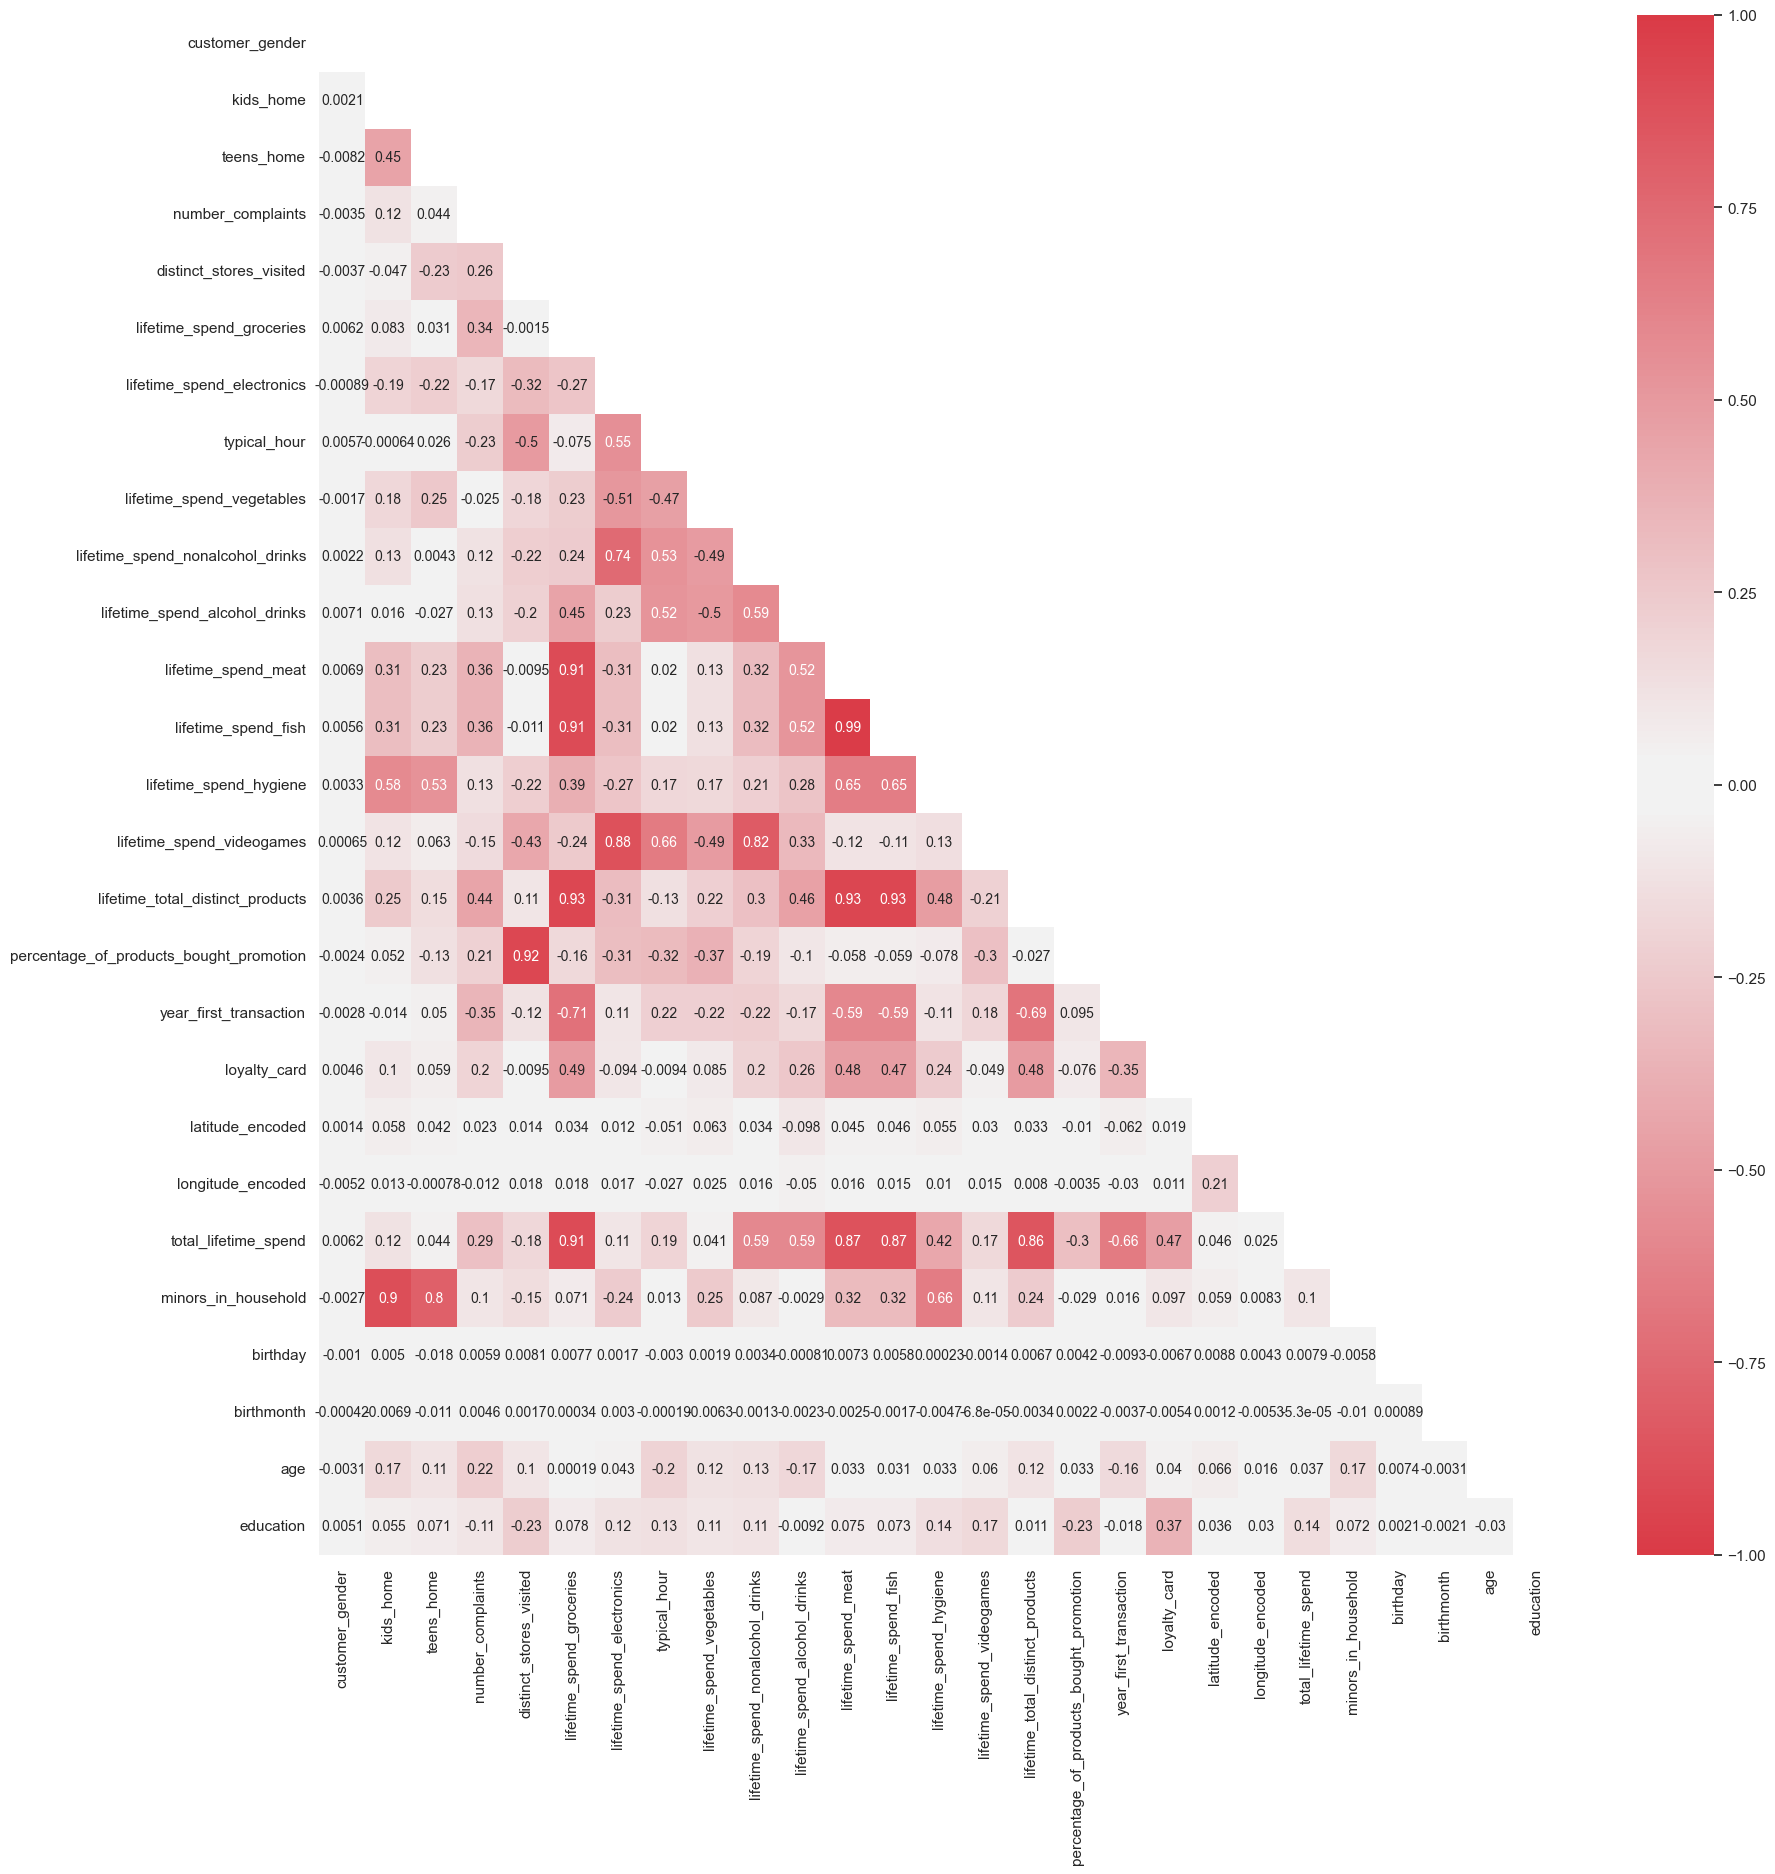

In [216]:
cmap = sns.diverging_palette(10, 10,sep= 10, as_cmap=True)
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(20, 20))

exclude_columns = ['customer_name', 'region']
corr_matrix = individuals.drop(columns=exclude_columns).corr()


mask = np.tri(*corr_matrix.shape, k=-1, dtype=bool)
corr_matrix.where(mask, np.NaN, inplace=True)

sns.heatmap(corr_matrix, 
            cmap=cmap,  
            center= 0,  
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            annot=True,
            annot_kws={"fontsize": 10},
            vmin=-1, vmax=1,
            ax=ax)

plt.show()


> Since there are many features, we will narrow down our search to only the most highly correlated pairs.

In [44]:
Functions.get_high_correlations(individuals.corr(), 0.66)

Variable 1                               Variable 2  \
12               lifetime_spend_meat                      lifetime_spend_fish   
13               lifetime_spend_meat         lifetime_total_distinct_products   
15               lifetime_spend_fish         lifetime_total_distinct_products   
5           lifetime_spend_groceries         lifetime_total_distinct_products   
2            distinct_stores_visited  percentage_of_products_bought_promotion   
7           lifetime_spend_groceries                     total_lifetime_spend   
3           lifetime_spend_groceries                      lifetime_spend_meat   
4           lifetime_spend_groceries                      lifetime_spend_fish   
0                          kids_home                      minors_in_household   
9         lifetime_spend_electronics                lifetime_spend_videogames   
14               lifetime_spend_meat                     total_lifetime_spend   
16               lifetime_spend_fish                     total_lifetime_spend   
18  lifetime_total_distinct_products                     total_lifetime_spend   
11  lifetime_spend_nonalcohol_drinks                lifetime_spend_videogames   
1                         teens_home                      minors_in_household   
8         lifetime_spend_electronics         lifetime_spend_nonalcohol_drinks   
10                      typical_hour                lifetime_spend_videogames   
17  lifetime_total_distinct_products                   year_first_transaction   
6           lifetime_spend_groceries                   year_first_transaction   

    Correlation  
12     0.986010  
13     0.929894  
15     0.929424  
5      0.926119  
2      0.923021  
7      0.913175  
3      0.912783  
4      0.912134  
0      0.895671  
9      0.877892  
14     0.869312  
16     0.869248  
18     0.855891  
11     0.824188  
1      0.799848  
8      0.744620  
10     0.660926  
17    -0.688549  
6     -0.706913

#### Visualization

> Firstly, we separate the types of columns to facilitate the process of viewing the variables interaction.

In [219]:
continuous = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction', 'total_lifetime_spend']


#Variaveis tais como 'lifetime_total_distinct_products', 'year_first_transaction', 
#  'age', 'birthday', estão a ser tratadas como continuas neste contexto dada a amplitude delas.

discrete = ['kids_home', 'teens_home', 'typical_hour', 'birthmonth',
       'number_complaints', 'distinct_stores_visited', 'minors_in_household', 'education',  'age', 'birthday' ]

binary = ['customer_gender', 'loyalty_card']

##### Analyzing Pairplots

não analisar: age
lifetime_spent      year_first_transaction (os mais antigos gatam mais)
                    vegetables (é possivel analisar mais um cluster que remete para os vegetarianos)

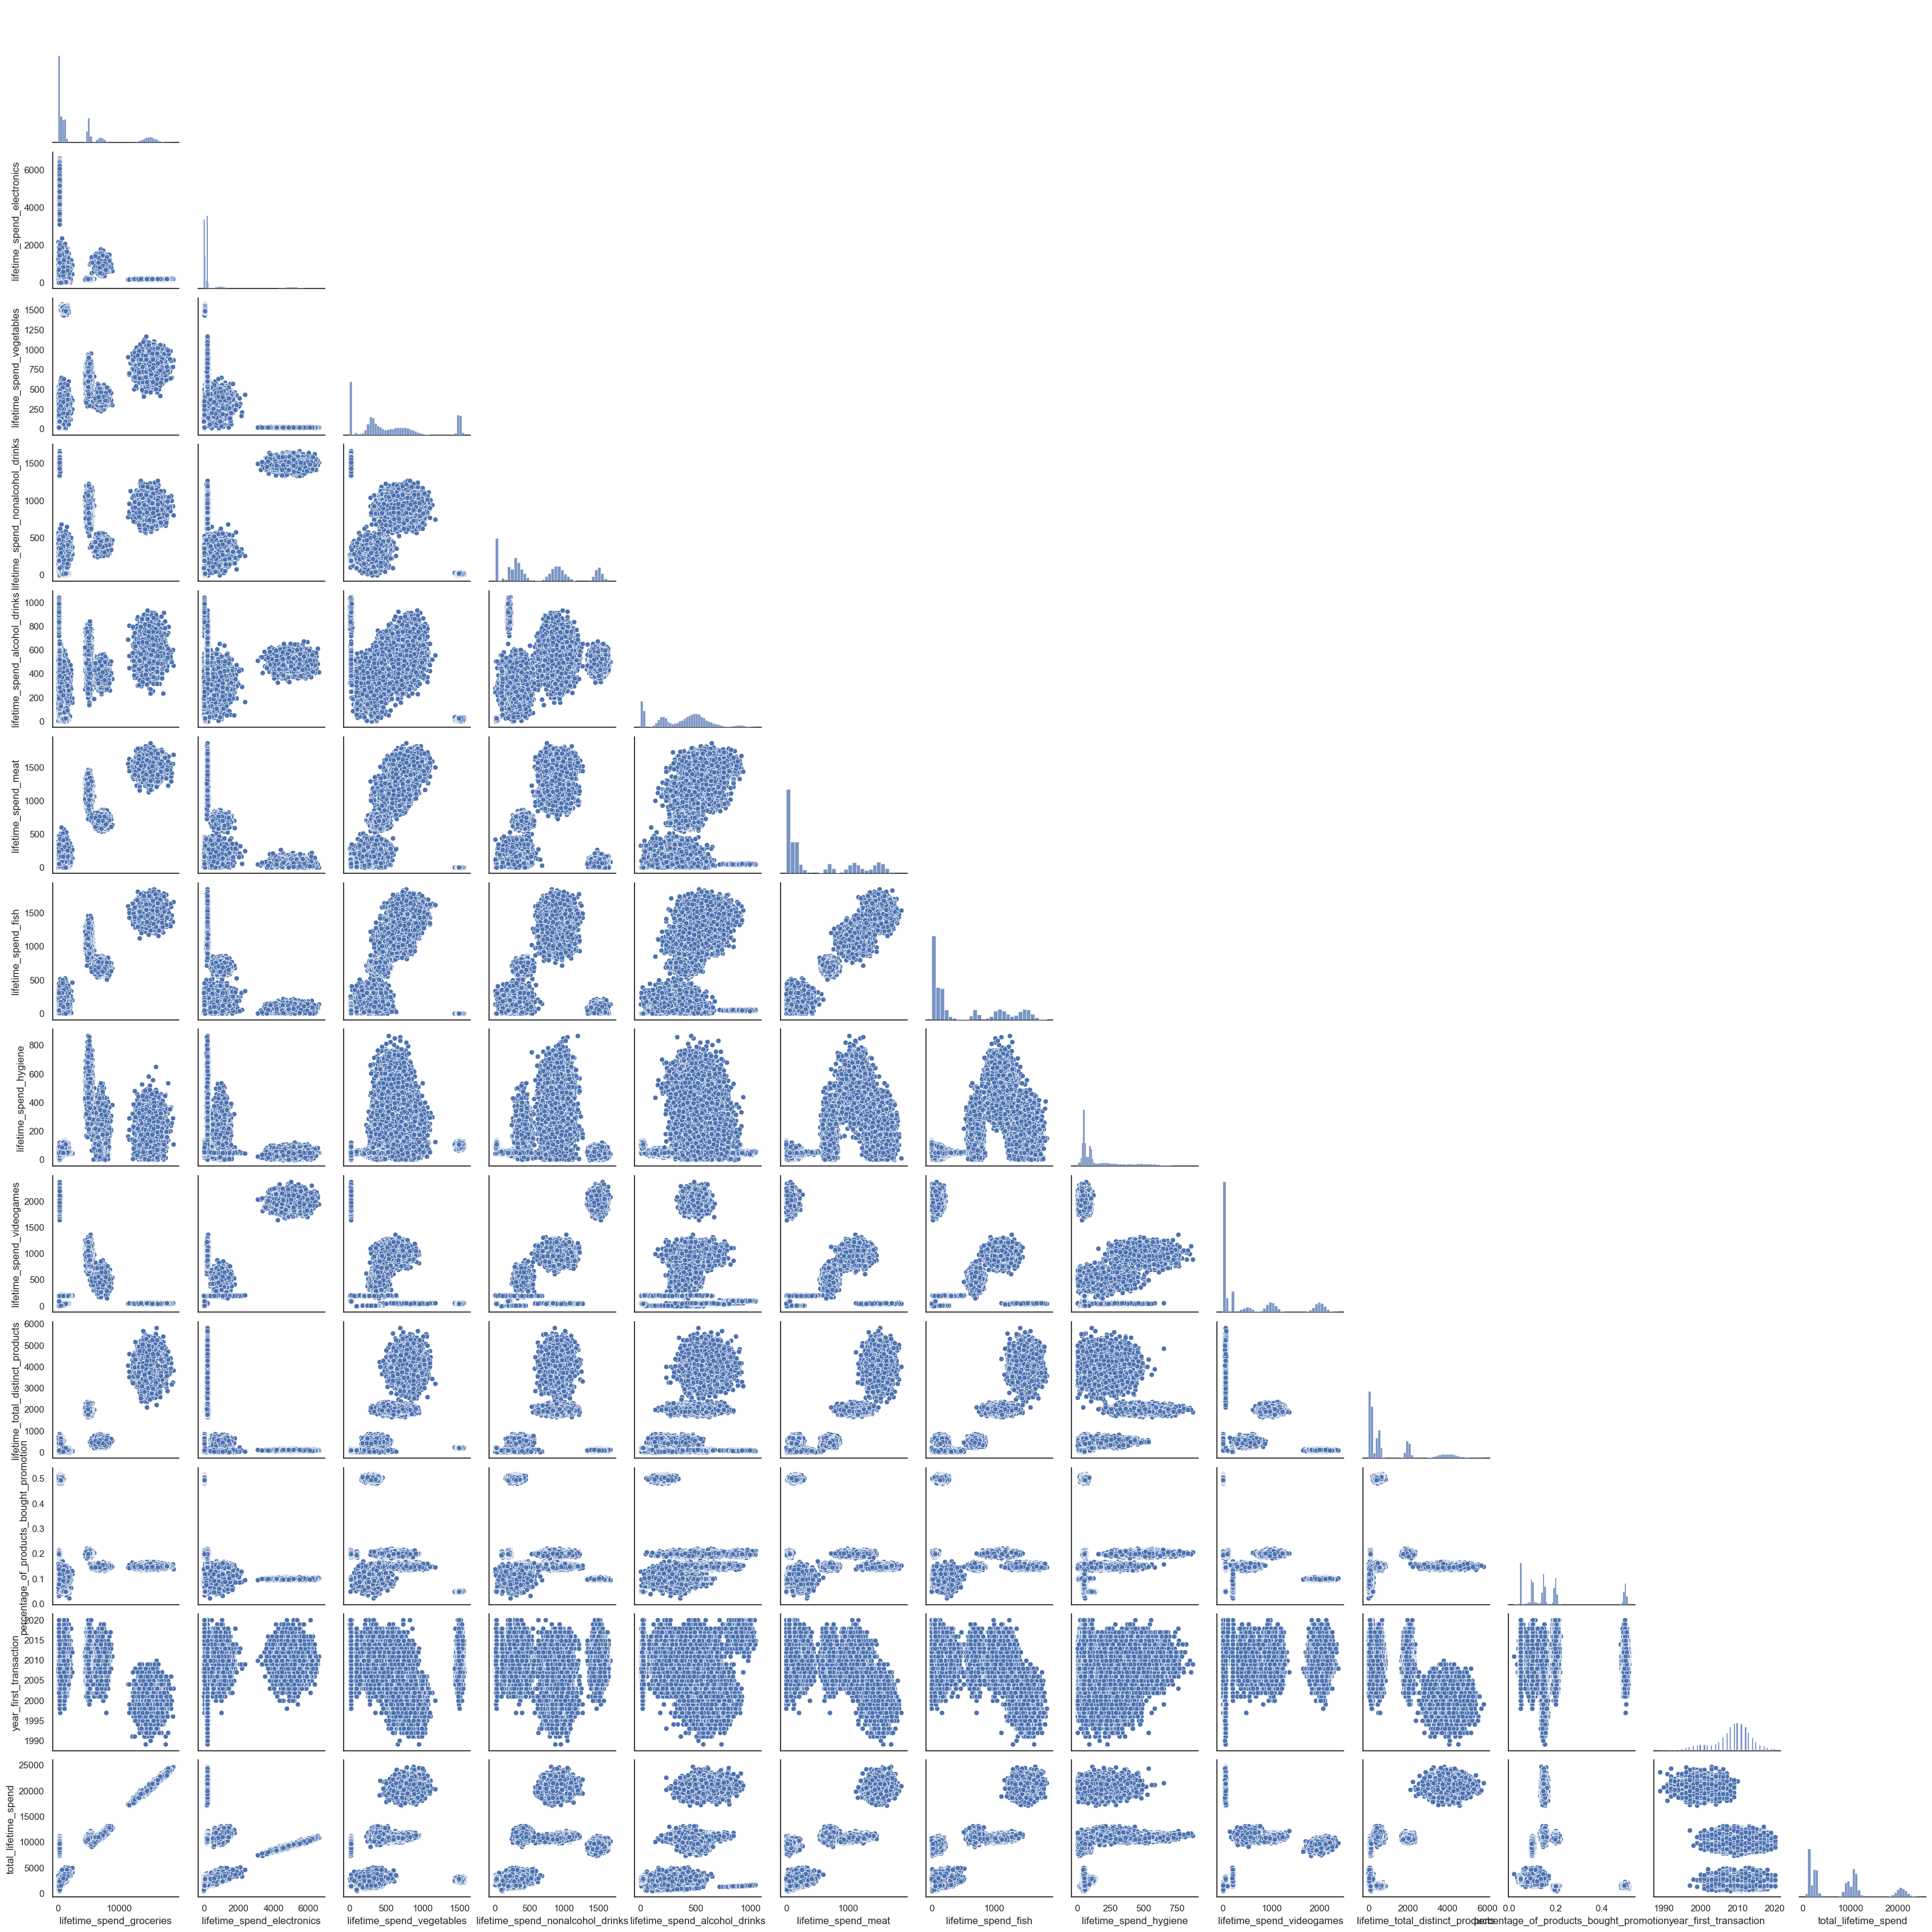

In [225]:
pp_continuous = sns.pairplot(individuals[continuous], diag_kind='hist', kind='scatter', corner=True)
plt.show()

> It seems that some variable pairs present almost a linear relationship (for example, lifetime_spend_meat to lifetime_spend_fish), as seen prior within the correlation matrix. This being said, it might be appropriate to perform a junction of these variables.

In [ ]:
age     number of complaints


In [232]:
pp_discrete = sns.pairplot(individuals[discrete], diag_kind='hist', kind='scatter', corner=True, hue=)
plt.show()

TypeError: pairplot() got an unexpected keyword argument 'alpha'

##### Education and Number of Minors in Household !!ESTES GRÁFICOS PRECISAM DE SER MUDADOS E MELHORADOS

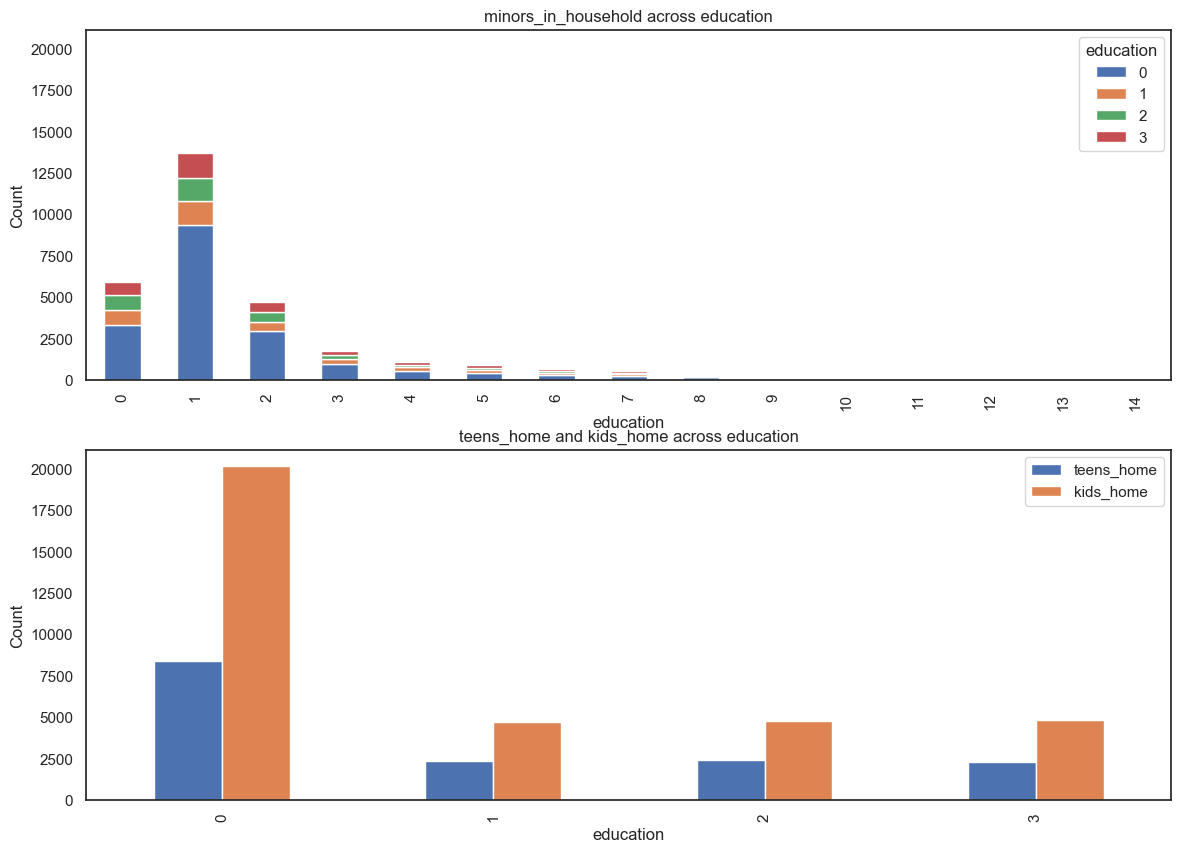

In [207]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharey=True)
sns.set_style(style='white')
# Plot the first subplot: stacked bar chart
individuals.groupby('minors_in_household')['education'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axs[0])

# Set axis labels and title for the first subplot
axs[0].set_xlabel('education')
axs[0].set_ylabel('Count')
axs[0].set_title('minors_in_household across education')

# Plot the second subplot: grouped bar chart
individuals.groupby('education')[['teens_home', 'kids_home']].sum().plot(kind='bar', ax=axs[1])

# Set axis labels and title for the second subplot
axs[1].set_xlabel('education')
axs[1].set_ylabel('Count')
axs[1].set_title('teens_home and kids_home across education')

# Show the plot
plt.show()

##### Discrete Variables against Continuous Variables

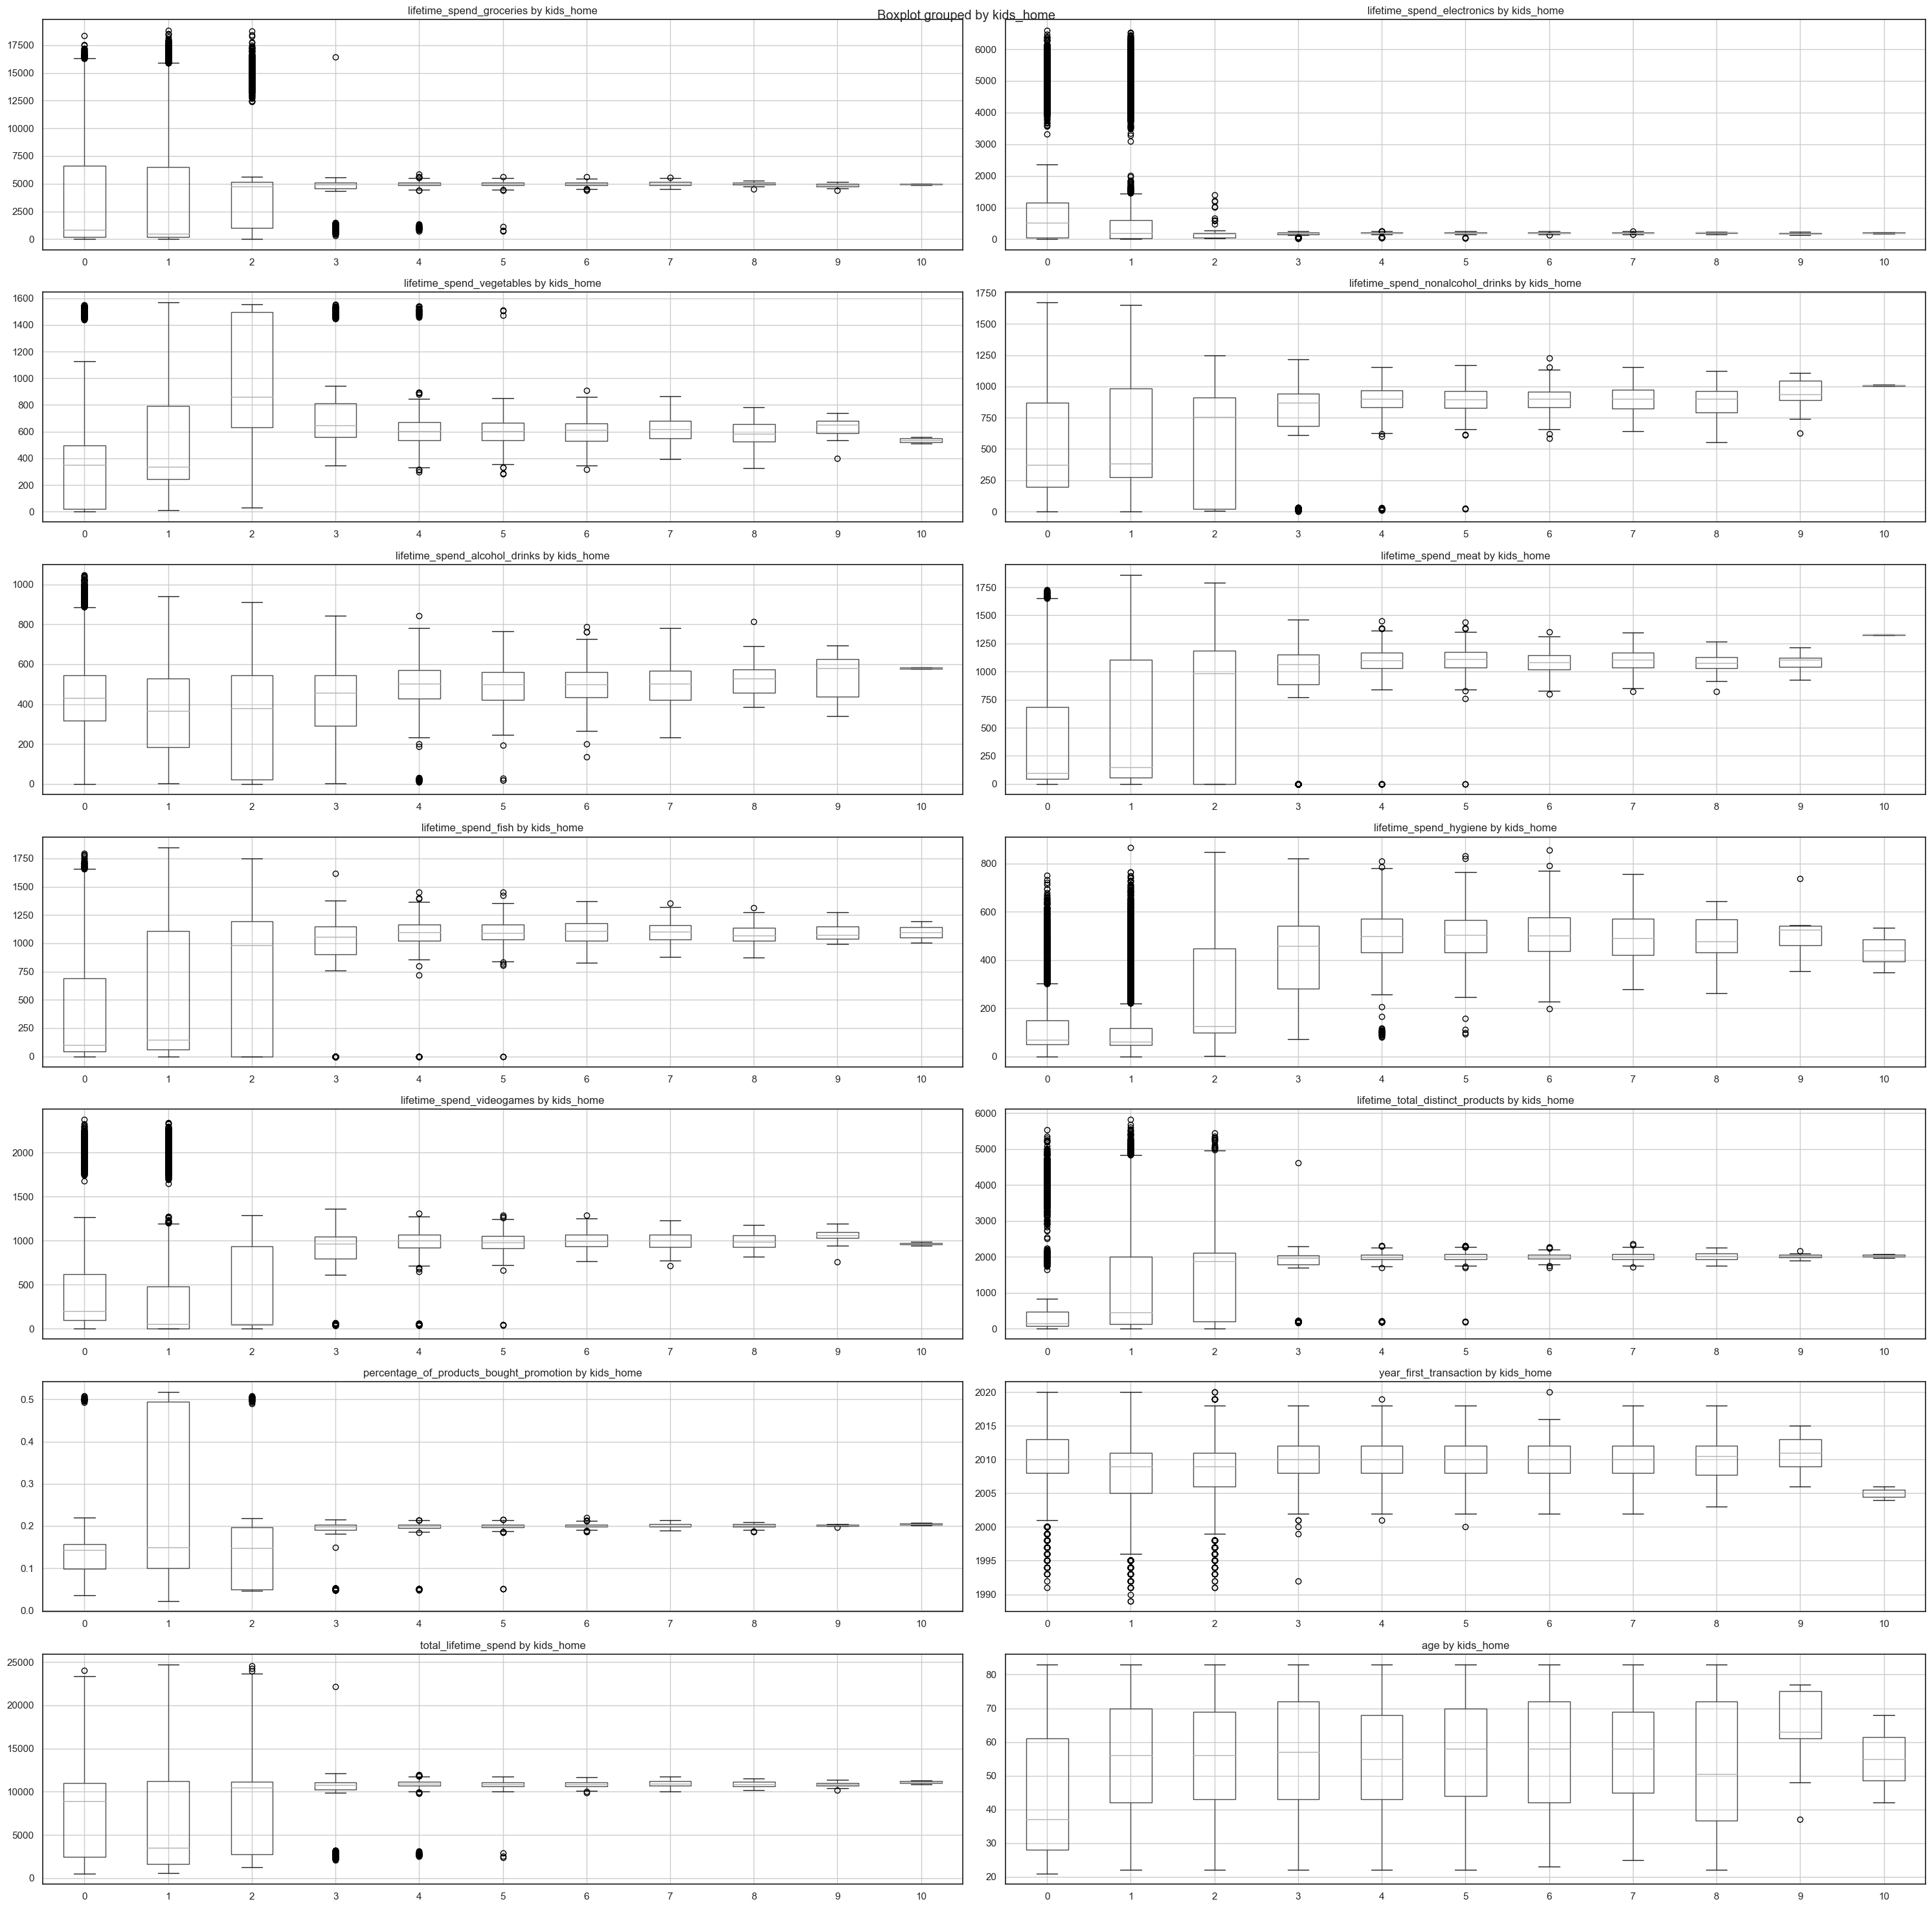

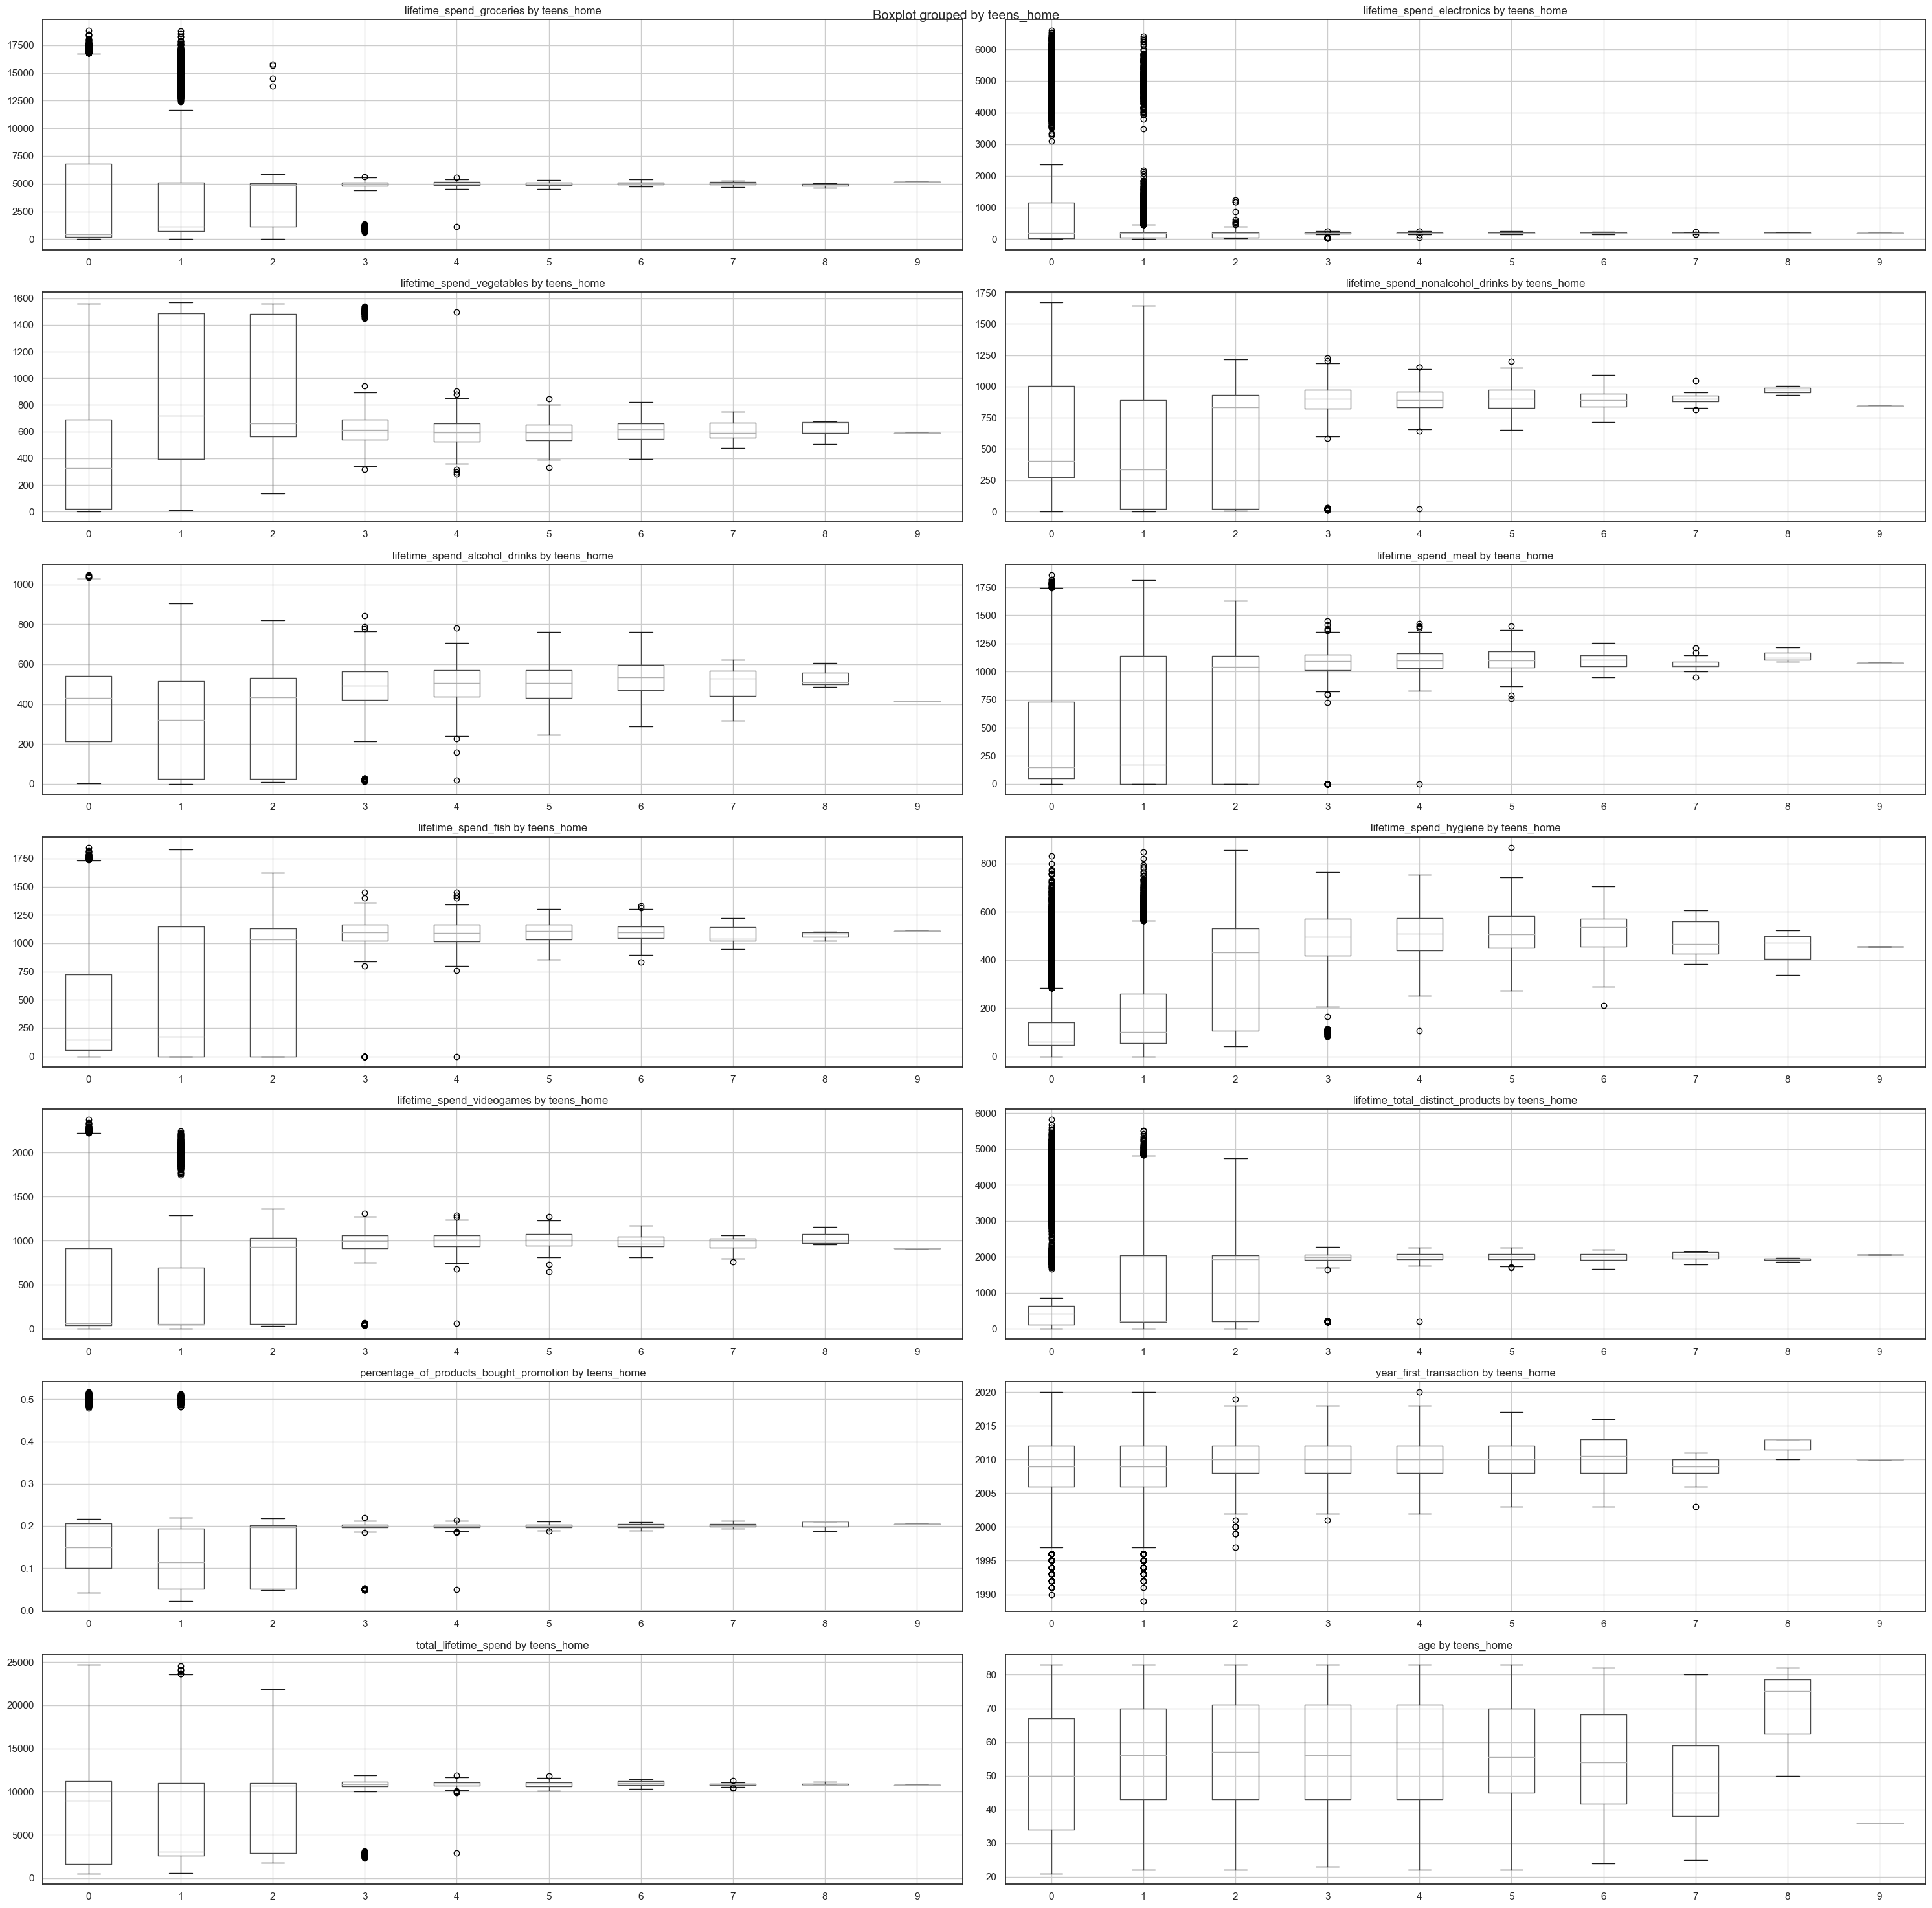

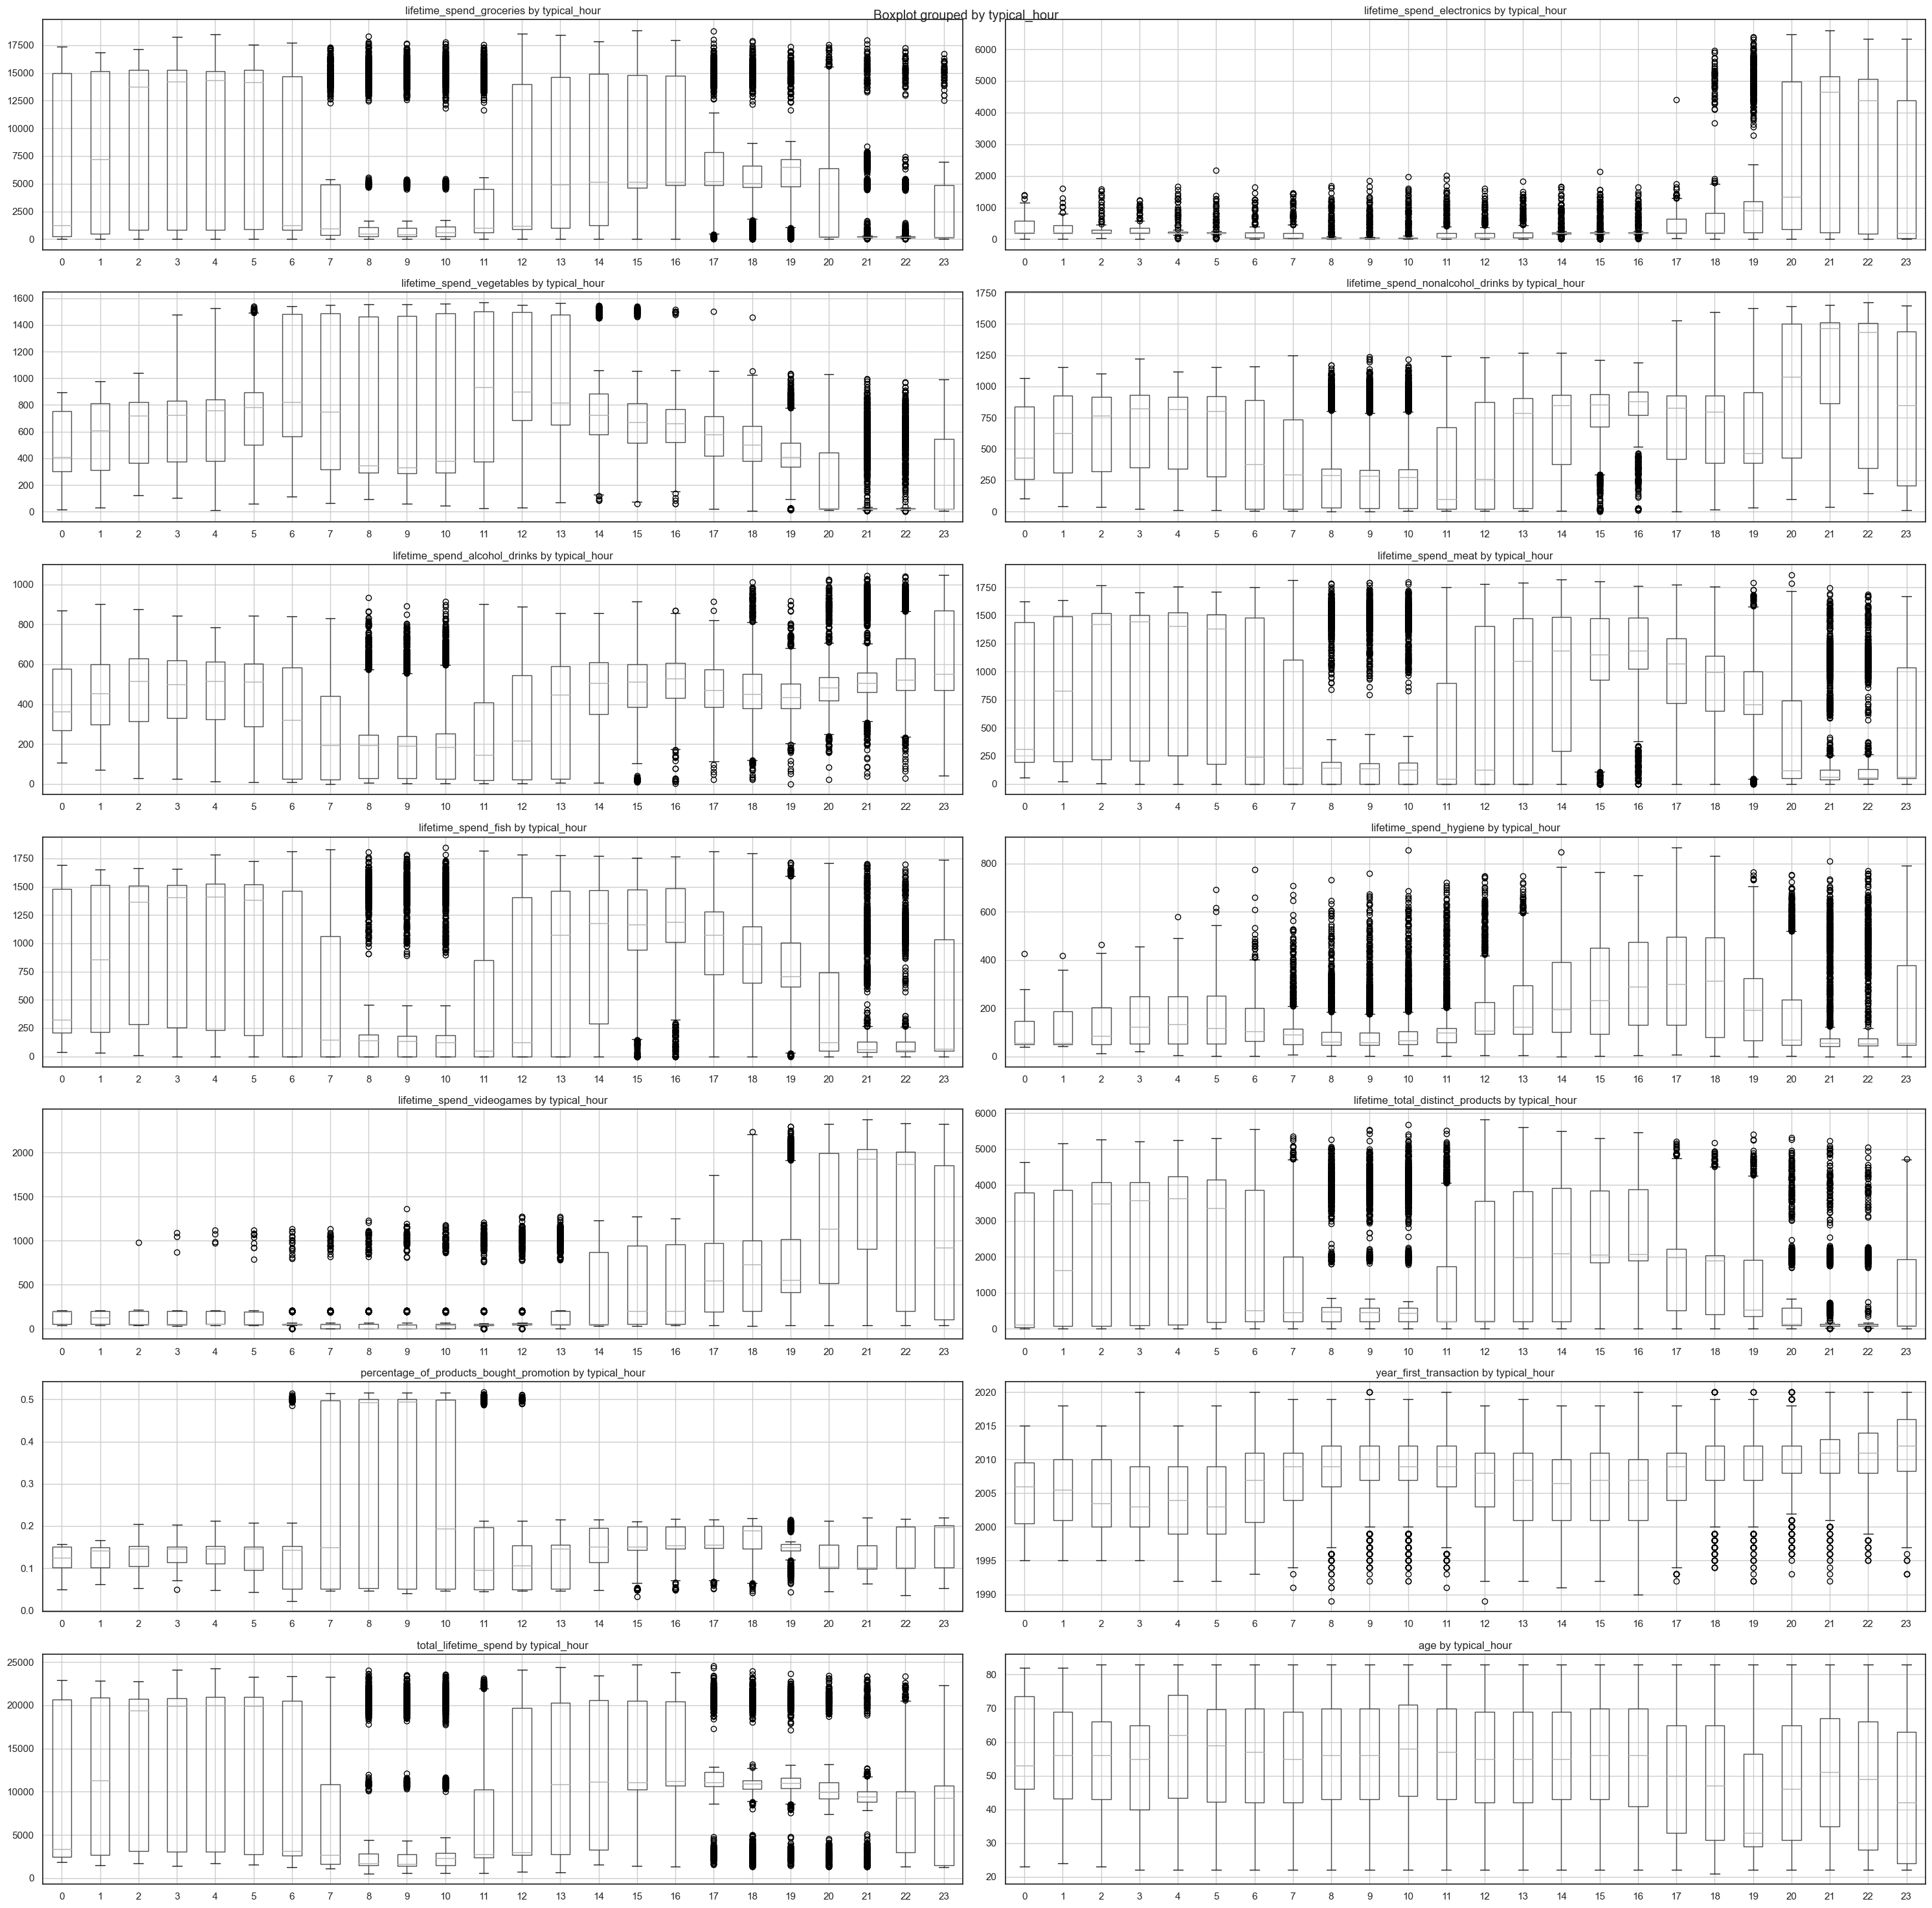

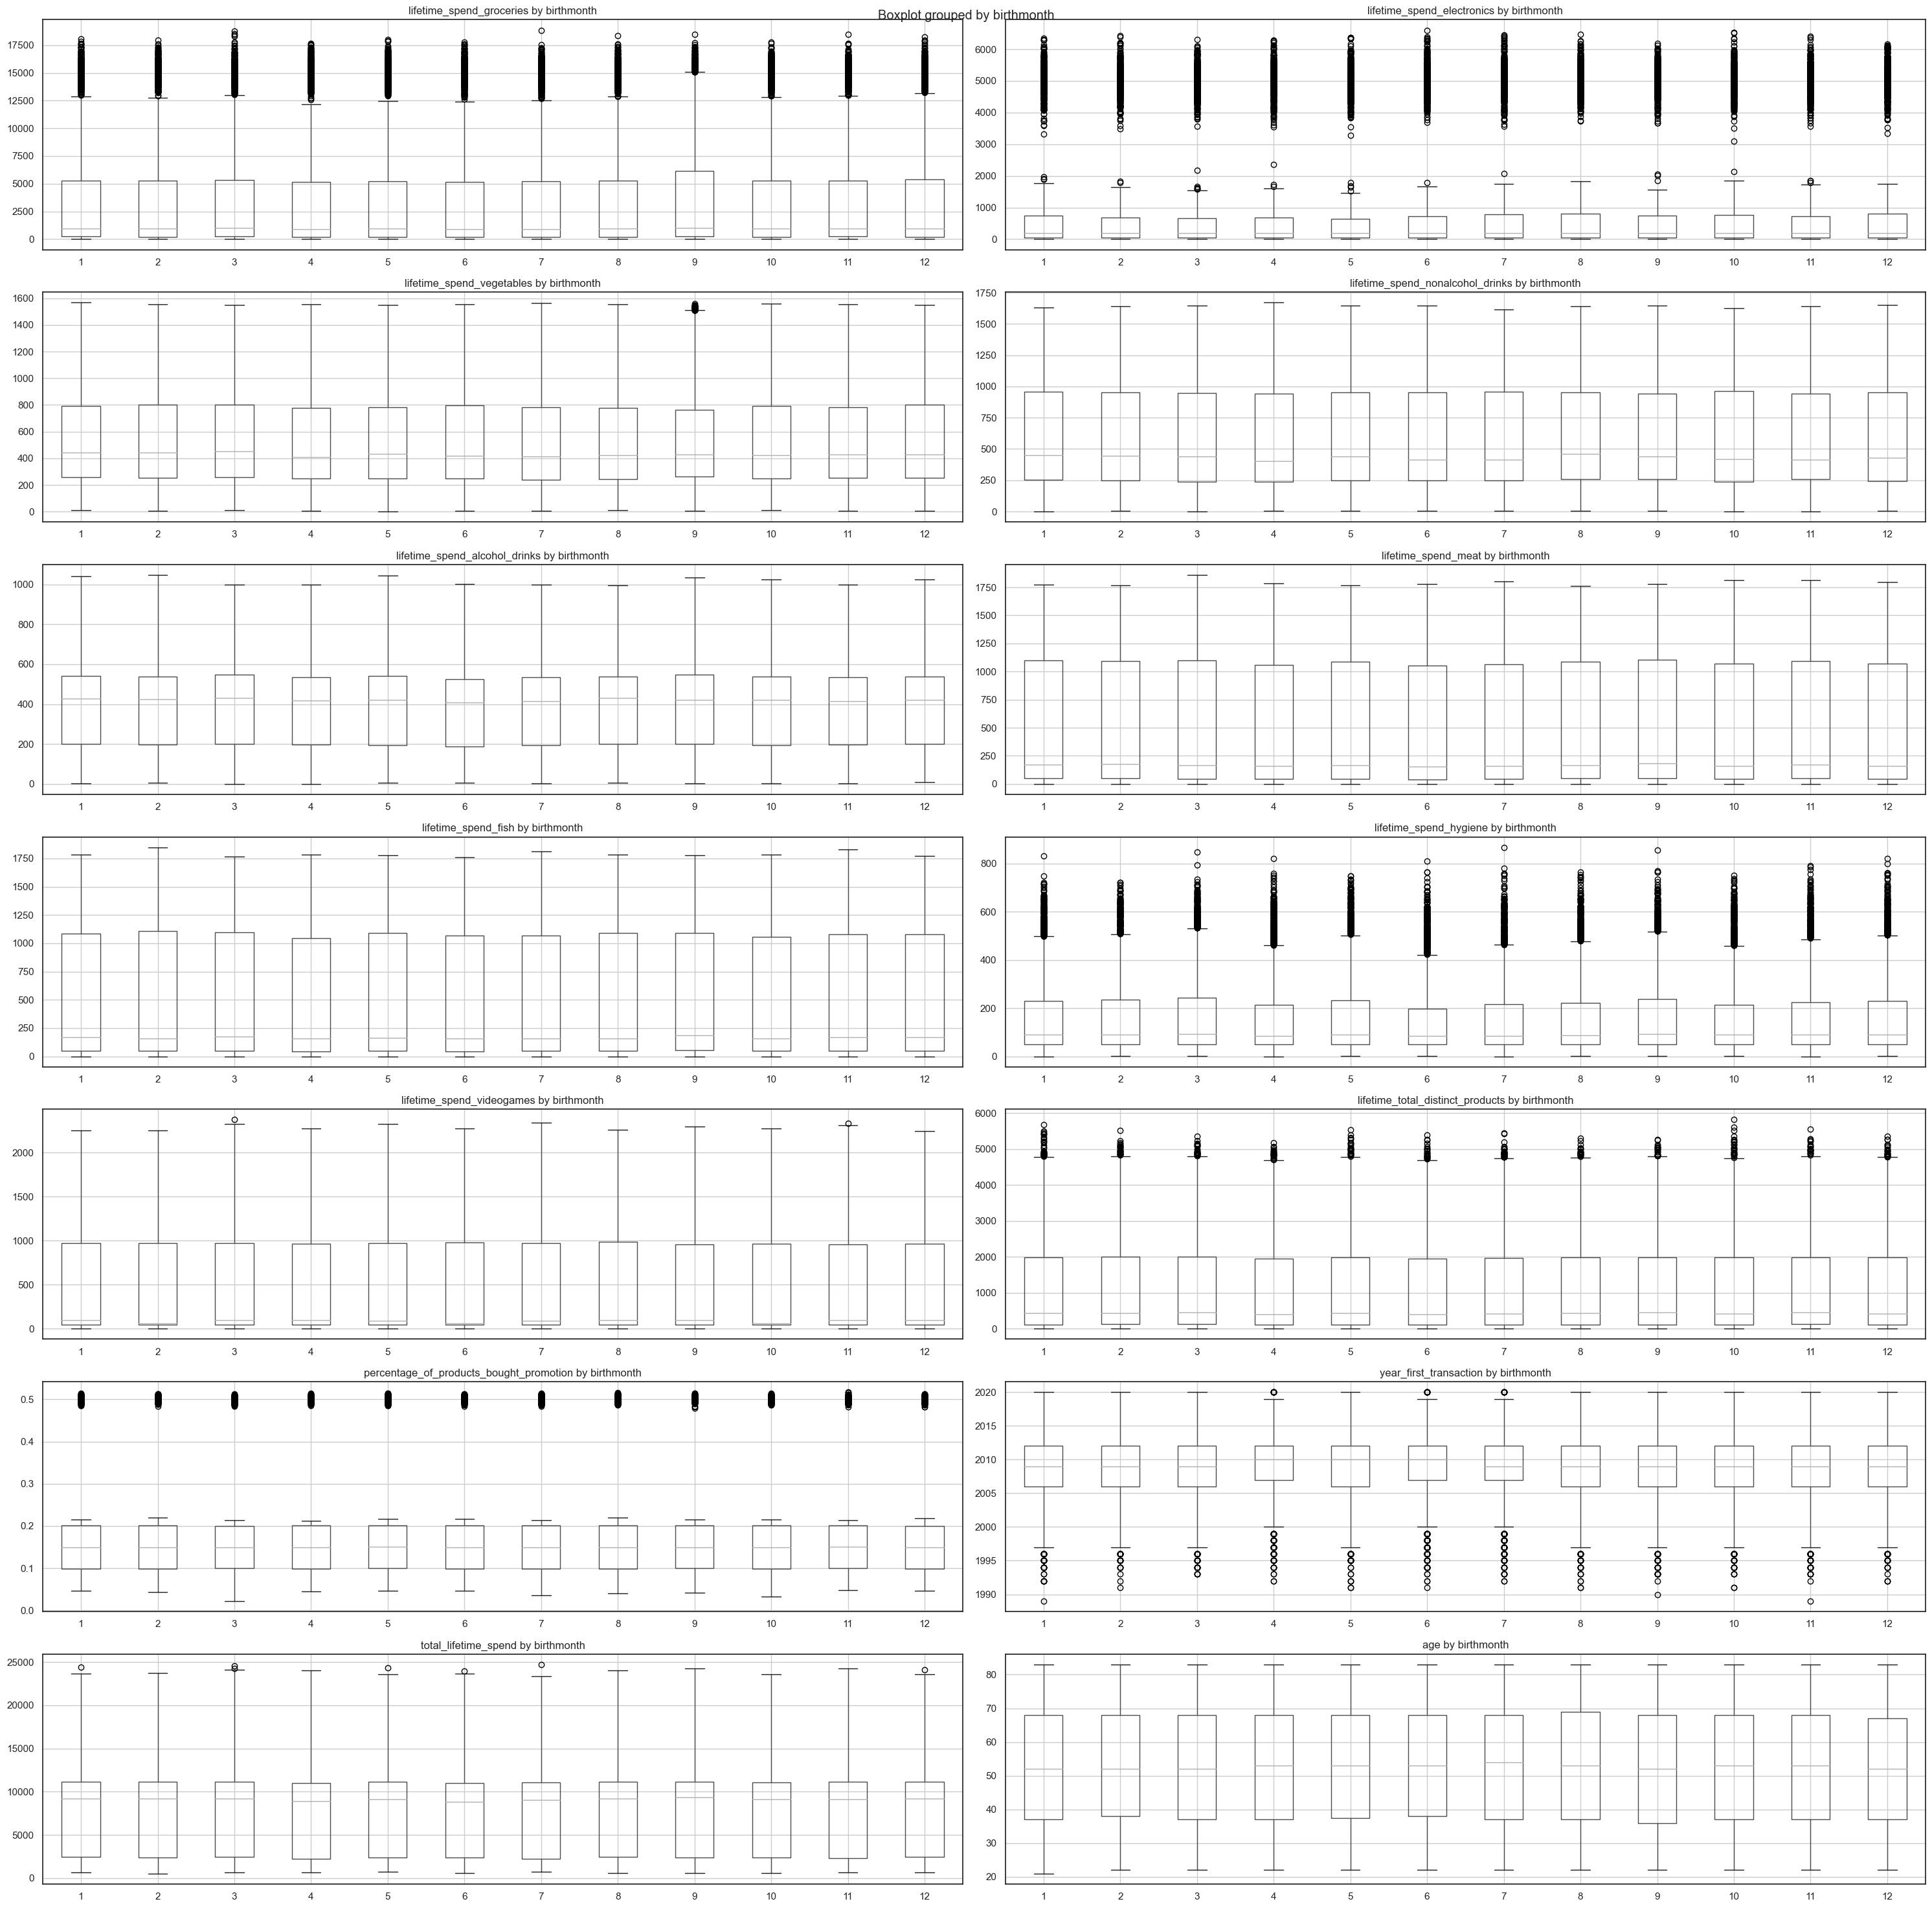

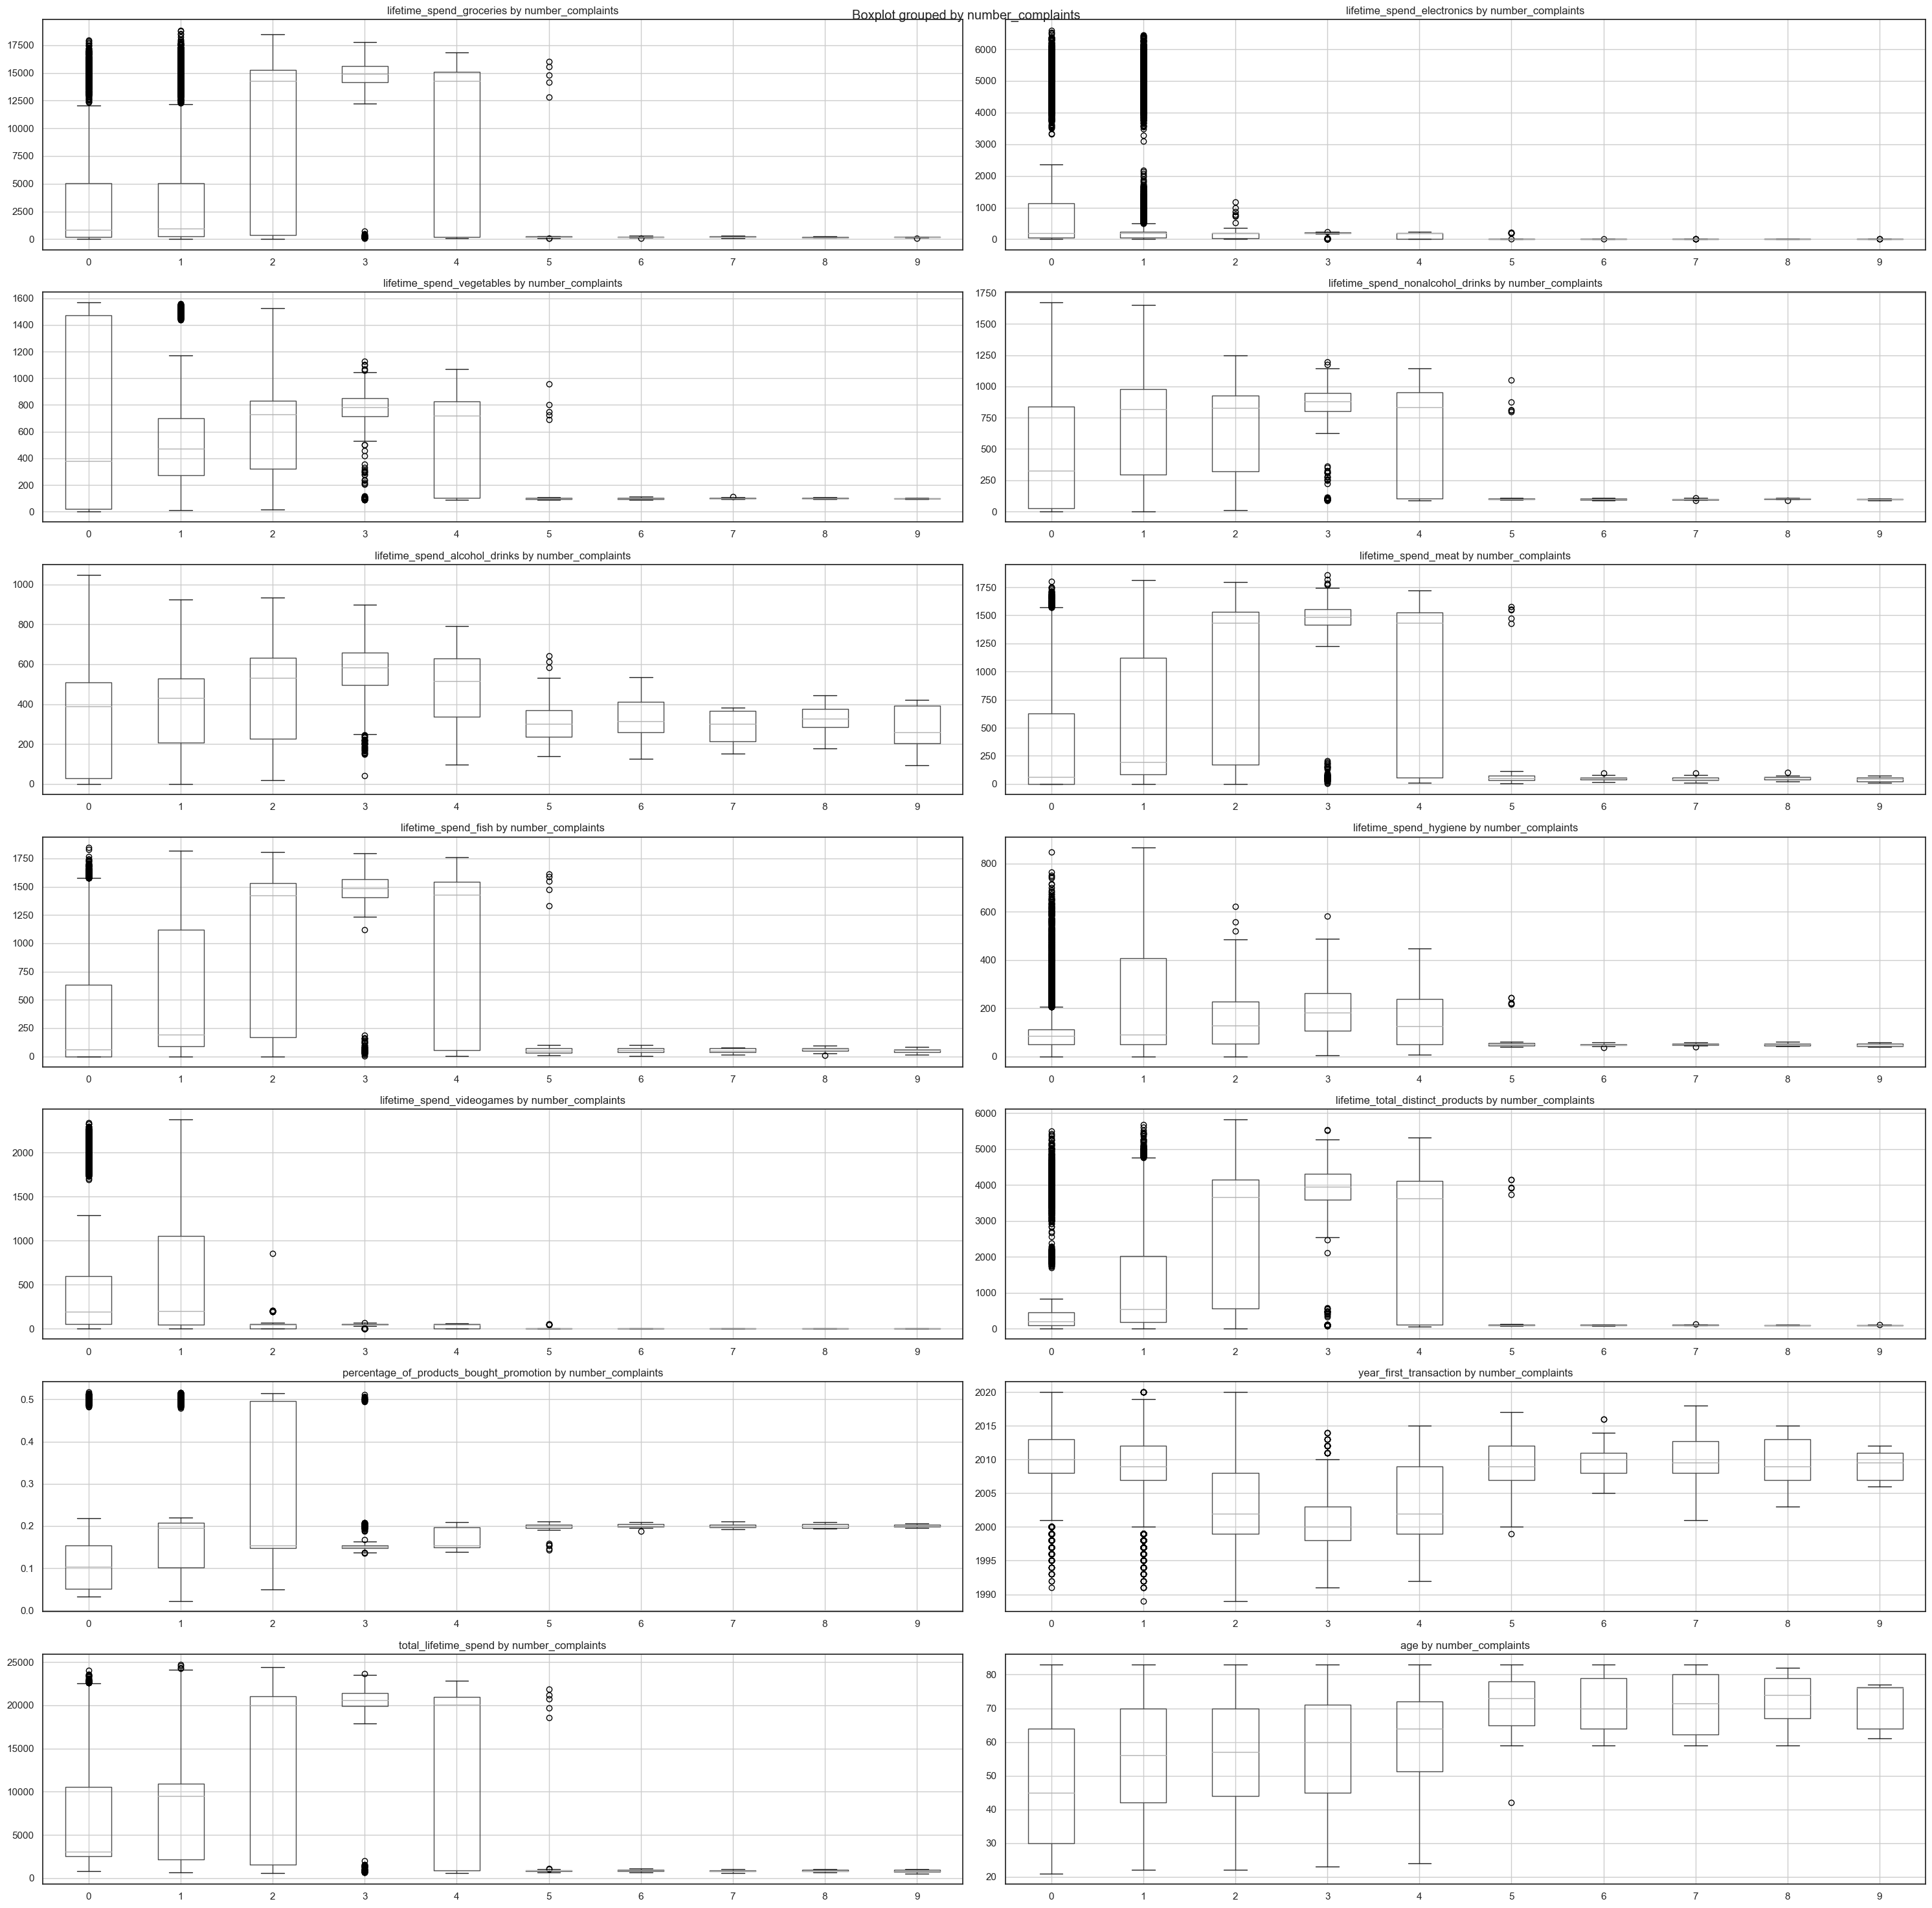

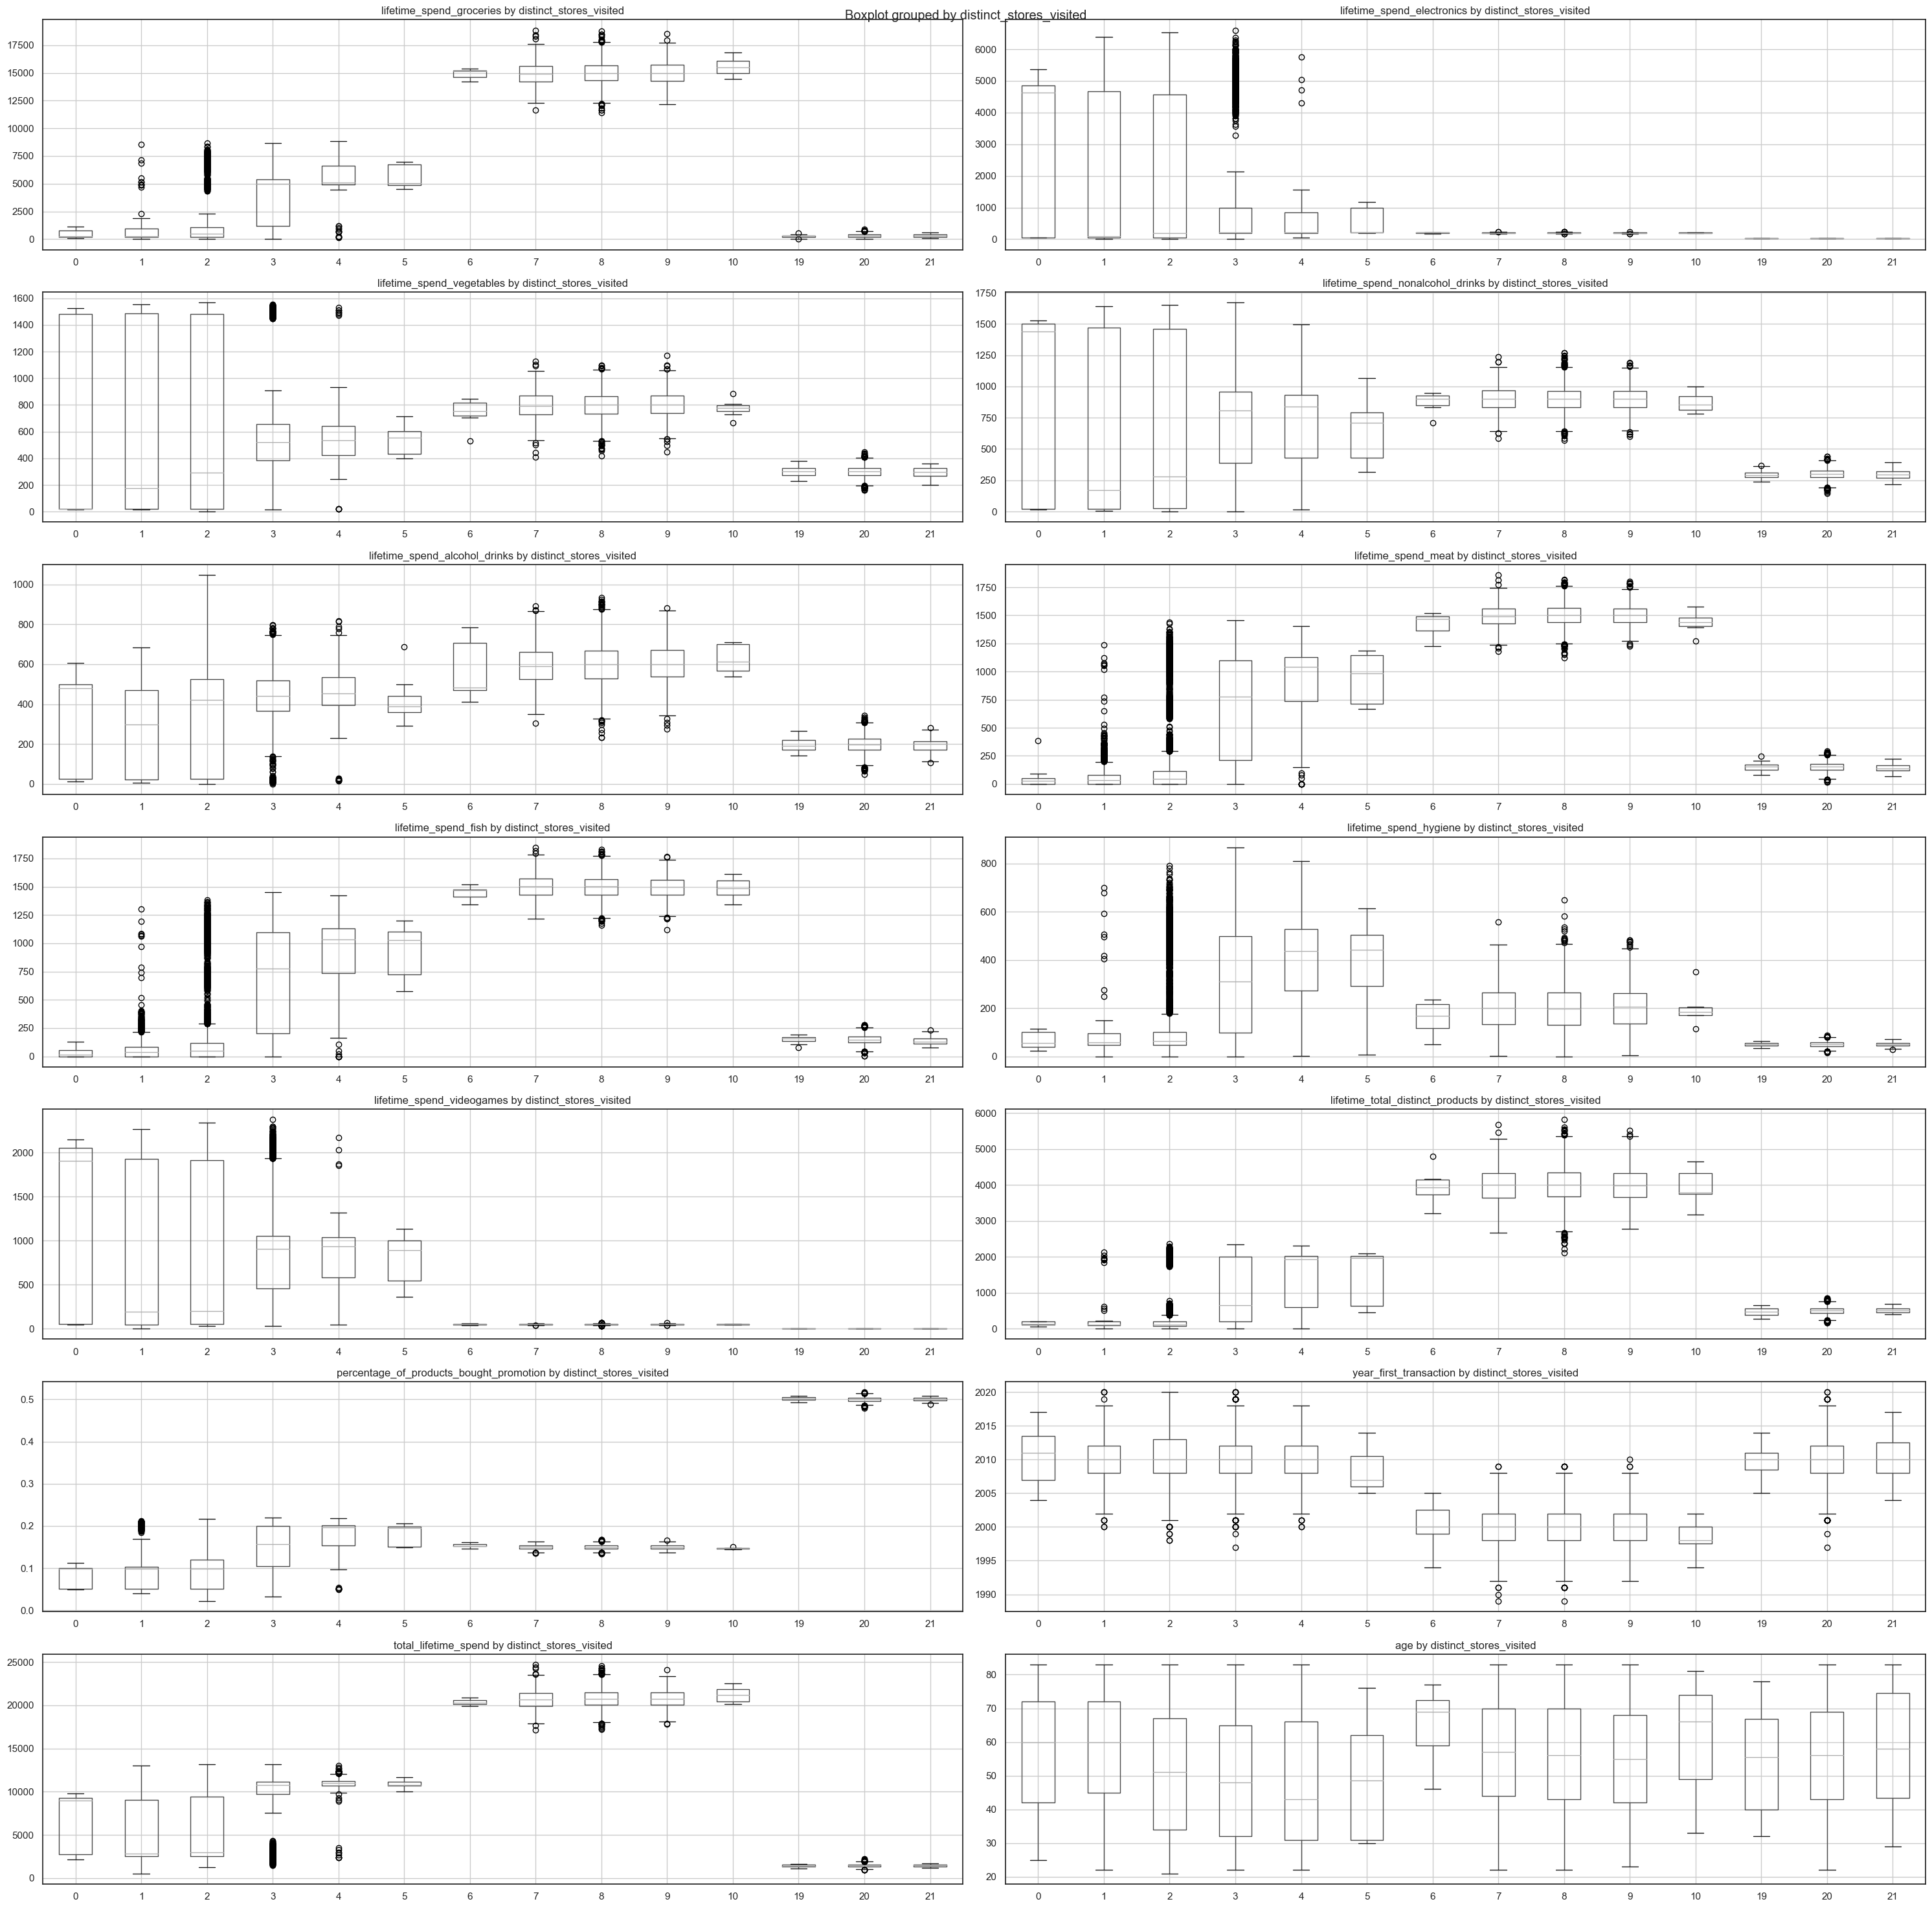

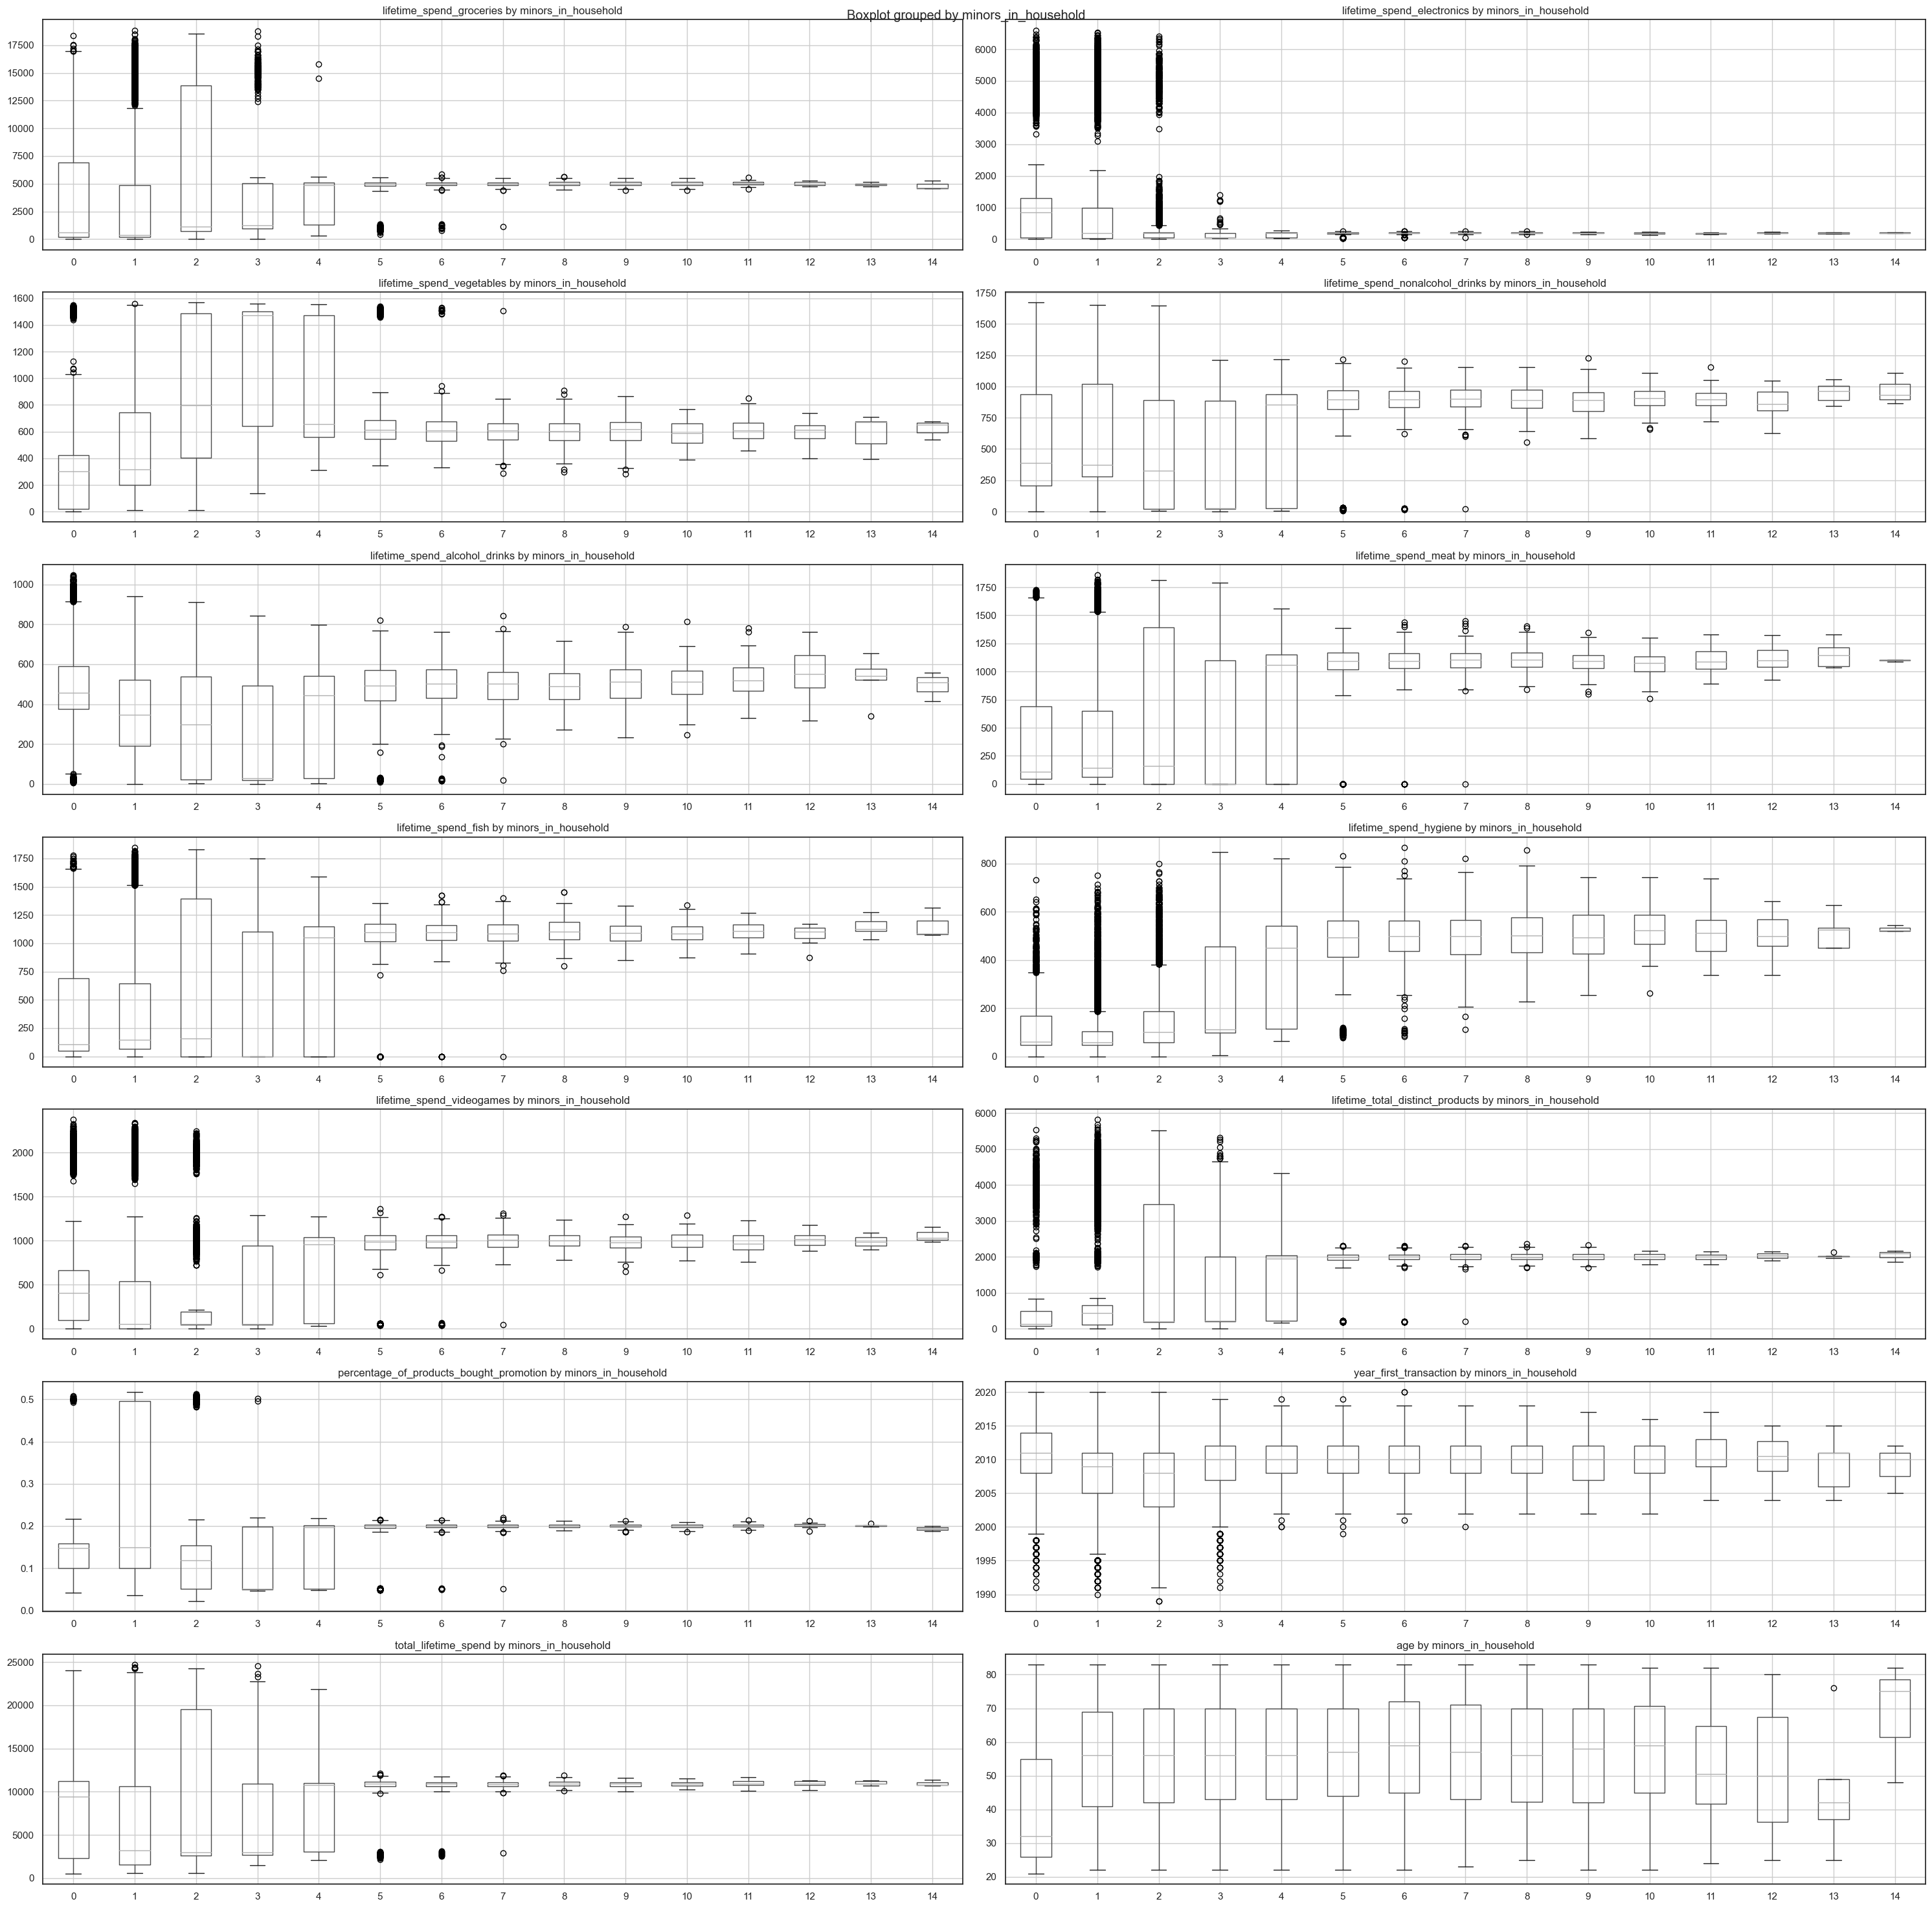

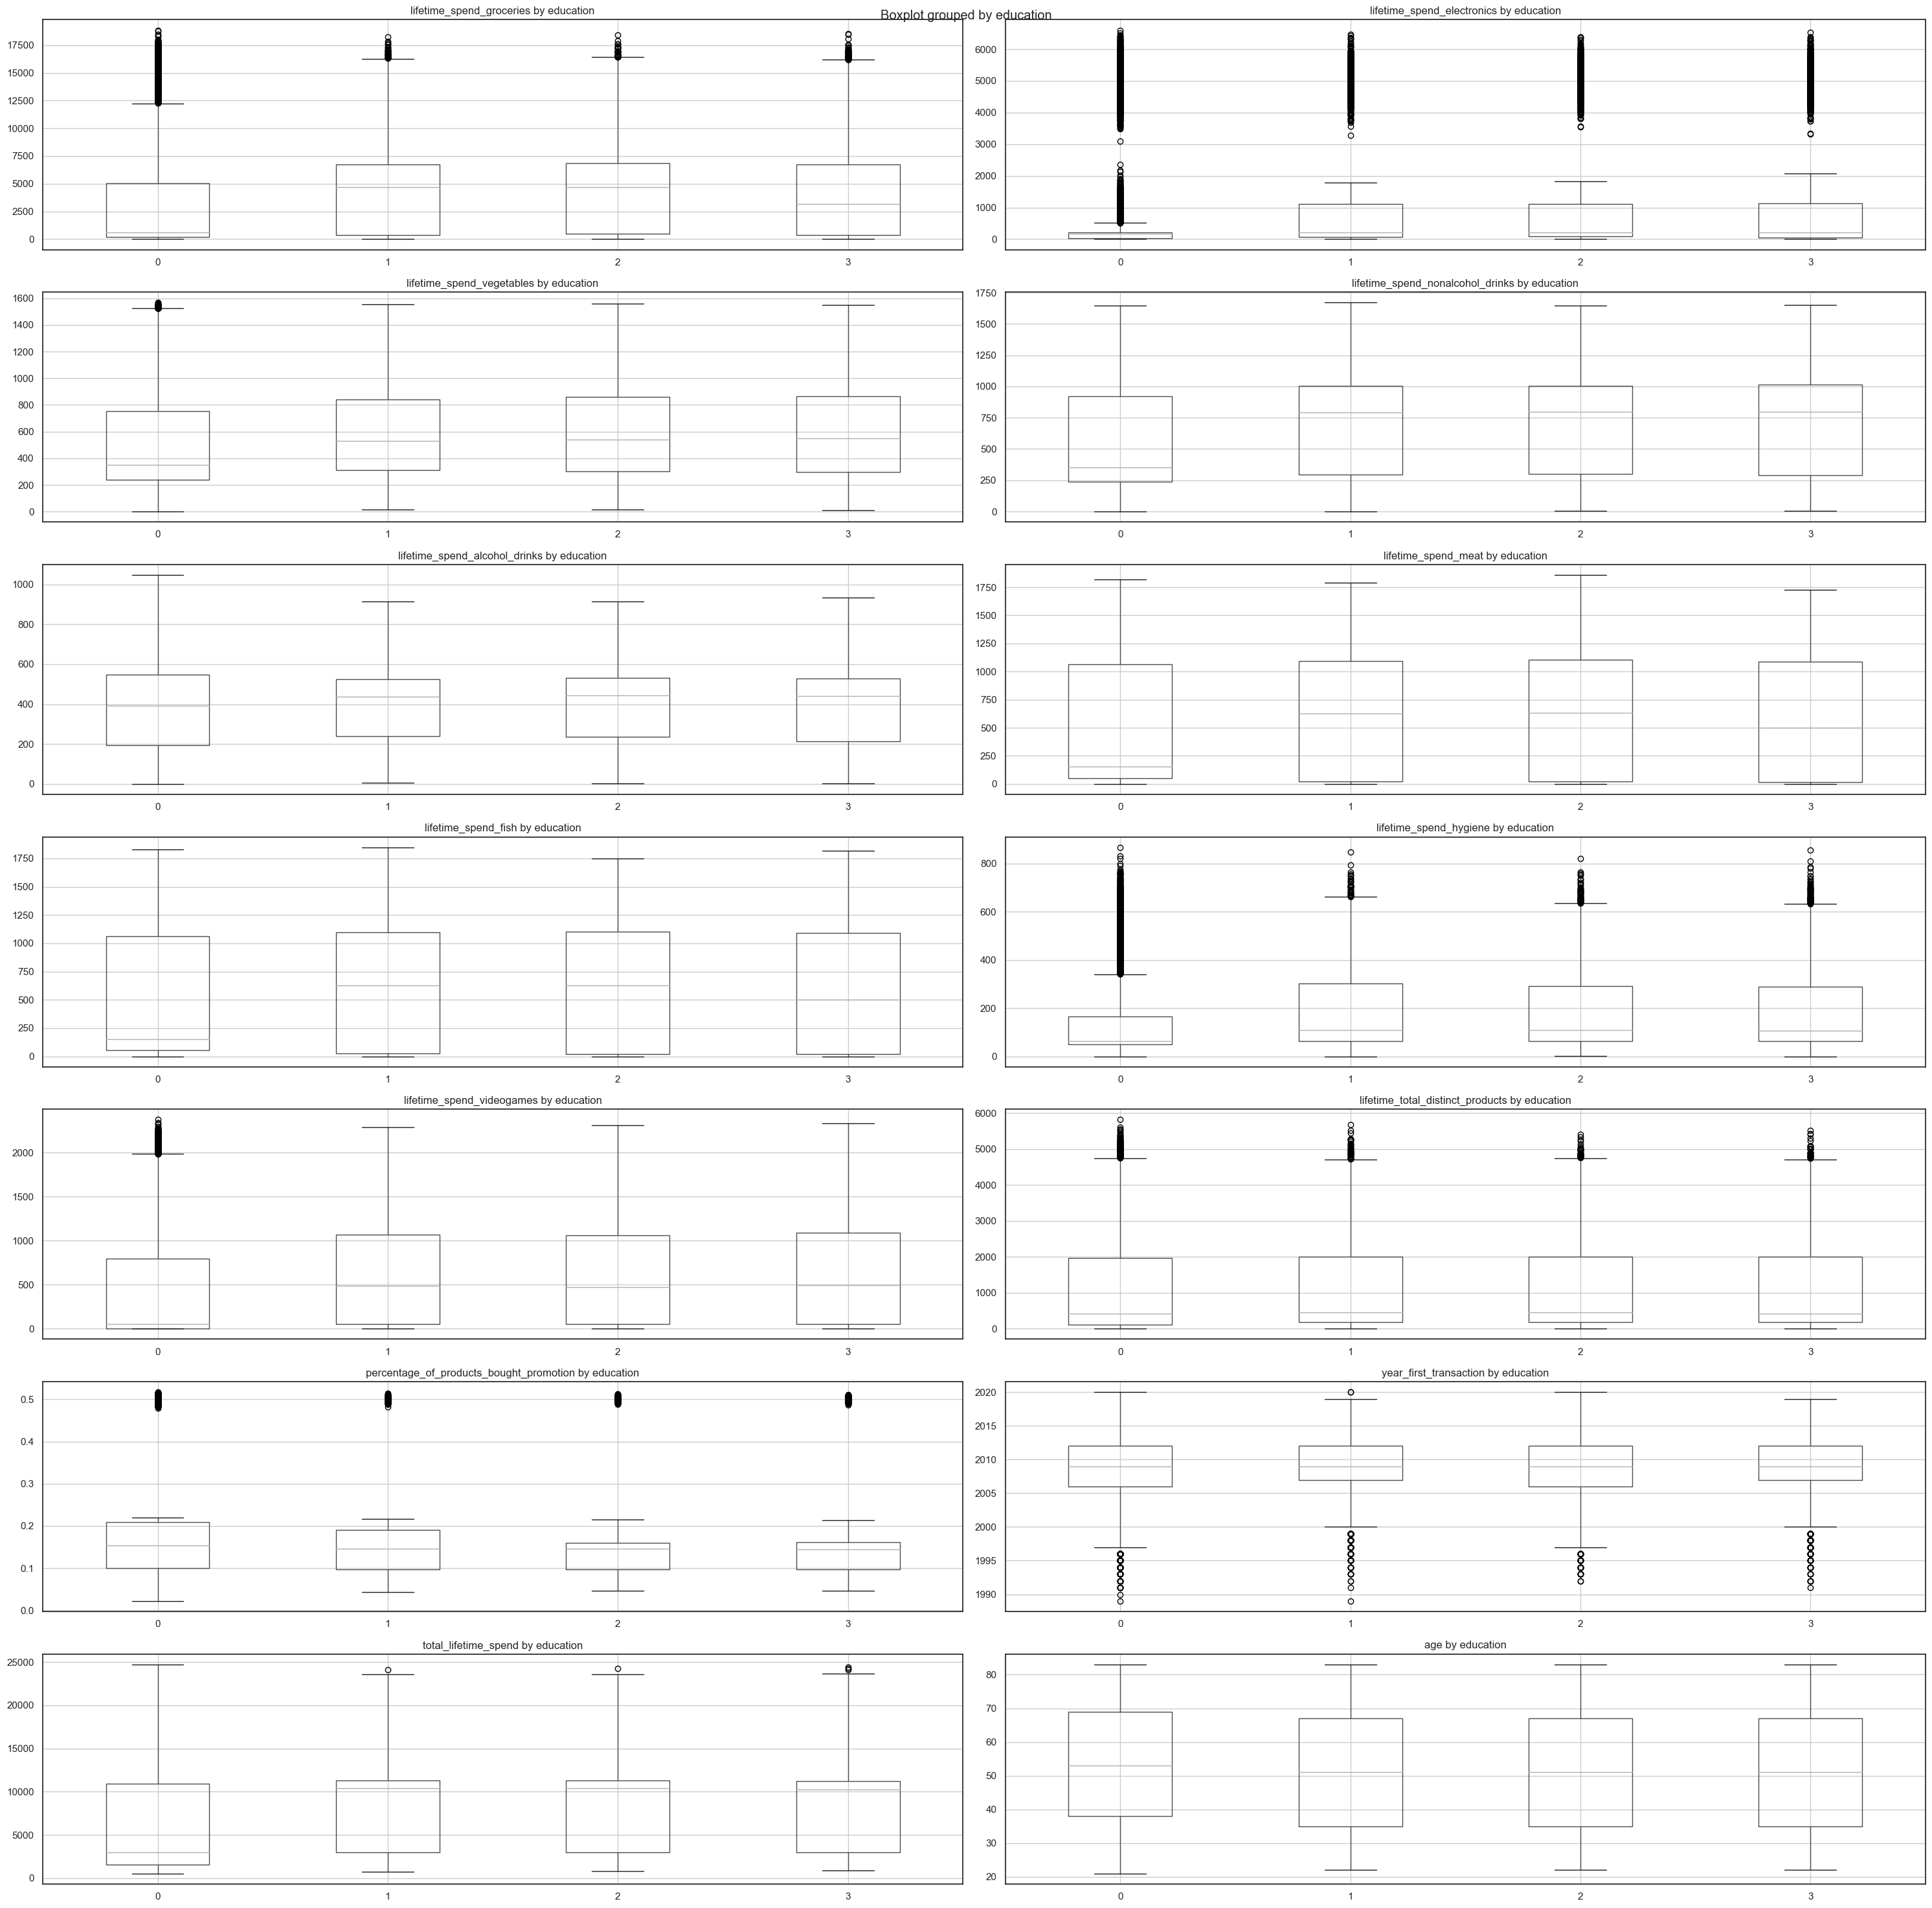

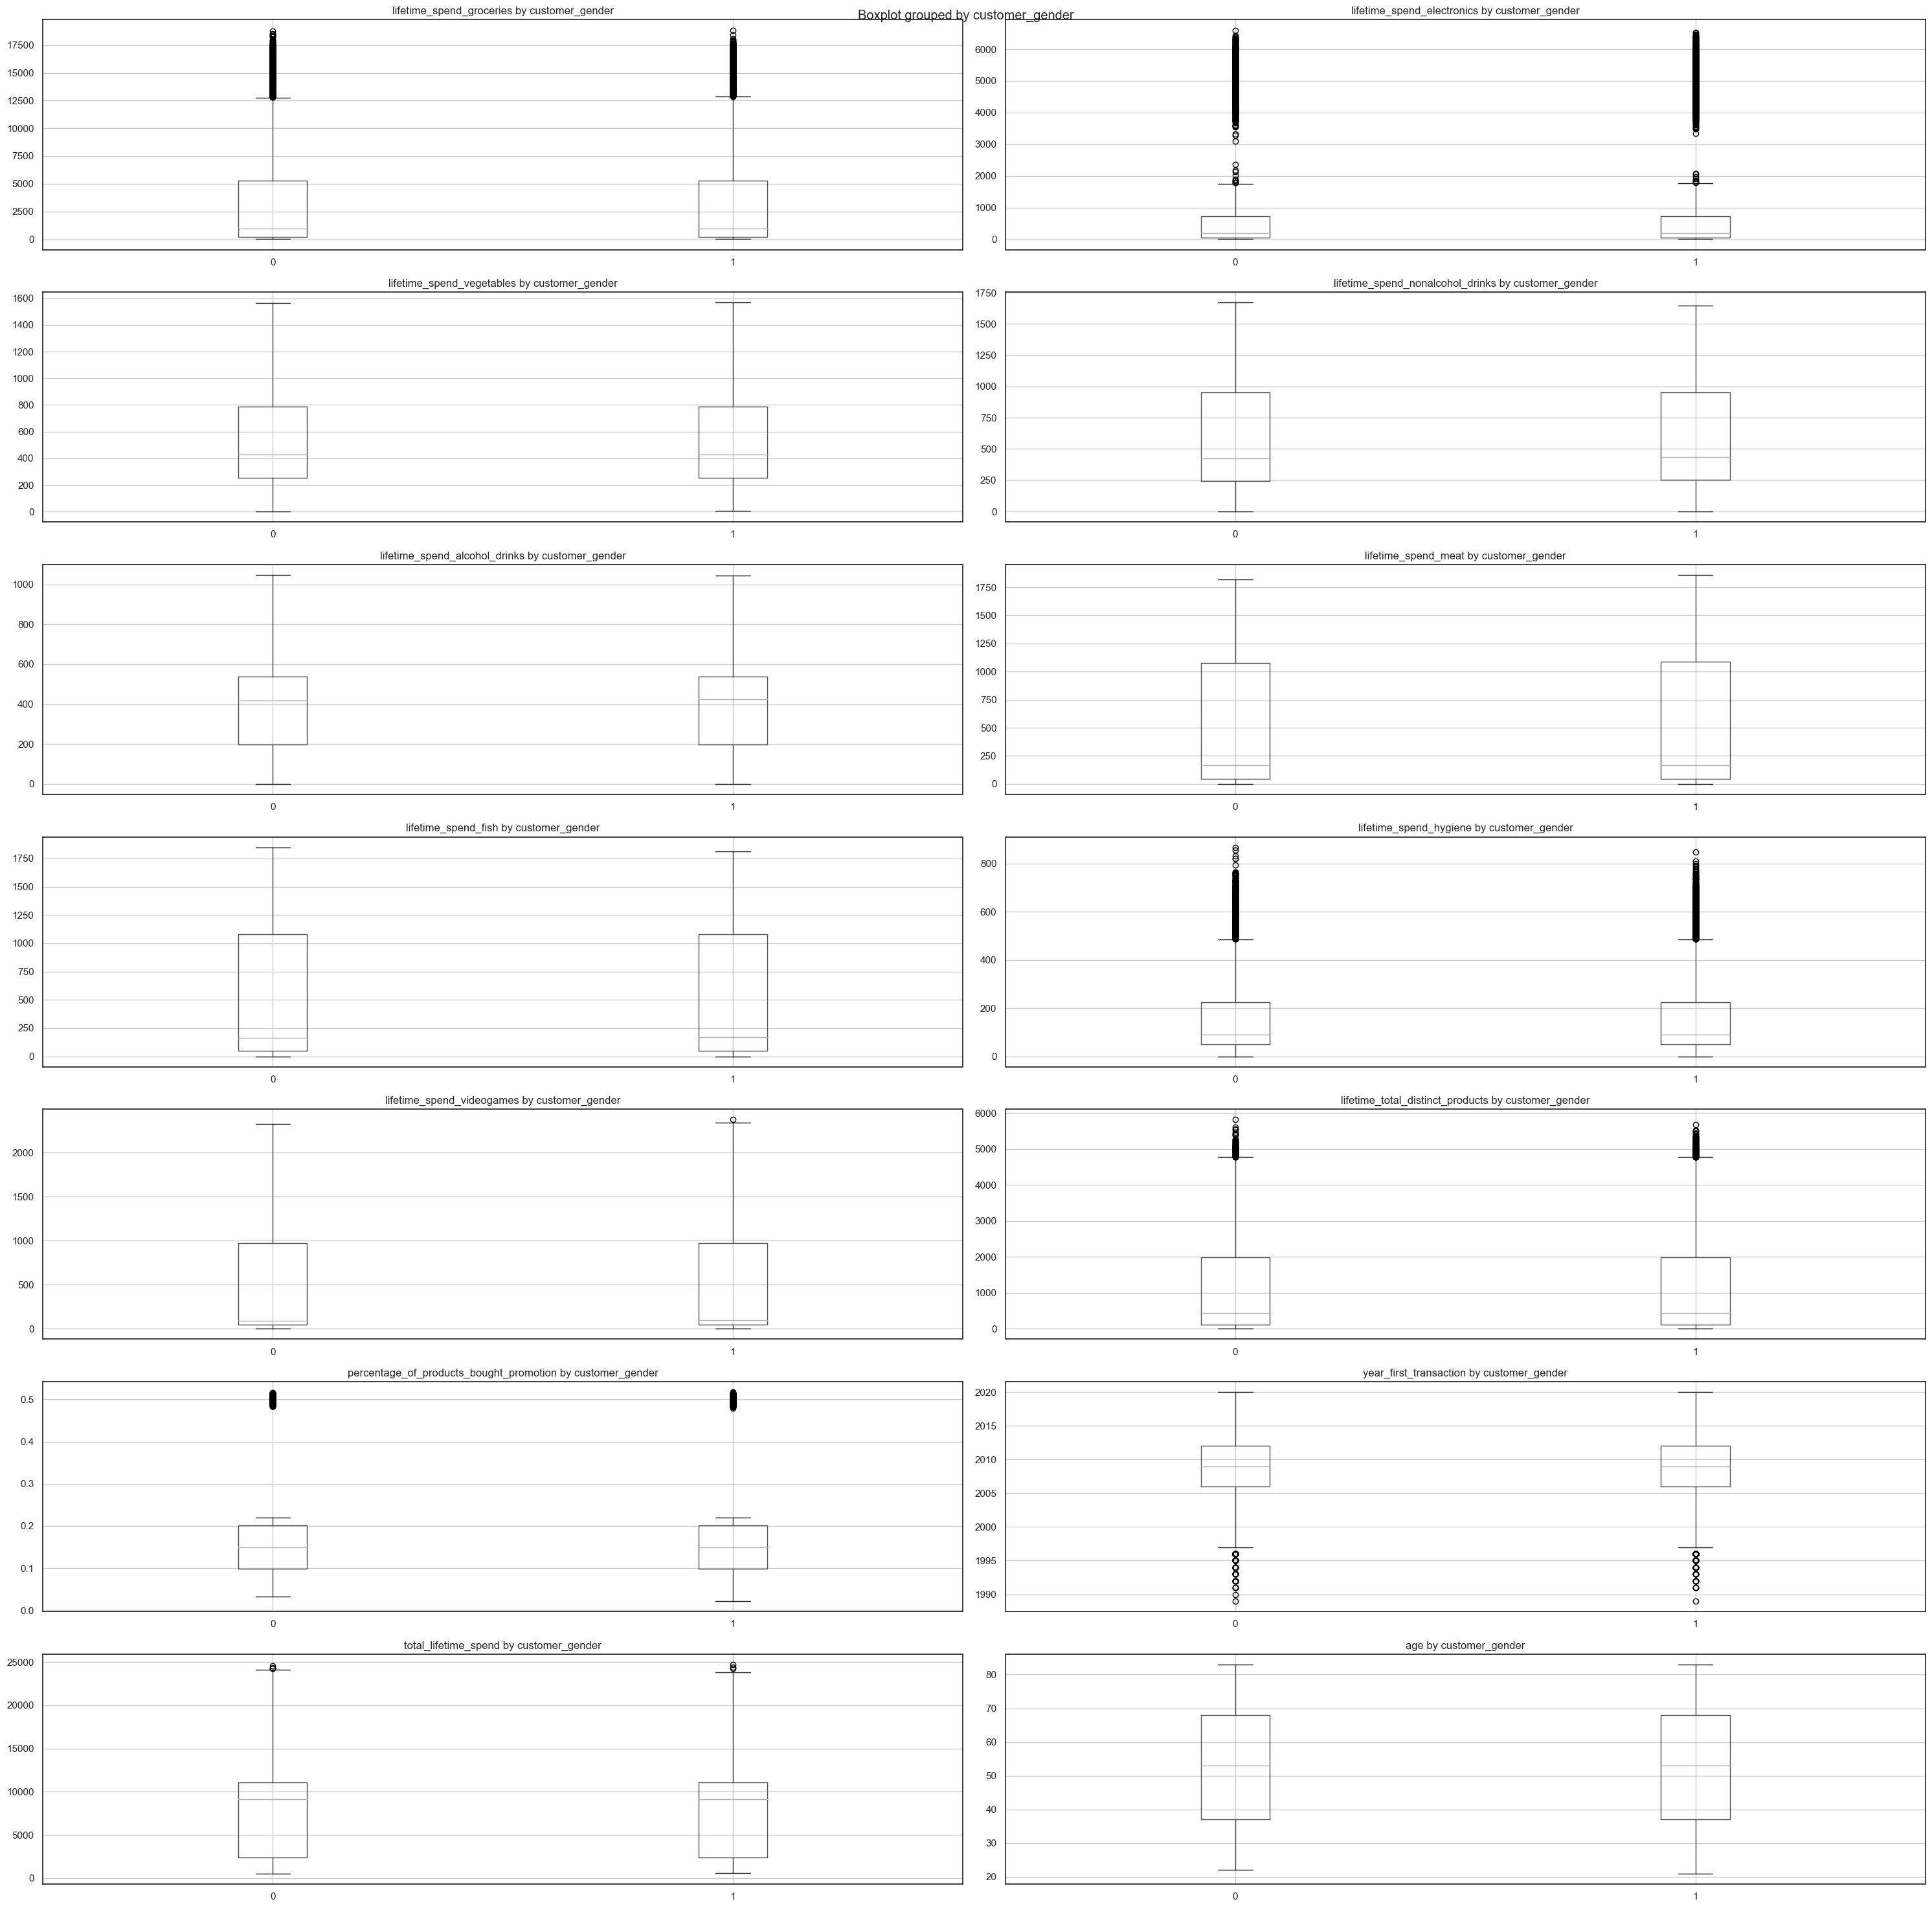

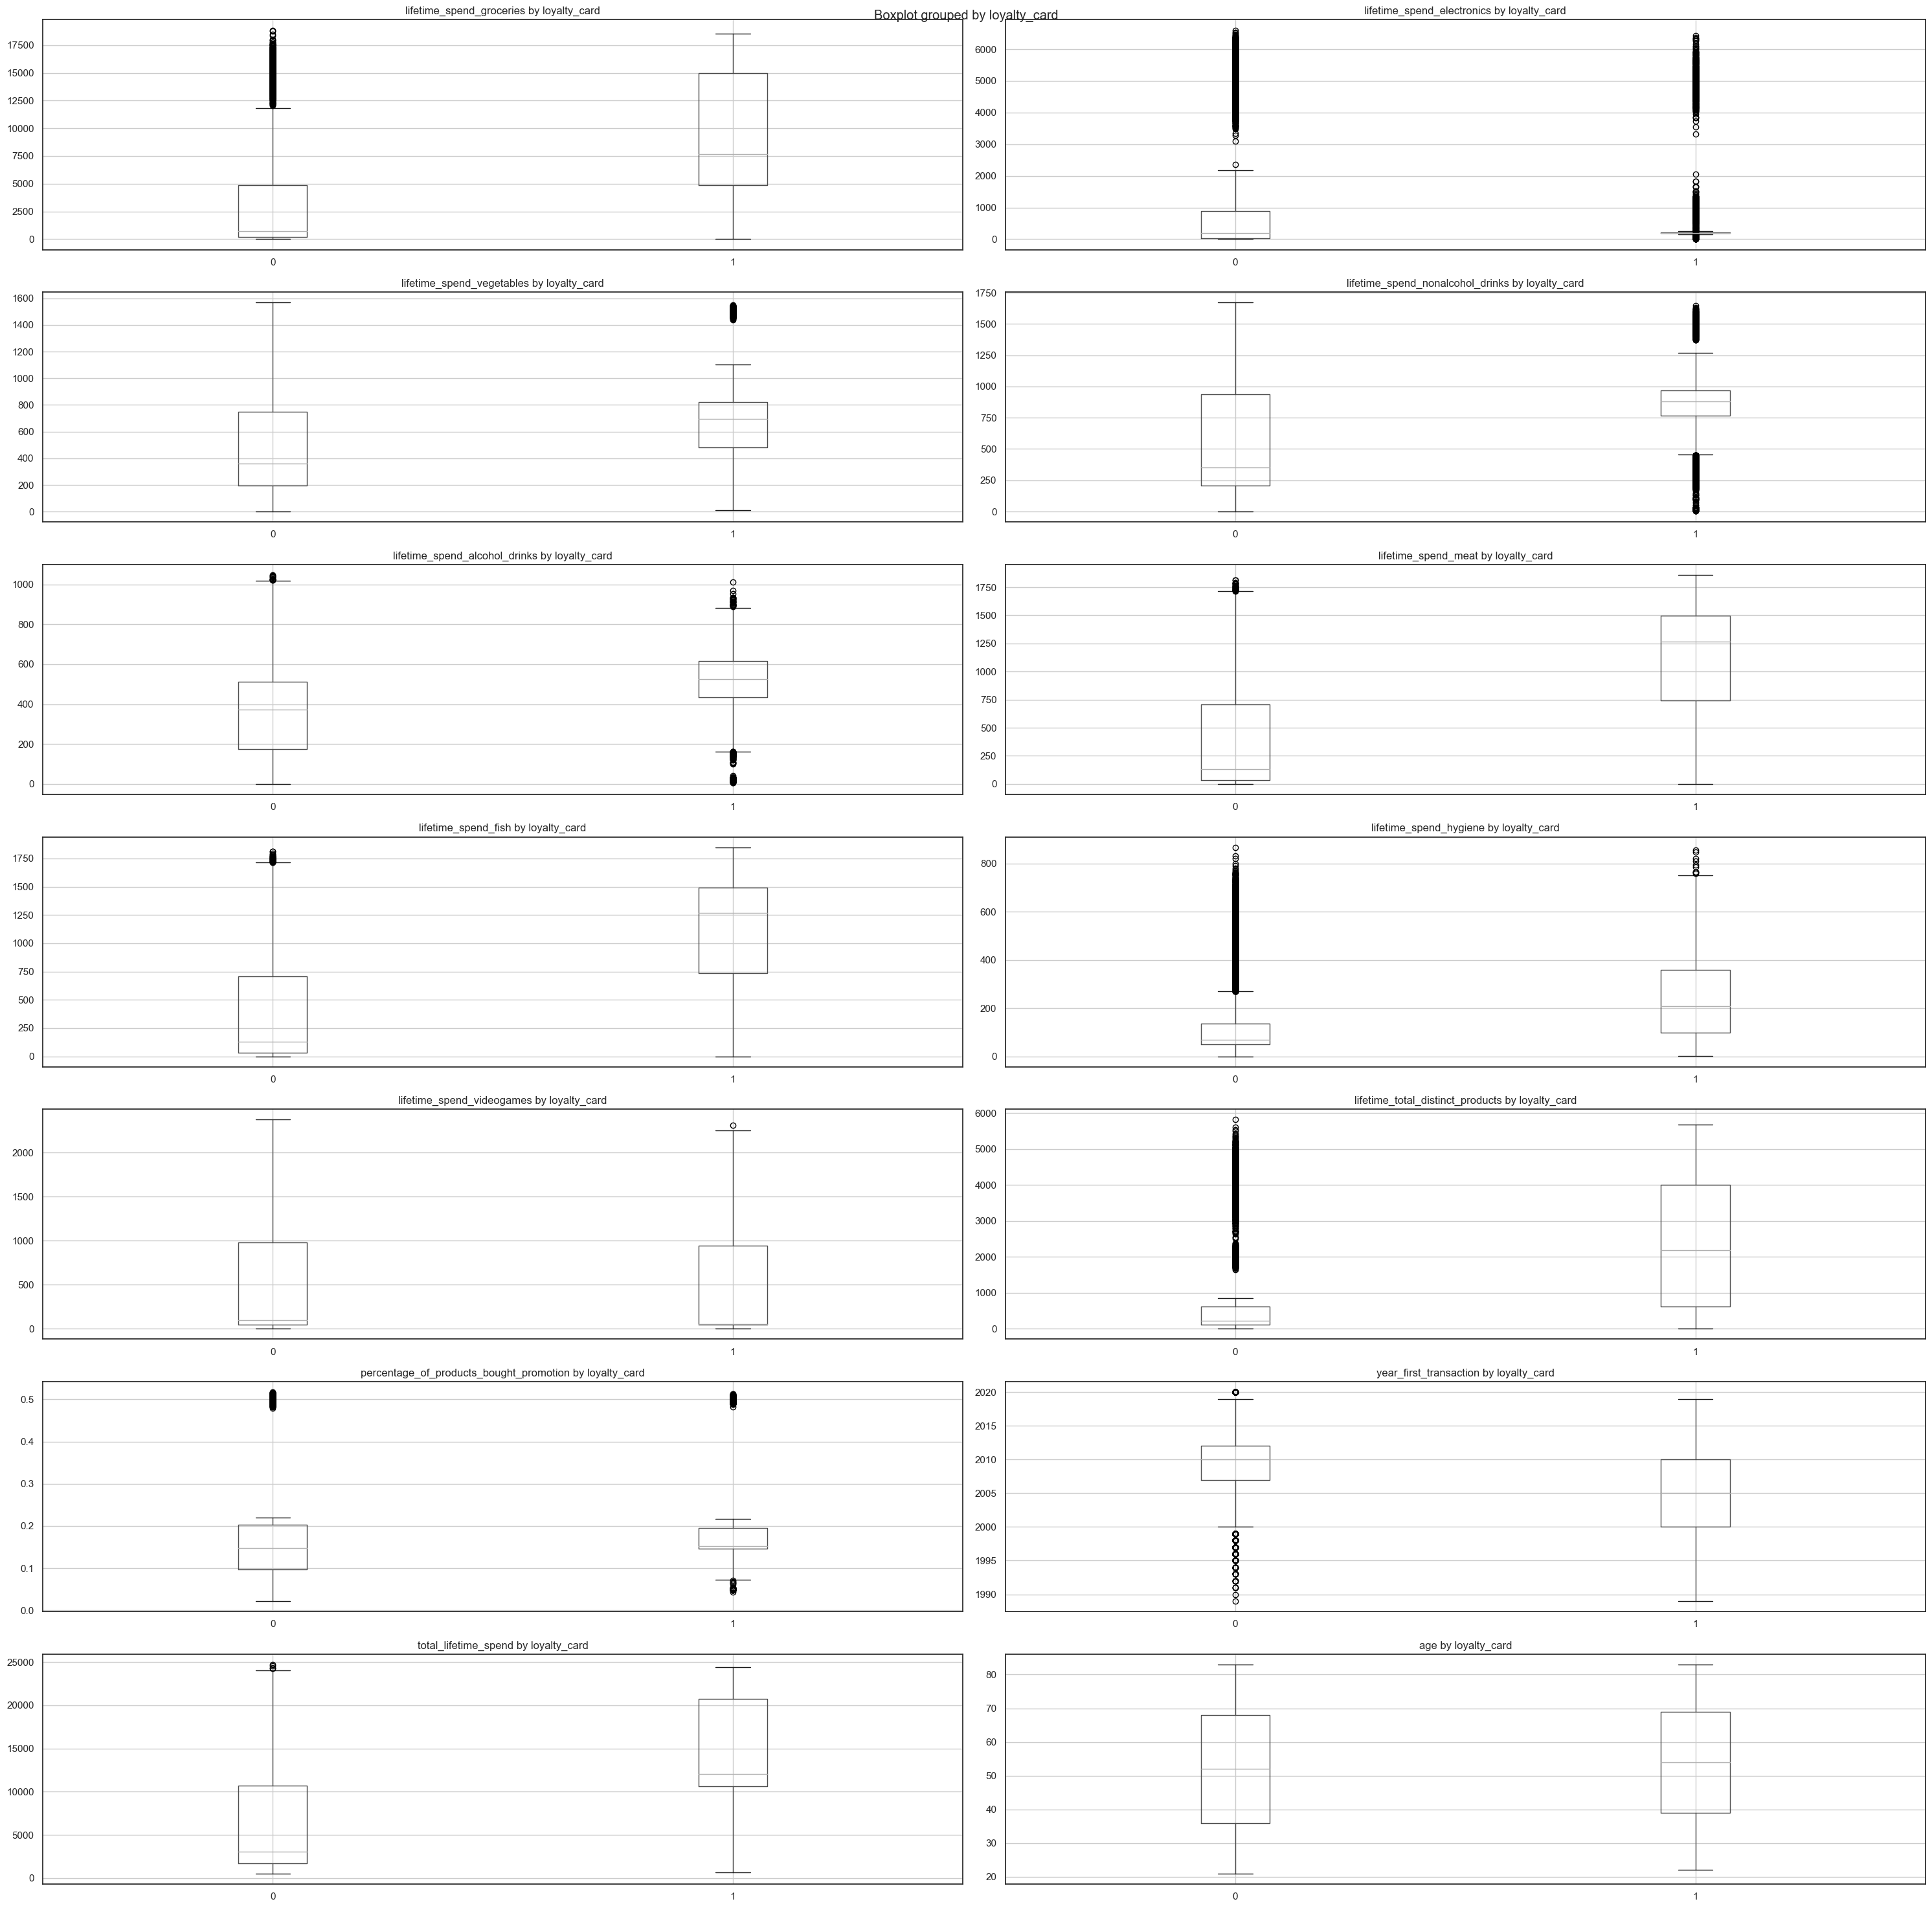

In [210]:
sns.set_style(style='white')
for column2 in discrete+binary:

    fig, axs = plt.subplots(7, 2, figsize=(30, 30))

    # Flatten the axs array for easy indexing
    axs = axs.flatten()

    for i, column in enumerate(continuous[:-1]):
        ax = axs[i]
        individuals.boxplot(column=column, by=column2, ax=ax)
        ax.set_xlabel('')
        ax.set_title(column + ' by ' + column2)

    for i in range(len(axs)):
        if i >= 14:
            axs[i].set_visible(False)

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

##### Average Spend per Typical Hour per Product Category

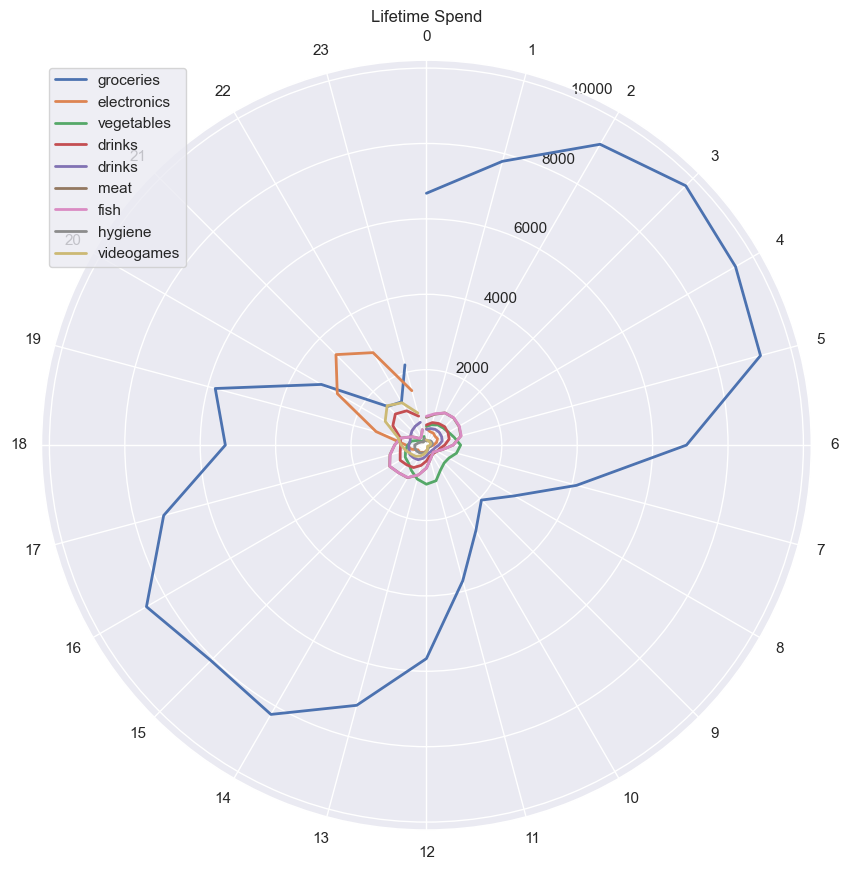

In [49]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
sns.set_style(style='white')
# Define column names
columns = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',       'lifetime_spend_videogames']

for column in columns:
    filter_data = individuals.groupby('typical_hour', as_index=False)[column].mean()
    ax.plot(np.linspace(0, 2*np.pi, len(filter_data['typical_hour']), endpoint=False), 
          filter_data[column], linewidth=2)

# Set Theta to North
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Modify legend labels
legend_labels = [col.split('_')[-1] for col in columns]
plt.legend(legend_labels)

# Set X Ticks and title
ax.set_xticks(np.linspace(0, 2*np.pi, len(filter_data['typical_hour']), endpoint=False))
ax.set_xticklabels(filter_data['typical_hour'])
ax.set_title('Lifetime Spend')

plt.show()


##### Analysis of Features by By Region

**Amount Spent per Region**

In [51]:
Functions.plot_lisbon_heatmap(region_data, 'latitude_encoded', 'longitude_encoded', 'total_lifetime_spend')

**Average Number of Distinct Products Purchased per Region**

In [45]:
Functions.plot_lisbon_heatmap(region_data, 'latitude_encoded', 'longitude_encoded', 'lifetime_total_distinct_products')

**Average Number of Distinct Stores Visited per Region**

In [47]:
Functions.plot_lisbon_heatmap(region_data, 'latitude_encoded', 'longitude_encoded', 'distinct_stores_visited')